In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from TFANN import ANNR
from google.colab import files
import pandas as pd
from datetime import datetime

/Users/Elizabeth.Ke.Zhang/anaconda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [98]:
stock_data = pd.read_csv("/Users/Elizabeth.Ke.Zhang/Desktop/stock_analysis/StockDir/凤凰股份600716.ss.csv")
print(stock_data.shape)
print(stock_data.head(5))
dates = pd.to_datetime(stock_data['Date']).values.reshape(-1,1)
days = dates - dates[0]
days = days.astype('timedelta64[D]').astype(int)
stock_data['Date'] = days
stock_data.head(5)

(2401, 7)
         Date  High   Low  Open  Close     Volume  Adj Close
0  2010-01-04  9.68  9.51  9.59   9.58  3933500.0   8.945965
1  2010-01-05  9.99  9.56  9.73   9.66  6134797.0   9.020670
2  2010-01-06  9.69  9.44  9.57   9.45  6401929.0   8.824568
3  2010-01-07  9.58  9.31  9.50   9.38  4601650.0   8.759202
4  2010-01-08  9.54  9.29  9.41   9.54  4047412.0   8.908611


,Date,High,Low,Open,Close,Volume,Adj Close
0,0,9.68,9.51,9.59,9.58,3933500.0,8.945965
1,1,9.99,9.56,9.73,9.66,6134797.0,9.020670
2,2,9.69,9.44,9.57,9.45,6401929.0,8.824568
3,3,9.58,9.31,9.50,9.38,4601650.0,8.759202
4,4,9.54,9.29,9.41,9.54,4047412.0,8.908611


In [99]:
stock_data.loc[:,['Date','High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']] = scale(stock_data.loc[:,['Date','High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']])
stock_data.head(10)

/Users/Elizabeth.Ke.Zhang/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,Date,High,Low,Open,Close,Volume,Adj Close
0,-1.734619,1.238190,1.361541,1.297290,1.288428,-0.602351,1.243518
1,-1.733659,1.368493,1.383962,1.358045,1.323097,-0.393030,1.278166
2,-1.732699,1.242393,1.330152,1.288611,1.232092,-0.367628,1.187215
3,-1.731739,1.196157,1.271858,1.258234,1.201758,-0.538817,1.156899
4,-1.730779,1.179344,1.262889,1.219177,1.271094,-0.591519,1.226194
5,-1.727899,1.238190,1.235984,1.332007,1.149755,-0.344845,1.104928
6,-1.726939,1.112091,1.173205,1.158423,1.193090,-0.516474,1.148237
7,-1.725979,1.053245,1.155269,1.106347,1.076085,-0.393446,1.031301
8,-1.725019,1.065855,1.168721,1.088989,1.149755,-0.542558,1.104928
9,-1.724059,1.204564,1.213563,1.149743,1.292762,-0.140749,1.247849


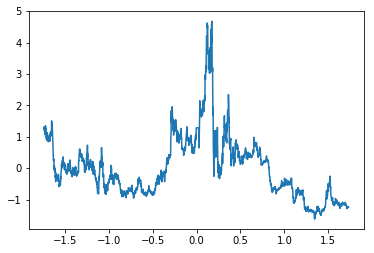

In [67]:
#gets the price and dates from the matrix
prices = stock_data['Close'].values.reshape(-1,1)
dates = stock_data['Date'].values.reshape(-1,1)
#creates a plot of the data and then displays it
plt.plot(dates[:,0],prices[:, 0])
plt.show()

## maxIterator = 20000, tolerance = 0.2

In [30]:
#Number of neurons in the input, output, and hidden layers
input = 1
output = 1
hidden = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]
#construct the model and dictate params
mlpr = ANNR([input], layers, batchSize = 256, maxIter = 20000, tol = 0.2, reg = 1e-4, verbose = True)




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.










In [31]:
#number of days for the hold-out period used to access progress
holdDays = 5
totalDays = len(dates)
#fit the model to the data "Learning"
mlpr.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      3.07375877 (Batch Size:   256)
Iter     2	      2.83827484 (Batch Size:   256)
Iter     3	      2.38451171 (Batch Size:   256)
Iter     4	      2.29854816 (Batch Size:   256)
Iter     5	      1.92896127 (Batch Size:   256)
Iter     6	      1.75116078 (Batch Size:   256)
Iter     7	      1.44099532 (Batch Size:   256)
Iter     8	      1.42351580 (Batch Size:   256)
Iter     9	      1.32094520 (Batch Size:   256)
Iter    10	      1.09721815 (Batch Size:   256)
Iter    11	      1.11975161 (Batch Size:   256)
Iter    12	      0.94060310 (Batch Size:   256)
Iter    13	      0.93191115 (Batch Size:   256)
Iter    14	      0.91547148 (Batch Size:   256)
Iter    15	      0.84796256 (Batch Size:   256)
Iter    16	      0.83868176 (Batch Size:   256)
Iter    17	      0.86417150 (Batch Size:   256)
Iter    18	      0.90546418 (Batch Size:   256)
Iter    19	      0.93801718 (Batch Size:   256)
Iter    20	      0.89199408 (Batch Size:   256)
Iter    21	      0.89502129 (Batch Size:

Iter   178	      0.32650010 (Batch Size:   256)
Iter   179	      0.32292940 (Batch Size:   256)
Iter   180	      0.33641951 (Batch Size:   256)
Iter   181	      0.32847268 (Batch Size:   256)
Iter   182	      0.29581754 (Batch Size:   256)
Iter   183	      0.33943273 (Batch Size:   256)
Iter   184	      0.28889717 (Batch Size:   256)
Iter   185	      0.30367790 (Batch Size:   256)
Iter   186	      0.29194865 (Batch Size:   256)
Iter   187	      0.33255598 (Batch Size:   256)
Iter   188	      0.31741361 (Batch Size:   256)
Iter   189	      0.30371541 (Batch Size:   256)
Iter   190	      0.31614206 (Batch Size:   256)
Iter   191	      0.32069798 (Batch Size:   256)
Iter   192	      0.30413737 (Batch Size:   256)
Iter   193	      0.30008414 (Batch Size:   256)
Iter   194	      0.31506087 (Batch Size:   256)
Iter   195	      0.31735398 (Batch Size:   256)
Iter   196	      0.30618115 (Batch Size:   256)
Iter   197	      0.28783718 (Batch Size:   256)
Iter   198	      0.32042293 (Batch Size:

Iter   358	      0.27701721 (Batch Size:   256)
Iter   359	      0.31134526 (Batch Size:   256)
Iter   360	      0.27709570 (Batch Size:   256)
Iter   361	      0.27241723 (Batch Size:   256)
Iter   362	      0.28656859 (Batch Size:   256)
Iter   363	      0.27257646 (Batch Size:   256)
Iter   364	      0.26946619 (Batch Size:   256)
Iter   365	      0.28802003 (Batch Size:   256)
Iter   366	      0.27564760 (Batch Size:   256)
Iter   367	      0.28827802 (Batch Size:   256)
Iter   368	      0.28049995 (Batch Size:   256)
Iter   369	      0.29264158 (Batch Size:   256)
Iter   370	      0.28022051 (Batch Size:   256)
Iter   371	      0.29810406 (Batch Size:   256)
Iter   372	      0.31752553 (Batch Size:   256)
Iter   373	      0.29024030 (Batch Size:   256)
Iter   374	      0.30106617 (Batch Size:   256)
Iter   375	      0.28407166 (Batch Size:   256)
Iter   376	      0.27247628 (Batch Size:   256)
Iter   377	      0.29663899 (Batch Size:   256)
Iter   378	      0.29277152 (Batch Size:

Iter   537	      0.29078684 (Batch Size:   256)
Iter   538	      0.28180826 (Batch Size:   256)
Iter   539	      0.27542834 (Batch Size:   256)
Iter   540	      0.30647572 (Batch Size:   256)
Iter   541	      0.29822487 (Batch Size:   256)
Iter   542	      0.29060623 (Batch Size:   256)
Iter   543	      0.28587870 (Batch Size:   256)
Iter   544	      0.27406740 (Batch Size:   256)
Iter   545	      0.29781112 (Batch Size:   256)
Iter   546	      0.28656978 (Batch Size:   256)
Iter   547	      0.28972726 (Batch Size:   256)
Iter   548	      0.28416964 (Batch Size:   256)
Iter   549	      0.29575796 (Batch Size:   256)
Iter   550	      0.29428383 (Batch Size:   256)
Iter   551	      0.28594532 (Batch Size:   256)
Iter   552	      0.29878407 (Batch Size:   256)
Iter   553	      0.29436715 (Batch Size:   256)
Iter   554	      0.26055056 (Batch Size:   256)
Iter   555	      0.26886839 (Batch Size:   256)
Iter   556	      0.29759036 (Batch Size:   256)
Iter   557	      0.27995333 (Batch Size:

Iter   718	      0.25078297 (Batch Size:   256)
Iter   719	      0.25909203 (Batch Size:   256)
Iter   720	      0.24791950 (Batch Size:   256)
Iter   721	      0.24383151 (Batch Size:   256)
Iter   722	      0.25438144 (Batch Size:   256)
Iter   723	      0.26062639 (Batch Size:   256)
Iter   724	      0.24289403 (Batch Size:   256)
Iter   725	      0.24456070 (Batch Size:   256)
Iter   726	      0.25353577 (Batch Size:   256)
Iter   727	      0.25287046 (Batch Size:   256)
Iter   728	      0.24347721 (Batch Size:   256)
Iter   729	      0.25322711 (Batch Size:   256)
Iter   730	      0.25606970 (Batch Size:   256)
Iter   731	      0.26561528 (Batch Size:   256)
Iter   732	      0.24436951 (Batch Size:   256)
Iter   733	      0.24822988 (Batch Size:   256)
Iter   734	      0.23471219 (Batch Size:   256)
Iter   735	      0.24360092 (Batch Size:   256)
Iter   736	      0.25488783 (Batch Size:   256)
Iter   737	      0.23379788 (Batch Size:   256)
Iter   738	      0.25042106 (Batch Size:

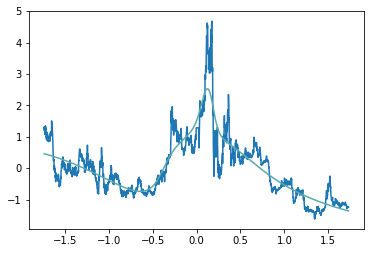

In [32]:
#Predict the stock price using the model
pricePredict = mlpr.predict(dates)
#Display the predicted reuslts agains the actual data
plt.plot(dates, prices)
plt.plot(dates, pricePredict, c='#5aa9ab')
plt.show()

## maxIterator = 10000, tol = 0.1

In [33]:
#Number of neurons in the input, output, and hidden layers
input2 = 1
output2 = 1
hidden2 = 50
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', output2)]
#construct the model and dictate params
mlpr2 = ANNR([input2], layers, batchSize = 256, maxIter = 10000, tol = 0.1, reg = 1e-4, verbose = True)

In [34]:
holdDays = 5
totalDays = len(dates)
mlpr2.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      0.93031436 (Batch Size:   256)
Iter     2	      0.96806701 (Batch Size:   256)
Iter     3	      0.98508269 (Batch Size:   256)
Iter     4	      0.90854983 (Batch Size:   256)
Iter     5	      0.91720424 (Batch Size:   256)
Iter     6	      0.92299715 (Batch Size:   256)
Iter     7	      0.89309218 (Batch Size:   256)
Iter     8	      0.88785632 (Batch Size:   256)
Iter     9	      0.88268510 (Batch Size:   256)
Iter    10	      0.88719499 (Batch Size:   256)
Iter    11	      0.83263193 (Batch Size:   256)
Iter    12	      0.87144573 (Batch Size:   256)
Iter    13	      0.93231132 (Batch Size:   256)
Iter    14	      0.82047753 (Batch Size:   256)
Iter    15	      0.87747635 (Batch Size:   256)
Iter    16	      0.82424341 (Batch Size:   256)
Iter    17	      0.83848231 (Batch Size:   256)
Iter    18	      0.91868075 (Batch Size:   256)
Iter    19	      0.83925925 (Batch Size:   256)
Iter    20	      0.90611076 (Batch Size:   256)
Iter    21	      0.83724550 (Batch Size:

Iter   176	      0.27428693 (Batch Size:   256)
Iter   177	      0.26433133 (Batch Size:   256)
Iter   178	      0.29421511 (Batch Size:   256)
Iter   179	      0.25586236 (Batch Size:   256)
Iter   180	      0.30665320 (Batch Size:   256)
Iter   181	      0.28857848 (Batch Size:   256)
Iter   182	      0.27144443 (Batch Size:   256)
Iter   183	      0.32793492 (Batch Size:   256)
Iter   184	      0.27405573 (Batch Size:   256)
Iter   185	      0.27652369 (Batch Size:   256)
Iter   186	      0.31782342 (Batch Size:   256)
Iter   187	      0.29823035 (Batch Size:   256)
Iter   188	      0.30747305 (Batch Size:   256)
Iter   189	      0.27753590 (Batch Size:   256)
Iter   190	      0.32431196 (Batch Size:   256)
Iter   191	      0.27714082 (Batch Size:   256)
Iter   192	      0.32450035 (Batch Size:   256)
Iter   193	      0.30846423 (Batch Size:   256)
Iter   194	      0.32252583 (Batch Size:   256)
Iter   195	      0.27979479 (Batch Size:   256)
Iter   196	      0.28864493 (Batch Size:

Iter   356	      0.28152899 (Batch Size:   256)
Iter   357	      0.27438495 (Batch Size:   256)
Iter   358	      0.25879517 (Batch Size:   256)
Iter   359	      0.28784798 (Batch Size:   256)
Iter   360	      0.27309427 (Batch Size:   256)
Iter   361	      0.25331235 (Batch Size:   256)
Iter   362	      0.28751223 (Batch Size:   256)
Iter   363	      0.27313371 (Batch Size:   256)
Iter   364	      0.28118482 (Batch Size:   256)
Iter   365	      0.28944784 (Batch Size:   256)
Iter   366	      0.27249861 (Batch Size:   256)
Iter   367	      0.27971755 (Batch Size:   256)
Iter   368	      0.26522209 (Batch Size:   256)
Iter   369	      0.26979982 (Batch Size:   256)
Iter   370	      0.29223874 (Batch Size:   256)
Iter   371	      0.30221182 (Batch Size:   256)
Iter   372	      0.28684392 (Batch Size:   256)
Iter   373	      0.28093973 (Batch Size:   256)
Iter   374	      0.29743932 (Batch Size:   256)
Iter   375	      0.27031027 (Batch Size:   256)
Iter   376	      0.26238253 (Batch Size:

Iter   540	      0.24784127 (Batch Size:   256)
Iter   541	      0.24966818 (Batch Size:   256)
Iter   542	      0.24410670 (Batch Size:   256)
Iter   543	      0.28127700 (Batch Size:   256)
Iter   544	      0.25539749 (Batch Size:   256)
Iter   545	      0.24851951 (Batch Size:   256)
Iter   546	      0.24059195 (Batch Size:   256)
Iter   547	      0.24484938 (Batch Size:   256)
Iter   548	      0.26393883 (Batch Size:   256)
Iter   549	      0.26482344 (Batch Size:   256)
Iter   550	      0.25048736 (Batch Size:   256)
Iter   551	      0.24210347 (Batch Size:   256)
Iter   552	      0.25045015 (Batch Size:   256)
Iter   553	      0.24984600 (Batch Size:   256)
Iter   554	      0.24395942 (Batch Size:   256)
Iter   555	      0.25101580 (Batch Size:   256)
Iter   556	      0.26065941 (Batch Size:   256)
Iter   557	      0.25826853 (Batch Size:   256)
Iter   558	      0.26807635 (Batch Size:   256)
Iter   559	      0.25095362 (Batch Size:   256)
Iter   560	      0.26191720 (Batch Size:

Iter   718	      0.19361050 (Batch Size:   256)
Iter   719	      0.18782616 (Batch Size:   256)
Iter   720	      0.19302223 (Batch Size:   256)
Iter   721	      0.18729357 (Batch Size:   256)
Iter   722	      0.19640254 (Batch Size:   256)
Iter   723	      0.19367888 (Batch Size:   256)
Iter   724	      0.19049748 (Batch Size:   256)
Iter   725	      0.20160574 (Batch Size:   256)
Iter   726	      0.19545831 (Batch Size:   256)
Iter   727	      0.19648415 (Batch Size:   256)
Iter   728	      0.21153826 (Batch Size:   256)
Iter   729	      0.20586968 (Batch Size:   256)
Iter   730	      0.19957587 (Batch Size:   256)
Iter   731	      0.19403811 (Batch Size:   256)
Iter   732	      0.18415586 (Batch Size:   256)
Iter   733	      0.18279623 (Batch Size:   256)
Iter   734	      0.19426340 (Batch Size:   256)
Iter   735	      0.20719816 (Batch Size:   256)
Iter   736	      0.18973204 (Batch Size:   256)
Iter   737	      0.19044495 (Batch Size:   256)
Iter   738	      0.18653458 (Batch Size:

Iter   891	      0.16297137 (Batch Size:   256)
Iter   892	      0.16178385 (Batch Size:   256)
Iter   893	      0.15026394 (Batch Size:   256)
Iter   894	      0.16128780 (Batch Size:   256)
Iter   895	      0.15125229 (Batch Size:   256)
Iter   896	      0.15572429 (Batch Size:   256)
Iter   897	      0.15800782 (Batch Size:   256)
Iter   898	      0.16403583 (Batch Size:   256)
Iter   899	      0.16198078 (Batch Size:   256)
Iter   900	      0.15180982 (Batch Size:   256)
Iter   901	      0.15119665 (Batch Size:   256)
Iter   902	      0.15201593 (Batch Size:   256)
Iter   903	      0.14958983 (Batch Size:   256)
Iter   904	      0.15974212 (Batch Size:   256)
Iter   905	      0.15522917 (Batch Size:   256)
Iter   906	      0.16242268 (Batch Size:   256)
Iter   907	      0.15633866 (Batch Size:   256)
Iter   908	      0.16094585 (Batch Size:   256)
Iter   909	      0.14216784 (Batch Size:   256)
Iter   910	      0.15595893 (Batch Size:   256)
Iter   911	      0.14695565 (Batch Size:

Iter  1070	      0.14232102 (Batch Size:   256)
Iter  1071	      0.14571891 (Batch Size:   256)
Iter  1072	      0.13391328 (Batch Size:   256)
Iter  1073	      0.13305554 (Batch Size:   256)
Iter  1074	      0.14312664 (Batch Size:   256)
Iter  1075	      0.13698591 (Batch Size:   256)
Iter  1076	      0.14014313 (Batch Size:   256)
Iter  1077	      0.14137882 (Batch Size:   256)
Iter  1078	      0.14070901 (Batch Size:   256)
Iter  1079	      0.13967111 (Batch Size:   256)
Iter  1080	      0.14401487 (Batch Size:   256)
Iter  1081	      0.13681270 (Batch Size:   256)
Iter  1082	      0.14339142 (Batch Size:   256)
Iter  1083	      0.13690404 (Batch Size:   256)
Iter  1084	      0.14537759 (Batch Size:   256)
Iter  1085	      0.13151281 (Batch Size:   256)
Iter  1086	      0.13175249 (Batch Size:   256)
Iter  1087	      0.14087320 (Batch Size:   256)
Iter  1088	      0.13081614 (Batch Size:   256)
Iter  1089	      0.14461869 (Batch Size:   256)
Iter  1090	      0.13214902 (Batch Size:

Iter  1241	      0.13115323 (Batch Size:   256)
Iter  1242	      0.13809463 (Batch Size:   256)
Iter  1243	      0.14237804 (Batch Size:   256)
Iter  1244	      0.12811368 (Batch Size:   256)
Iter  1245	      0.13440437 (Batch Size:   256)
Iter  1246	      0.12205031 (Batch Size:   256)
Iter  1247	      0.13122888 (Batch Size:   256)
Iter  1248	      0.12484721 (Batch Size:   256)
Iter  1249	      0.12591572 (Batch Size:   256)
Iter  1250	      0.12473474 (Batch Size:   256)
Iter  1251	      0.13694783 (Batch Size:   256)
Iter  1252	      0.13722875 (Batch Size:   256)
Iter  1253	      0.13542595 (Batch Size:   256)
Iter  1254	      0.12445512 (Batch Size:   256)
Iter  1255	      0.13400917 (Batch Size:   256)
Iter  1256	      0.12946348 (Batch Size:   256)
Iter  1257	      0.13902886 (Batch Size:   256)
Iter  1258	      0.12736309 (Batch Size:   256)
Iter  1259	      0.12947129 (Batch Size:   256)
Iter  1260	      0.12886029 (Batch Size:   256)
Iter  1261	      0.13657731 (Batch Size:

Iter  1421	      0.13060876 (Batch Size:   256)
Iter  1422	      0.12540668 (Batch Size:   256)
Iter  1423	      0.13199414 (Batch Size:   256)
Iter  1424	      0.12774957 (Batch Size:   256)
Iter  1425	      0.12432360 (Batch Size:   256)
Iter  1426	      0.12250132 (Batch Size:   256)
Iter  1427	      0.12530772 (Batch Size:   256)
Iter  1428	      0.12943925 (Batch Size:   256)
Iter  1429	      0.12938630 (Batch Size:   256)
Iter  1430	      0.12452029 (Batch Size:   256)
Iter  1431	      0.12796436 (Batch Size:   256)
Iter  1432	      0.12884950 (Batch Size:   256)
Iter  1433	      0.13238424 (Batch Size:   256)
Iter  1434	      0.12076158 (Batch Size:   256)
Iter  1435	      0.12318878 (Batch Size:   256)
Iter  1436	      0.12976192 (Batch Size:   256)
Iter  1437	      0.12430042 (Batch Size:   256)
Iter  1438	      0.12761226 (Batch Size:   256)
Iter  1439	      0.13220840 (Batch Size:   256)
Iter  1440	      0.13196363 (Batch Size:   256)
Iter  1441	      0.12127631 (Batch Size:

Iter  1592	      0.12932548 (Batch Size:   256)
Iter  1593	      0.12186208 (Batch Size:   256)
Iter  1594	      0.12593886 (Batch Size:   256)
Iter  1595	      0.12232608 (Batch Size:   256)
Iter  1596	      0.12703302 (Batch Size:   256)
Iter  1597	      0.12246944 (Batch Size:   256)
Iter  1598	      0.12923548 (Batch Size:   256)
Iter  1599	      0.12330721 (Batch Size:   256)
Iter  1600	      0.12752289 (Batch Size:   256)
Iter  1601	      0.12524099 (Batch Size:   256)
Iter  1602	      0.12688625 (Batch Size:   256)
Iter  1603	      0.12702535 (Batch Size:   256)
Iter  1604	      0.13258229 (Batch Size:   256)
Iter  1605	      0.12445313 (Batch Size:   256)
Iter  1606	      0.12778825 (Batch Size:   256)
Iter  1607	      0.12411523 (Batch Size:   256)
Iter  1608	      0.12888939 (Batch Size:   256)
Iter  1609	      0.12696284 (Batch Size:   256)
Iter  1610	      0.13002669 (Batch Size:   256)
Iter  1611	      0.12229276 (Batch Size:   256)
Iter  1612	      0.12863936 (Batch Size:

Iter  1771	      0.12444114 (Batch Size:   256)
Iter  1772	      0.12108233 (Batch Size:   256)
Iter  1773	      0.12957190 (Batch Size:   256)
Iter  1774	      0.12067603 (Batch Size:   256)
Iter  1775	      0.12480746 (Batch Size:   256)
Iter  1776	      0.12366817 (Batch Size:   256)
Iter  1777	      0.11968777 (Batch Size:   256)
Iter  1778	      0.12330204 (Batch Size:   256)
Iter  1779	      0.12434286 (Batch Size:   256)
Iter  1780	      0.12435901 (Batch Size:   256)
Iter  1781	      0.12913167 (Batch Size:   256)
Iter  1782	      0.12240292 (Batch Size:   256)
Iter  1783	      0.12205849 (Batch Size:   256)
Iter  1784	      0.12352319 (Batch Size:   256)
Iter  1785	      0.12526719 (Batch Size:   256)
Iter  1786	      0.12373685 (Batch Size:   256)
Iter  1787	      0.12371671 (Batch Size:   256)
Iter  1788	      0.12022947 (Batch Size:   256)
Iter  1789	      0.12635249 (Batch Size:   256)
Iter  1790	      0.12647413 (Batch Size:   256)
Iter  1791	      0.12404146 (Batch Size:

Iter  1945	      0.12642480 (Batch Size:   256)
Iter  1946	      0.11998820 (Batch Size:   256)
Iter  1947	      0.12205692 (Batch Size:   256)
Iter  1948	      0.12325473 (Batch Size:   256)
Iter  1949	      0.11714044 (Batch Size:   256)
Iter  1950	      0.12656207 (Batch Size:   256)
Iter  1951	      0.12355753 (Batch Size:   256)
Iter  1952	      0.12742206 (Batch Size:   256)
Iter  1953	      0.12242171 (Batch Size:   256)
Iter  1954	      0.13038906 (Batch Size:   256)
Iter  1955	      0.12415009 (Batch Size:   256)
Iter  1956	      0.12344393 (Batch Size:   256)
Iter  1957	      0.12101918 (Batch Size:   256)
Iter  1958	      0.12464226 (Batch Size:   256)
Iter  1959	      0.12126523 (Batch Size:   256)
Iter  1960	      0.12450444 (Batch Size:   256)
Iter  1961	      0.12799423 (Batch Size:   256)
Iter  1962	      0.12406637 (Batch Size:   256)
Iter  1963	      0.12346708 (Batch Size:   256)
Iter  1964	      0.11526696 (Batch Size:   256)
Iter  1965	      0.12533880 (Batch Size:

Iter  2118	      0.12443757 (Batch Size:   256)
Iter  2119	      0.12328099 (Batch Size:   256)
Iter  2120	      0.12235836 (Batch Size:   256)
Iter  2121	      0.12047150 (Batch Size:   256)
Iter  2122	      0.12416981 (Batch Size:   256)
Iter  2123	      0.12349281 (Batch Size:   256)
Iter  2124	      0.12397324 (Batch Size:   256)
Iter  2125	      0.12047027 (Batch Size:   256)
Iter  2126	      0.12719527 (Batch Size:   256)
Iter  2127	      0.11647011 (Batch Size:   256)
Iter  2128	      0.12339710 (Batch Size:   256)
Iter  2129	      0.12303454 (Batch Size:   256)
Iter  2130	      0.12069896 (Batch Size:   256)
Iter  2131	      0.12062675 (Batch Size:   256)
Iter  2132	      0.11777515 (Batch Size:   256)
Iter  2133	      0.11780865 (Batch Size:   256)
Iter  2134	      0.11599767 (Batch Size:   256)
Iter  2135	      0.12545493 (Batch Size:   256)
Iter  2136	      0.11803590 (Batch Size:   256)
Iter  2137	      0.12045016 (Batch Size:   256)
Iter  2138	      0.12177907 (Batch Size:

Iter  2297	      0.11278259 (Batch Size:   256)
Iter  2298	      0.11412893 (Batch Size:   256)
Iter  2299	      0.12716344 (Batch Size:   256)
Iter  2300	      0.12611919 (Batch Size:   256)
Iter  2301	      0.11324143 (Batch Size:   256)
Iter  2302	      0.11986991 (Batch Size:   256)
Iter  2303	      0.12040336 (Batch Size:   256)
Iter  2304	      0.12411812 (Batch Size:   256)
Iter  2305	      0.12180264 (Batch Size:   256)
Iter  2306	      0.12295939 (Batch Size:   256)
Iter  2307	      0.12738975 (Batch Size:   256)
Iter  2308	      0.12384131 (Batch Size:   256)
Iter  2309	      0.11957785 (Batch Size:   256)
Iter  2310	      0.12447293 (Batch Size:   256)
Iter  2311	      0.11733190 (Batch Size:   256)
Iter  2312	      0.11818816 (Batch Size:   256)
Iter  2313	      0.12101477 (Batch Size:   256)
Iter  2314	      0.11598093 (Batch Size:   256)
Iter  2315	      0.12205807 (Batch Size:   256)
Iter  2316	      0.11902882 (Batch Size:   256)
Iter  2317	      0.11985377 (Batch Size:

Iter  2477	      0.12039033 (Batch Size:   256)
Iter  2478	      0.12170285 (Batch Size:   256)
Iter  2479	      0.11984923 (Batch Size:   256)
Iter  2480	      0.12355822 (Batch Size:   256)
Iter  2481	      0.11761615 (Batch Size:   256)
Iter  2482	      0.12019787 (Batch Size:   256)
Iter  2483	      0.11764609 (Batch Size:   256)
Iter  2484	      0.12062755 (Batch Size:   256)
Iter  2485	      0.11636936 (Batch Size:   256)
Iter  2486	      0.11646950 (Batch Size:   256)
Iter  2487	      0.12162437 (Batch Size:   256)
Iter  2488	      0.11691608 (Batch Size:   256)
Iter  2489	      0.11490102 (Batch Size:   256)
Iter  2490	      0.11443336 (Batch Size:   256)
Iter  2491	      0.11689347 (Batch Size:   256)
Iter  2492	      0.12043693 (Batch Size:   256)
Iter  2493	      0.11908346 (Batch Size:   256)
Iter  2494	      0.12066648 (Batch Size:   256)
Iter  2495	      0.12108986 (Batch Size:   256)
Iter  2496	      0.11862448 (Batch Size:   256)
Iter  2497	      0.11636702 (Batch Size:

Iter  2657	      0.12132549 (Batch Size:   256)
Iter  2658	      0.12372666 (Batch Size:   256)
Iter  2659	      0.11783192 (Batch Size:   256)
Iter  2660	      0.12306647 (Batch Size:   256)
Iter  2661	      0.12244043 (Batch Size:   256)
Iter  2662	      0.11858472 (Batch Size:   256)
Iter  2663	      0.11947273 (Batch Size:   256)
Iter  2664	      0.12717933 (Batch Size:   256)
Iter  2665	      0.11933141 (Batch Size:   256)
Iter  2666	      0.11864558 (Batch Size:   256)
Iter  2667	      0.11260606 (Batch Size:   256)
Iter  2668	      0.11520628 (Batch Size:   256)
Iter  2669	      0.12212788 (Batch Size:   256)
Iter  2670	      0.12023478 (Batch Size:   256)
Iter  2671	      0.12096099 (Batch Size:   256)
Iter  2672	      0.11886677 (Batch Size:   256)
Iter  2673	      0.11631881 (Batch Size:   256)
Iter  2674	      0.11545393 (Batch Size:   256)
Iter  2675	      0.12306506 (Batch Size:   256)
Iter  2676	      0.11827269 (Batch Size:   256)
Iter  2677	      0.12172684 (Batch Size:

Iter  2829	      0.11722256 (Batch Size:   256)
Iter  2830	      0.12016223 (Batch Size:   256)
Iter  2831	      0.11818742 (Batch Size:   256)
Iter  2832	      0.11386680 (Batch Size:   256)
Iter  2833	      0.11530718 (Batch Size:   256)
Iter  2834	      0.11267325 (Batch Size:   256)
Iter  2835	      0.11905869 (Batch Size:   256)
Iter  2836	      0.11999980 (Batch Size:   256)
Iter  2837	      0.11566420 (Batch Size:   256)
Iter  2838	      0.11845336 (Batch Size:   256)
Iter  2839	      0.11911236 (Batch Size:   256)
Iter  2840	      0.11803665 (Batch Size:   256)
Iter  2841	      0.11462140 (Batch Size:   256)
Iter  2842	      0.12640679 (Batch Size:   256)
Iter  2843	      0.11832061 (Batch Size:   256)
Iter  2844	      0.11259244 (Batch Size:   256)
Iter  2845	      0.11753618 (Batch Size:   256)
Iter  2846	      0.11712445 (Batch Size:   256)
Iter  2847	      0.11874088 (Batch Size:   256)
Iter  2848	      0.12345275 (Batch Size:   256)
Iter  2849	      0.11358771 (Batch Size:

Iter  3004	      0.11574535 (Batch Size:   256)
Iter  3005	      0.11594185 (Batch Size:   256)
Iter  3006	      0.11436199 (Batch Size:   256)
Iter  3007	      0.12190422 (Batch Size:   256)
Iter  3008	      0.11886954 (Batch Size:   256)
Iter  3009	      0.11603505 (Batch Size:   256)
Iter  3010	      0.11584646 (Batch Size:   256)
Iter  3011	      0.11370104 (Batch Size:   256)
Iter  3012	      0.11927083 (Batch Size:   256)
Iter  3013	      0.11378351 (Batch Size:   256)
Iter  3014	      0.11294503 (Batch Size:   256)
Iter  3015	      0.11492151 (Batch Size:   256)
Iter  3016	      0.11452541 (Batch Size:   256)
Iter  3017	      0.11444604 (Batch Size:   256)
Iter  3018	      0.11700462 (Batch Size:   256)
Iter  3019	      0.11638606 (Batch Size:   256)
Iter  3020	      0.11505812 (Batch Size:   256)
Iter  3021	      0.11727128 (Batch Size:   256)
Iter  3022	      0.11991549 (Batch Size:   256)
Iter  3023	      0.11815016 (Batch Size:   256)
Iter  3024	      0.11851274 (Batch Size:

Iter  3185	      0.11597633 (Batch Size:   256)
Iter  3186	      0.11444174 (Batch Size:   256)
Iter  3187	      0.11988059 (Batch Size:   256)
Iter  3188	      0.10934355 (Batch Size:   256)
Iter  3189	      0.11705406 (Batch Size:   256)
Iter  3190	      0.11807780 (Batch Size:   256)
Iter  3191	      0.11211326 (Batch Size:   256)
Iter  3192	      0.12174109 (Batch Size:   256)
Iter  3193	      0.11775725 (Batch Size:   256)
Iter  3194	      0.11845911 (Batch Size:   256)
Iter  3195	      0.11742178 (Batch Size:   256)
Iter  3196	      0.11543392 (Batch Size:   256)
Iter  3197	      0.11854459 (Batch Size:   256)
Iter  3198	      0.11446473 (Batch Size:   256)
Iter  3199	      0.11059433 (Batch Size:   256)
Iter  3200	      0.11840471 (Batch Size:   256)
Iter  3201	      0.11900896 (Batch Size:   256)
Iter  3202	      0.11518851 (Batch Size:   256)
Iter  3203	      0.11914000 (Batch Size:   256)
Iter  3204	      0.11749641 (Batch Size:   256)
Iter  3205	      0.11553900 (Batch Size:

Iter  3366	      0.11243581 (Batch Size:   256)
Iter  3367	      0.11828165 (Batch Size:   256)
Iter  3368	      0.11615492 (Batch Size:   256)
Iter  3369	      0.11435180 (Batch Size:   256)
Iter  3370	      0.11545712 (Batch Size:   256)
Iter  3371	      0.11762516 (Batch Size:   256)
Iter  3372	      0.11668850 (Batch Size:   256)
Iter  3373	      0.11558083 (Batch Size:   256)
Iter  3374	      0.10959401 (Batch Size:   256)
Iter  3375	      0.11228925 (Batch Size:   256)
Iter  3376	      0.11174324 (Batch Size:   256)
Iter  3377	      0.11682777 (Batch Size:   256)
Iter  3378	      0.12153842 (Batch Size:   256)
Iter  3379	      0.12438366 (Batch Size:   256)
Iter  3380	      0.11598115 (Batch Size:   256)
Iter  3381	      0.12133550 (Batch Size:   256)
Iter  3382	      0.11749915 (Batch Size:   256)
Iter  3383	      0.11555754 (Batch Size:   256)
Iter  3384	      0.11706709 (Batch Size:   256)
Iter  3385	      0.11684991 (Batch Size:   256)
Iter  3386	      0.12038219 (Batch Size:

Iter  3545	      0.11244663 (Batch Size:   256)
Iter  3546	      0.11138846 (Batch Size:   256)
Iter  3547	      0.11545028 (Batch Size:   256)
Iter  3548	      0.11579457 (Batch Size:   256)
Iter  3549	      0.12440274 (Batch Size:   256)
Iter  3550	      0.11246616 (Batch Size:   256)
Iter  3551	      0.11170245 (Batch Size:   256)
Iter  3552	      0.11925717 (Batch Size:   256)
Iter  3553	      0.11813081 (Batch Size:   256)
Iter  3554	      0.11586127 (Batch Size:   256)
Iter  3555	      0.11131293 (Batch Size:   256)
Iter  3556	      0.11358105 (Batch Size:   256)
Iter  3557	      0.11882012 (Batch Size:   256)
Iter  3558	      0.12128518 (Batch Size:   256)
Iter  3559	      0.11494429 (Batch Size:   256)
Iter  3560	      0.11189148 (Batch Size:   256)
Iter  3561	      0.10992471 (Batch Size:   256)
Iter  3562	      0.12070140 (Batch Size:   256)
Iter  3563	      0.11897787 (Batch Size:   256)
Iter  3564	      0.11519851 (Batch Size:   256)
Iter  3565	      0.11824135 (Batch Size:

Iter  3719	      0.11321649 (Batch Size:   256)
Iter  3720	      0.11587158 (Batch Size:   256)
Iter  3721	      0.11931058 (Batch Size:   256)
Iter  3722	      0.11851258 (Batch Size:   256)
Iter  3723	      0.11448767 (Batch Size:   256)
Iter  3724	      0.11500194 (Batch Size:   256)
Iter  3725	      0.11643595 (Batch Size:   256)
Iter  3726	      0.11700115 (Batch Size:   256)
Iter  3727	      0.11619580 (Batch Size:   256)
Iter  3728	      0.11578255 (Batch Size:   256)
Iter  3729	      0.12334665 (Batch Size:   256)
Iter  3730	      0.11121726 (Batch Size:   256)
Iter  3731	      0.11016655 (Batch Size:   256)
Iter  3732	      0.12041810 (Batch Size:   256)
Iter  3733	      0.11054380 (Batch Size:   256)
Iter  3734	      0.11578194 (Batch Size:   256)
Iter  3735	      0.11444523 (Batch Size:   256)
Iter  3736	      0.11695020 (Batch Size:   256)
Iter  3737	      0.11336032 (Batch Size:   256)
Iter  3738	      0.12113559 (Batch Size:   256)
Iter  3739	      0.10854403 (Batch Size:

Iter  3896	      0.11616514 (Batch Size:   256)
Iter  3897	      0.11591243 (Batch Size:   256)
Iter  3898	      0.11260429 (Batch Size:   256)
Iter  3899	      0.10480121 (Batch Size:   256)
Iter  3900	      0.11166271 (Batch Size:   256)
Iter  3901	      0.11338145 (Batch Size:   256)
Iter  3902	      0.11531847 (Batch Size:   256)
Iter  3903	      0.11688249 (Batch Size:   256)
Iter  3904	      0.11607532 (Batch Size:   256)
Iter  3905	      0.11501227 (Batch Size:   256)
Iter  3906	      0.11208052 (Batch Size:   256)
Iter  3907	      0.11754726 (Batch Size:   256)
Iter  3908	      0.11907198 (Batch Size:   256)
Iter  3909	      0.11134427 (Batch Size:   256)
Iter  3910	      0.11071680 (Batch Size:   256)
Iter  3911	      0.11523683 (Batch Size:   256)
Iter  3912	      0.10603315 (Batch Size:   256)
Iter  3913	      0.11112191 (Batch Size:   256)
Iter  3914	      0.11081415 (Batch Size:   256)
Iter  3915	      0.11165650 (Batch Size:   256)
Iter  3916	      0.10935096 (Batch Size:

Iter  4067	      0.11540562 (Batch Size:   256)
Iter  4068	      0.11696308 (Batch Size:   256)
Iter  4069	      0.11129436 (Batch Size:   256)
Iter  4070	      0.11504130 (Batch Size:   256)
Iter  4071	      0.10939917 (Batch Size:   256)
Iter  4072	      0.11257995 (Batch Size:   256)
Iter  4073	      0.11197991 (Batch Size:   256)
Iter  4074	      0.11172187 (Batch Size:   256)
Iter  4075	      0.11207943 (Batch Size:   256)
Iter  4076	      0.11429970 (Batch Size:   256)
Iter  4077	      0.11675527 (Batch Size:   256)
Iter  4078	      0.11278994 (Batch Size:   256)
Iter  4079	      0.11020618 (Batch Size:   256)
Iter  4080	      0.11607387 (Batch Size:   256)
Iter  4081	      0.10841079 (Batch Size:   256)
Iter  4082	      0.10982463 (Batch Size:   256)
Iter  4083	      0.11221469 (Batch Size:   256)
Iter  4084	      0.10857304 (Batch Size:   256)
Iter  4085	      0.11667940 (Batch Size:   256)
Iter  4086	      0.11571376 (Batch Size:   256)
Iter  4087	      0.11722554 (Batch Size:

Iter  4253	      0.11281396 (Batch Size:   256)
Iter  4254	      0.11618319 (Batch Size:   256)
Iter  4255	      0.11007208 (Batch Size:   256)
Iter  4256	      0.11233071 (Batch Size:   256)
Iter  4257	      0.11334357 (Batch Size:   256)
Iter  4258	      0.10923873 (Batch Size:   256)
Iter  4259	      0.10744106 (Batch Size:   256)
Iter  4260	      0.11092598 (Batch Size:   256)
Iter  4261	      0.11666493 (Batch Size:   256)
Iter  4262	      0.11046875 (Batch Size:   256)
Iter  4263	      0.11862156 (Batch Size:   256)
Iter  4264	      0.11262764 (Batch Size:   256)
Iter  4265	      0.11743191 (Batch Size:   256)
Iter  4266	      0.11278311 (Batch Size:   256)
Iter  4267	      0.11214461 (Batch Size:   256)
Iter  4268	      0.11141835 (Batch Size:   256)
Iter  4269	      0.11470714 (Batch Size:   256)
Iter  4270	      0.11246027 (Batch Size:   256)
Iter  4271	      0.11199742 (Batch Size:   256)
Iter  4272	      0.11270520 (Batch Size:   256)
Iter  4273	      0.10882280 (Batch Size:

Iter  4439	      0.11496070 (Batch Size:   256)
Iter  4440	      0.11152517 (Batch Size:   256)
Iter  4441	      0.11285894 (Batch Size:   256)
Iter  4442	      0.11055188 (Batch Size:   256)
Iter  4443	      0.11225110 (Batch Size:   256)
Iter  4444	      0.11375915 (Batch Size:   256)
Iter  4445	      0.10889264 (Batch Size:   256)
Iter  4446	      0.11036543 (Batch Size:   256)
Iter  4447	      0.11456798 (Batch Size:   256)
Iter  4448	      0.10813881 (Batch Size:   256)
Iter  4449	      0.11512565 (Batch Size:   256)
Iter  4450	      0.11057711 (Batch Size:   256)
Iter  4451	      0.11832520 (Batch Size:   256)
Iter  4452	      0.11509002 (Batch Size:   256)
Iter  4453	      0.11108138 (Batch Size:   256)
Iter  4454	      0.10636972 (Batch Size:   256)
Iter  4455	      0.11421652 (Batch Size:   256)
Iter  4456	      0.11231249 (Batch Size:   256)
Iter  4457	      0.10961434 (Batch Size:   256)
Iter  4458	      0.10937815 (Batch Size:   256)
Iter  4459	      0.10889209 (Batch Size:

Iter  4610	      0.10791109 (Batch Size:   256)
Iter  4611	      0.11778573 (Batch Size:   256)
Iter  4612	      0.11681112 (Batch Size:   256)
Iter  4613	      0.10949572 (Batch Size:   256)
Iter  4614	      0.10779151 (Batch Size:   256)
Iter  4615	      0.11247332 (Batch Size:   256)
Iter  4616	      0.10787274 (Batch Size:   256)
Iter  4617	      0.10983972 (Batch Size:   256)
Iter  4618	      0.10660222 (Batch Size:   256)
Iter  4619	      0.11225482 (Batch Size:   256)
Iter  4620	      0.10562110 (Batch Size:   256)
Iter  4621	      0.11235016 (Batch Size:   256)
Iter  4622	      0.10940882 (Batch Size:   256)
Iter  4623	      0.10967418 (Batch Size:   256)
Iter  4624	      0.10614141 (Batch Size:   256)
Iter  4625	      0.11186971 (Batch Size:   256)
Iter  4626	      0.10664861 (Batch Size:   256)
Iter  4627	      0.11582597 (Batch Size:   256)
Iter  4628	      0.11716291 (Batch Size:   256)
Iter  4629	      0.11047086 (Batch Size:   256)
Iter  4630	      0.10901589 (Batch Size:

Iter  4786	      0.11233009 (Batch Size:   256)
Iter  4787	      0.11033039 (Batch Size:   256)
Iter  4788	      0.11401991 (Batch Size:   256)
Iter  4789	      0.11176937 (Batch Size:   256)
Iter  4790	      0.10941876 (Batch Size:   256)
Iter  4791	      0.10517977 (Batch Size:   256)
Iter  4792	      0.10498772 (Batch Size:   256)
Iter  4793	      0.10811561 (Batch Size:   256)
Iter  4794	      0.11306262 (Batch Size:   256)
Iter  4795	      0.11116129 (Batch Size:   256)
Iter  4796	      0.11265189 (Batch Size:   256)
Iter  4797	      0.10814357 (Batch Size:   256)
Iter  4798	      0.10938033 (Batch Size:   256)
Iter  4799	      0.10834431 (Batch Size:   256)
Iter  4800	      0.11206779 (Batch Size:   256)
Iter  4801	      0.10970367 (Batch Size:   256)
Iter  4802	      0.11403540 (Batch Size:   256)
Iter  4803	      0.11120132 (Batch Size:   256)
Iter  4804	      0.10892039 (Batch Size:   256)
Iter  4805	      0.11093802 (Batch Size:   256)
Iter  4806	      0.10853359 (Batch Size:

Iter  4964	      0.10709366 (Batch Size:   256)
Iter  4965	      0.10566230 (Batch Size:   256)
Iter  4966	      0.11156047 (Batch Size:   256)
Iter  4967	      0.10899976 (Batch Size:   256)
Iter  4968	      0.10878891 (Batch Size:   256)
Iter  4969	      0.10606749 (Batch Size:   256)
Iter  4970	      0.10871343 (Batch Size:   256)
Iter  4971	      0.10882228 (Batch Size:   256)
Iter  4972	      0.11635217 (Batch Size:   256)
Iter  4973	      0.11021611 (Batch Size:   256)
Iter  4974	      0.11600670 (Batch Size:   256)
Iter  4975	      0.10565341 (Batch Size:   256)
Iter  4976	      0.11064936 (Batch Size:   256)
Iter  4977	      0.10741416 (Batch Size:   256)
Iter  4978	      0.11291003 (Batch Size:   256)
Iter  4979	      0.10889363 (Batch Size:   256)
Iter  4980	      0.11262600 (Batch Size:   256)
Iter  4981	      0.10689123 (Batch Size:   256)
Iter  4982	      0.10576153 (Batch Size:   256)
Iter  4983	      0.10320031 (Batch Size:   256)
Iter  4984	      0.10799633 (Batch Size:

Iter  5144	      0.11170058 (Batch Size:   256)
Iter  5145	      0.10238178 (Batch Size:   256)
Iter  5146	      0.11042887 (Batch Size:   256)
Iter  5147	      0.11581704 (Batch Size:   256)
Iter  5148	      0.10976889 (Batch Size:   256)
Iter  5149	      0.11047175 (Batch Size:   256)
Iter  5150	      0.11281945 (Batch Size:   256)
Iter  5151	      0.11485114 (Batch Size:   256)
Iter  5152	      0.11474031 (Batch Size:   256)
Iter  5153	      0.11425845 (Batch Size:   256)
Iter  5154	      0.10933583 (Batch Size:   256)
Iter  5155	      0.11046647 (Batch Size:   256)
Iter  5156	      0.10920406 (Batch Size:   256)
Iter  5157	      0.10909553 (Batch Size:   256)
Iter  5158	      0.10651812 (Batch Size:   256)
Iter  5159	      0.11025327 (Batch Size:   256)
Iter  5160	      0.10533167 (Batch Size:   256)
Iter  5161	      0.11007013 (Batch Size:   256)
Iter  5162	      0.11023246 (Batch Size:   256)
Iter  5163	      0.10902878 (Batch Size:   256)
Iter  5164	      0.11171590 (Batch Size:

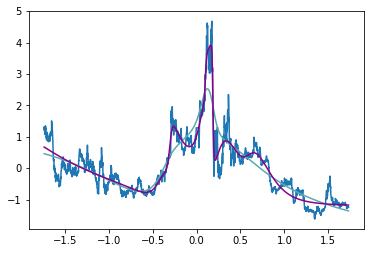

In [35]:
pricePredict2 = mlpr2.predict(dates)
plt.plot(dates, prices)
plt.plot(dates, pricePredict, c='#5aa9ab')
plt.plot(dates, pricePredict2, c='#8B008B')
plt.show()


## maxIterator = 10000, tol = 0.1, # of hidden layer = 100

In [38]:
#Number of neurons in the input, output, and hidden layers
input3 = 1
output3 = 1
hidden3 = 100
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', output)]
#construct the model and dictate params
mlpr3 = ANNR([input], layers, batchSize = 256, maxIter = 10000, tol = 0.1, reg = 1e-4, verbose = True)

In [39]:
holdDays = 5
totalDays = len(dates)
mlpr3.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      2.77274613 (Batch Size:   256)
Iter     2	      2.02386583 (Batch Size:   256)
Iter     3	      1.77375762 (Batch Size:   256)
Iter     4	      1.30754237 (Batch Size:   256)
Iter     5	      1.08353311 (Batch Size:   256)
Iter     6	      1.05253991 (Batch Size:   256)
Iter     7	      0.96742214 (Batch Size:   256)
Iter     8	      0.92480363 (Batch Size:   256)
Iter     9	      0.85011110 (Batch Size:   256)
Iter    10	      0.92183263 (Batch Size:   256)
Iter    11	      0.88604082 (Batch Size:   256)
Iter    12	      0.90621718 (Batch Size:   256)
Iter    13	      0.91689132 (Batch Size:   256)
Iter    14	      0.87385288 (Batch Size:   256)
Iter    15	      0.89918852 (Batch Size:   256)
Iter    16	      0.86165439 (Batch Size:   256)
Iter    17	      0.83749416 (Batch Size:   256)
Iter    18	      0.82112310 (Batch Size:   256)
Iter    19	      0.83205566 (Batch Size:   256)
Iter    20	      0.90985266 (Batch Size:   256)
Iter    21	      0.78454532 (Batch Size:

Iter   173	      0.28638773 (Batch Size:   256)
Iter   174	      0.29466145 (Batch Size:   256)
Iter   175	      0.28431865 (Batch Size:   256)
Iter   176	      0.31771502 (Batch Size:   256)
Iter   177	      0.30723366 (Batch Size:   256)
Iter   178	      0.29522347 (Batch Size:   256)
Iter   179	      0.28758430 (Batch Size:   256)
Iter   180	      0.30542177 (Batch Size:   256)
Iter   181	      0.29235202 (Batch Size:   256)
Iter   182	      0.32477985 (Batch Size:   256)
Iter   183	      0.30080952 (Batch Size:   256)
Iter   184	      0.27167281 (Batch Size:   256)
Iter   185	      0.29236321 (Batch Size:   256)
Iter   186	      0.31369202 (Batch Size:   256)
Iter   187	      0.29896424 (Batch Size:   256)
Iter   188	      0.32182288 (Batch Size:   256)
Iter   189	      0.28936115 (Batch Size:   256)
Iter   190	      0.28909713 (Batch Size:   256)
Iter   191	      0.27790377 (Batch Size:   256)
Iter   192	      0.31081085 (Batch Size:   256)
Iter   193	      0.30637974 (Batch Size:

Iter   350	      0.29705404 (Batch Size:   256)
Iter   351	      0.27662016 (Batch Size:   256)
Iter   352	      0.28529183 (Batch Size:   256)
Iter   353	      0.31069886 (Batch Size:   256)
Iter   354	      0.29684558 (Batch Size:   256)
Iter   355	      0.30181740 (Batch Size:   256)
Iter   356	      0.29473891 (Batch Size:   256)
Iter   357	      0.28574751 (Batch Size:   256)
Iter   358	      0.28506959 (Batch Size:   256)
Iter   359	      0.29593392 (Batch Size:   256)
Iter   360	      0.31547818 (Batch Size:   256)
Iter   361	      0.28661445 (Batch Size:   256)
Iter   362	      0.29913796 (Batch Size:   256)
Iter   363	      0.28934448 (Batch Size:   256)
Iter   364	      0.31552085 (Batch Size:   256)
Iter   365	      0.29045334 (Batch Size:   256)
Iter   366	      0.28623838 (Batch Size:   256)
Iter   367	      0.31442554 (Batch Size:   256)
Iter   368	      0.28308357 (Batch Size:   256)
Iter   369	      0.28380873 (Batch Size:   256)
Iter   370	      0.29131899 (Batch Size:

Iter   522	      0.26440421 (Batch Size:   256)
Iter   523	      0.27721033 (Batch Size:   256)
Iter   524	      0.28932852 (Batch Size:   256)
Iter   525	      0.30352300 (Batch Size:   256)
Iter   526	      0.26335278 (Batch Size:   256)
Iter   527	      0.29468381 (Batch Size:   256)
Iter   528	      0.25956087 (Batch Size:   256)
Iter   529	      0.27582493 (Batch Size:   256)
Iter   530	      0.25794919 (Batch Size:   256)
Iter   531	      0.27661299 (Batch Size:   256)
Iter   532	      0.30009290 (Batch Size:   256)
Iter   533	      0.28351527 (Batch Size:   256)
Iter   534	      0.26982374 (Batch Size:   256)
Iter   535	      0.26293332 (Batch Size:   256)
Iter   536	      0.27653217 (Batch Size:   256)
Iter   537	      0.29186462 (Batch Size:   256)
Iter   538	      0.28146514 (Batch Size:   256)
Iter   539	      0.27837323 (Batch Size:   256)
Iter   540	      0.27479274 (Batch Size:   256)
Iter   541	      0.27456522 (Batch Size:   256)
Iter   542	      0.27481525 (Batch Size:

Iter   695	      0.20392203 (Batch Size:   256)
Iter   696	      0.19115394 (Batch Size:   256)
Iter   697	      0.20646724 (Batch Size:   256)
Iter   698	      0.19180071 (Batch Size:   256)
Iter   699	      0.20387241 (Batch Size:   256)
Iter   700	      0.20749859 (Batch Size:   256)
Iter   701	      0.18605995 (Batch Size:   256)
Iter   702	      0.20579728 (Batch Size:   256)
Iter   703	      0.20626359 (Batch Size:   256)
Iter   704	      0.19215476 (Batch Size:   256)
Iter   705	      0.20474332 (Batch Size:   256)
Iter   706	      0.20492125 (Batch Size:   256)
Iter   707	      0.18508355 (Batch Size:   256)
Iter   708	      0.19220235 (Batch Size:   256)
Iter   709	      0.20502538 (Batch Size:   256)
Iter   710	      0.19402755 (Batch Size:   256)
Iter   711	      0.18730709 (Batch Size:   256)
Iter   712	      0.19160880 (Batch Size:   256)
Iter   713	      0.20000645 (Batch Size:   256)
Iter   714	      0.18571555 (Batch Size:   256)
Iter   715	      0.19313476 (Batch Size:

Iter   877	      0.15393417 (Batch Size:   256)
Iter   878	      0.15263094 (Batch Size:   256)
Iter   879	      0.15386468 (Batch Size:   256)
Iter   880	      0.15296310 (Batch Size:   256)
Iter   881	      0.15741826 (Batch Size:   256)
Iter   882	      0.15168645 (Batch Size:   256)
Iter   883	      0.15288445 (Batch Size:   256)
Iter   884	      0.15838091 (Batch Size:   256)
Iter   885	      0.16045061 (Batch Size:   256)
Iter   886	      0.16242595 (Batch Size:   256)
Iter   887	      0.15710585 (Batch Size:   256)
Iter   888	      0.14754595 (Batch Size:   256)
Iter   889	      0.15491099 (Batch Size:   256)
Iter   890	      0.16129763 (Batch Size:   256)
Iter   891	      0.15834091 (Batch Size:   256)
Iter   892	      0.15358109 (Batch Size:   256)
Iter   893	      0.16570159 (Batch Size:   256)
Iter   894	      0.15354304 (Batch Size:   256)
Iter   895	      0.15107189 (Batch Size:   256)
Iter   896	      0.14412102 (Batch Size:   256)
Iter   897	      0.14650016 (Batch Size:

Iter  1056	      0.13423603 (Batch Size:   256)
Iter  1057	      0.13640104 (Batch Size:   256)
Iter  1058	      0.13408669 (Batch Size:   256)
Iter  1059	      0.13773566 (Batch Size:   256)
Iter  1060	      0.14472363 (Batch Size:   256)
Iter  1061	      0.14222126 (Batch Size:   256)
Iter  1062	      0.13598386 (Batch Size:   256)
Iter  1063	      0.14079760 (Batch Size:   256)
Iter  1064	      0.13511841 (Batch Size:   256)
Iter  1065	      0.13799260 (Batch Size:   256)
Iter  1066	      0.13810110 (Batch Size:   256)
Iter  1067	      0.14133956 (Batch Size:   256)
Iter  1068	      0.13217709 (Batch Size:   256)
Iter  1069	      0.13188530 (Batch Size:   256)
Iter  1070	      0.14124988 (Batch Size:   256)
Iter  1071	      0.13754505 (Batch Size:   256)
Iter  1072	      0.13405616 (Batch Size:   256)
Iter  1073	      0.13692822 (Batch Size:   256)
Iter  1074	      0.13674823 (Batch Size:   256)
Iter  1075	      0.13641360 (Batch Size:   256)
Iter  1076	      0.13969943 (Batch Size:

Iter  1227	      0.13282856 (Batch Size:   256)
Iter  1228	      0.13095451 (Batch Size:   256)
Iter  1229	      0.13755016 (Batch Size:   256)
Iter  1230	      0.12974063 (Batch Size:   256)
Iter  1231	      0.13992582 (Batch Size:   256)
Iter  1232	      0.13474185 (Batch Size:   256)
Iter  1233	      0.13019029 (Batch Size:   256)
Iter  1234	      0.12990191 (Batch Size:   256)
Iter  1235	      0.13109117 (Batch Size:   256)
Iter  1236	      0.13236343 (Batch Size:   256)
Iter  1237	      0.12923199 (Batch Size:   256)
Iter  1238	      0.13213113 (Batch Size:   256)
Iter  1239	      0.13268785 (Batch Size:   256)
Iter  1240	      0.13534477 (Batch Size:   256)
Iter  1241	      0.13314468 (Batch Size:   256)
Iter  1242	      0.13840222 (Batch Size:   256)
Iter  1243	      0.13598811 (Batch Size:   256)
Iter  1244	      0.12688703 (Batch Size:   256)
Iter  1245	      0.13615264 (Batch Size:   256)
Iter  1246	      0.12697007 (Batch Size:   256)
Iter  1247	      0.13850867 (Batch Size:

Iter  1406	      0.12651416 (Batch Size:   256)
Iter  1407	      0.12355941 (Batch Size:   256)
Iter  1408	      0.13676284 (Batch Size:   256)
Iter  1409	      0.13206744 (Batch Size:   256)
Iter  1410	      0.12512766 (Batch Size:   256)
Iter  1411	      0.13528655 (Batch Size:   256)
Iter  1412	      0.13246785 (Batch Size:   256)
Iter  1413	      0.13526341 (Batch Size:   256)
Iter  1414	      0.12573558 (Batch Size:   256)
Iter  1415	      0.13779469 (Batch Size:   256)
Iter  1416	      0.13345803 (Batch Size:   256)
Iter  1417	      0.13004732 (Batch Size:   256)
Iter  1418	      0.13344910 (Batch Size:   256)
Iter  1419	      0.13066105 (Batch Size:   256)
Iter  1420	      0.12927322 (Batch Size:   256)
Iter  1421	      0.12606996 (Batch Size:   256)
Iter  1422	      0.12821988 (Batch Size:   256)
Iter  1423	      0.12947159 (Batch Size:   256)
Iter  1424	      0.13385320 (Batch Size:   256)
Iter  1425	      0.12707881 (Batch Size:   256)
Iter  1426	      0.12681461 (Batch Size:

Iter  1581	      0.12780472 (Batch Size:   256)
Iter  1582	      0.12505204 (Batch Size:   256)
Iter  1583	      0.13295227 (Batch Size:   256)
Iter  1584	      0.12675821 (Batch Size:   256)
Iter  1585	      0.12823907 (Batch Size:   256)
Iter  1586	      0.13054956 (Batch Size:   256)
Iter  1587	      0.13386053 (Batch Size:   256)
Iter  1588	      0.13468579 (Batch Size:   256)
Iter  1589	      0.12800712 (Batch Size:   256)
Iter  1590	      0.12464258 (Batch Size:   256)
Iter  1591	      0.12489806 (Batch Size:   256)
Iter  1592	      0.12999963 (Batch Size:   256)
Iter  1593	      0.12880785 (Batch Size:   256)
Iter  1594	      0.12892302 (Batch Size:   256)
Iter  1595	      0.12013899 (Batch Size:   256)
Iter  1596	      0.12427096 (Batch Size:   256)
Iter  1597	      0.12708338 (Batch Size:   256)
Iter  1598	      0.13140100 (Batch Size:   256)
Iter  1599	      0.13104994 (Batch Size:   256)
Iter  1600	      0.12828821 (Batch Size:   256)
Iter  1601	      0.13056108 (Batch Size:

Iter  1760	      0.12899709 (Batch Size:   256)
Iter  1761	      0.12518581 (Batch Size:   256)
Iter  1762	      0.13099222 (Batch Size:   256)
Iter  1763	      0.12915669 (Batch Size:   256)
Iter  1764	      0.12843172 (Batch Size:   256)
Iter  1765	      0.12382516 (Batch Size:   256)
Iter  1766	      0.12891723 (Batch Size:   256)
Iter  1767	      0.12573577 (Batch Size:   256)
Iter  1768	      0.12359569 (Batch Size:   256)
Iter  1769	      0.12618323 (Batch Size:   256)
Iter  1770	      0.12537772 (Batch Size:   256)
Iter  1771	      0.12702062 (Batch Size:   256)
Iter  1772	      0.12498503 (Batch Size:   256)
Iter  1773	      0.13267996 (Batch Size:   256)
Iter  1774	      0.13154277 (Batch Size:   256)
Iter  1775	      0.12512319 (Batch Size:   256)
Iter  1776	      0.13116233 (Batch Size:   256)
Iter  1777	      0.12049344 (Batch Size:   256)
Iter  1778	      0.12569918 (Batch Size:   256)
Iter  1779	      0.12609059 (Batch Size:   256)
Iter  1780	      0.12288127 (Batch Size:

Iter  1943	      0.12691785 (Batch Size:   256)
Iter  1944	      0.11834173 (Batch Size:   256)
Iter  1945	      0.12669948 (Batch Size:   256)
Iter  1946	      0.12243865 (Batch Size:   256)
Iter  1947	      0.12380539 (Batch Size:   256)
Iter  1948	      0.12668991 (Batch Size:   256)
Iter  1949	      0.12380430 (Batch Size:   256)
Iter  1950	      0.12549700 (Batch Size:   256)
Iter  1951	      0.12214909 (Batch Size:   256)
Iter  1952	      0.12263633 (Batch Size:   256)
Iter  1953	      0.12741440 (Batch Size:   256)
Iter  1954	      0.12545405 (Batch Size:   256)
Iter  1955	      0.12335760 (Batch Size:   256)
Iter  1956	      0.12677664 (Batch Size:   256)
Iter  1957	      0.11885135 (Batch Size:   256)
Iter  1958	      0.13093168 (Batch Size:   256)
Iter  1959	      0.12355129 (Batch Size:   256)
Iter  1960	      0.12415280 (Batch Size:   256)
Iter  1961	      0.11940428 (Batch Size:   256)
Iter  1962	      0.12460465 (Batch Size:   256)
Iter  1963	      0.12507592 (Batch Size:

Iter  2120	      0.12413107 (Batch Size:   256)
Iter  2121	      0.12281338 (Batch Size:   256)
Iter  2122	      0.12527414 (Batch Size:   256)
Iter  2123	      0.12402868 (Batch Size:   256)
Iter  2124	      0.12679825 (Batch Size:   256)
Iter  2125	      0.12620077 (Batch Size:   256)
Iter  2126	      0.12499395 (Batch Size:   256)
Iter  2127	      0.11898299 (Batch Size:   256)
Iter  2128	      0.12232981 (Batch Size:   256)
Iter  2129	      0.12478316 (Batch Size:   256)
Iter  2130	      0.12290108 (Batch Size:   256)
Iter  2131	      0.12109297 (Batch Size:   256)
Iter  2132	      0.12273410 (Batch Size:   256)
Iter  2133	      0.12798230 (Batch Size:   256)
Iter  2134	      0.12651704 (Batch Size:   256)
Iter  2135	      0.12342815 (Batch Size:   256)
Iter  2136	      0.11955175 (Batch Size:   256)
Iter  2137	      0.12009801 (Batch Size:   256)
Iter  2138	      0.12288535 (Batch Size:   256)
Iter  2139	      0.12429699 (Batch Size:   256)
Iter  2140	      0.12900947 (Batch Size:

Iter  2293	      0.12851977 (Batch Size:   256)
Iter  2294	      0.12866051 (Batch Size:   256)
Iter  2295	      0.12543871 (Batch Size:   256)
Iter  2296	      0.11726203 (Batch Size:   256)
Iter  2297	      0.12566176 (Batch Size:   256)
Iter  2298	      0.12044926 (Batch Size:   256)
Iter  2299	      0.12327410 (Batch Size:   256)
Iter  2300	      0.11770266 (Batch Size:   256)
Iter  2301	      0.12130411 (Batch Size:   256)
Iter  2302	      0.12089703 (Batch Size:   256)
Iter  2303	      0.11858324 (Batch Size:   256)
Iter  2304	      0.12616065 (Batch Size:   256)
Iter  2305	      0.11969201 (Batch Size:   256)
Iter  2306	      0.11828266 (Batch Size:   256)
Iter  2307	      0.11817683 (Batch Size:   256)
Iter  2308	      0.12176623 (Batch Size:   256)
Iter  2309	      0.12576034 (Batch Size:   256)
Iter  2310	      0.13035508 (Batch Size:   256)
Iter  2311	      0.12144767 (Batch Size:   256)
Iter  2312	      0.12646505 (Batch Size:   256)
Iter  2313	      0.11921724 (Batch Size:

Iter  2475	      0.12171406 (Batch Size:   256)
Iter  2476	      0.12253359 (Batch Size:   256)
Iter  2477	      0.12032726 (Batch Size:   256)
Iter  2478	      0.12595797 (Batch Size:   256)
Iter  2479	      0.11621052 (Batch Size:   256)
Iter  2480	      0.12351268 (Batch Size:   256)
Iter  2481	      0.12173852 (Batch Size:   256)
Iter  2482	      0.11976508 (Batch Size:   256)
Iter  2483	      0.11720565 (Batch Size:   256)
Iter  2484	      0.12083958 (Batch Size:   256)
Iter  2485	      0.12346260 (Batch Size:   256)
Iter  2486	      0.12194930 (Batch Size:   256)
Iter  2487	      0.13128763 (Batch Size:   256)
Iter  2488	      0.11537389 (Batch Size:   256)
Iter  2489	      0.11780516 (Batch Size:   256)
Iter  2490	      0.12553520 (Batch Size:   256)
Iter  2491	      0.12319374 (Batch Size:   256)
Iter  2492	      0.11260530 (Batch Size:   256)
Iter  2493	      0.12332489 (Batch Size:   256)
Iter  2494	      0.11880476 (Batch Size:   256)
Iter  2495	      0.12091246 (Batch Size:

Iter  2647	      0.11694086 (Batch Size:   256)
Iter  2648	      0.11634851 (Batch Size:   256)
Iter  2649	      0.12213618 (Batch Size:   256)
Iter  2650	      0.12263462 (Batch Size:   256)
Iter  2651	      0.11928273 (Batch Size:   256)
Iter  2652	      0.12289143 (Batch Size:   256)
Iter  2653	      0.11958216 (Batch Size:   256)
Iter  2654	      0.11893862 (Batch Size:   256)
Iter  2655	      0.11873937 (Batch Size:   256)
Iter  2656	      0.11850982 (Batch Size:   256)
Iter  2657	      0.11613449 (Batch Size:   256)
Iter  2658	      0.12305352 (Batch Size:   256)
Iter  2659	      0.12464739 (Batch Size:   256)
Iter  2660	      0.11833712 (Batch Size:   256)
Iter  2661	      0.11914549 (Batch Size:   256)
Iter  2662	      0.11658480 (Batch Size:   256)
Iter  2663	      0.11913138 (Batch Size:   256)
Iter  2664	      0.11580616 (Batch Size:   256)
Iter  2665	      0.11845222 (Batch Size:   256)
Iter  2666	      0.11515364 (Batch Size:   256)
Iter  2667	      0.11977652 (Batch Size:

Iter  2823	      0.11725472 (Batch Size:   256)
Iter  2824	      0.11892423 (Batch Size:   256)
Iter  2825	      0.11975362 (Batch Size:   256)
Iter  2826	      0.12188815 (Batch Size:   256)
Iter  2827	      0.11874767 (Batch Size:   256)
Iter  2828	      0.11537100 (Batch Size:   256)
Iter  2829	      0.11601076 (Batch Size:   256)
Iter  2830	      0.11575292 (Batch Size:   256)
Iter  2831	      0.11726423 (Batch Size:   256)
Iter  2832	      0.12196653 (Batch Size:   256)
Iter  2833	      0.11968450 (Batch Size:   256)
Iter  2834	      0.11463144 (Batch Size:   256)
Iter  2835	      0.11513305 (Batch Size:   256)
Iter  2836	      0.11456062 (Batch Size:   256)
Iter  2837	      0.10948645 (Batch Size:   256)
Iter  2838	      0.11875399 (Batch Size:   256)
Iter  2839	      0.12327895 (Batch Size:   256)
Iter  2840	      0.11646341 (Batch Size:   256)
Iter  2841	      0.12064663 (Batch Size:   256)
Iter  2842	      0.11843563 (Batch Size:   256)
Iter  2843	      0.11705358 (Batch Size:

Iter  2996	      0.11055717 (Batch Size:   256)
Iter  2997	      0.11399501 (Batch Size:   256)
Iter  2998	      0.12185093 (Batch Size:   256)
Iter  2999	      0.11520894 (Batch Size:   256)
Iter  3000	      0.12110802 (Batch Size:   256)
Iter  3001	      0.11899572 (Batch Size:   256)
Iter  3002	      0.12457589 (Batch Size:   256)
Iter  3003	      0.11945699 (Batch Size:   256)
Iter  3004	      0.11500513 (Batch Size:   256)
Iter  3005	      0.11731824 (Batch Size:   256)
Iter  3006	      0.11723250 (Batch Size:   256)
Iter  3007	      0.11941139 (Batch Size:   256)
Iter  3008	      0.12047845 (Batch Size:   256)
Iter  3009	      0.12345918 (Batch Size:   256)
Iter  3010	      0.11570882 (Batch Size:   256)
Iter  3011	      0.12128447 (Batch Size:   256)
Iter  3012	      0.12340641 (Batch Size:   256)
Iter  3013	      0.12165737 (Batch Size:   256)
Iter  3014	      0.12295357 (Batch Size:   256)
Iter  3015	      0.11774979 (Batch Size:   256)
Iter  3016	      0.12064261 (Batch Size:

Iter  3169	      0.11594837 (Batch Size:   256)
Iter  3170	      0.11316654 (Batch Size:   256)
Iter  3171	      0.11176291 (Batch Size:   256)
Iter  3172	      0.11209323 (Batch Size:   256)
Iter  3173	      0.11790909 (Batch Size:   256)
Iter  3174	      0.11312218 (Batch Size:   256)
Iter  3175	      0.11918455 (Batch Size:   256)
Iter  3176	      0.11435358 (Batch Size:   256)
Iter  3177	      0.11273840 (Batch Size:   256)
Iter  3178	      0.11555874 (Batch Size:   256)
Iter  3179	      0.11455248 (Batch Size:   256)
Iter  3180	      0.12350289 (Batch Size:   256)
Iter  3181	      0.11663411 (Batch Size:   256)
Iter  3182	      0.11496225 (Batch Size:   256)
Iter  3183	      0.11361789 (Batch Size:   256)
Iter  3184	      0.11491933 (Batch Size:   256)
Iter  3185	      0.11941465 (Batch Size:   256)
Iter  3186	      0.11603785 (Batch Size:   256)
Iter  3187	      0.11352253 (Batch Size:   256)
Iter  3188	      0.11475609 (Batch Size:   256)
Iter  3189	      0.11620511 (Batch Size:

Iter  3343	      0.11210377 (Batch Size:   256)
Iter  3344	      0.11216729 (Batch Size:   256)
Iter  3345	      0.11237375 (Batch Size:   256)
Iter  3346	      0.11041768 (Batch Size:   256)
Iter  3347	      0.11085897 (Batch Size:   256)
Iter  3348	      0.11519450 (Batch Size:   256)
Iter  3349	      0.11452287 (Batch Size:   256)
Iter  3350	      0.11645830 (Batch Size:   256)
Iter  3351	      0.11111168 (Batch Size:   256)
Iter  3352	      0.11353432 (Batch Size:   256)
Iter  3353	      0.11491088 (Batch Size:   256)
Iter  3354	      0.11651816 (Batch Size:   256)
Iter  3355	      0.11353611 (Batch Size:   256)
Iter  3356	      0.11293623 (Batch Size:   256)
Iter  3357	      0.11545592 (Batch Size:   256)
Iter  3358	      0.11269311 (Batch Size:   256)
Iter  3359	      0.11477421 (Batch Size:   256)
Iter  3360	      0.11402919 (Batch Size:   256)
Iter  3361	      0.11529639 (Batch Size:   256)
Iter  3362	      0.11655510 (Batch Size:   256)
Iter  3363	      0.11443683 (Batch Size:

Iter  3515	      0.11194199 (Batch Size:   256)
Iter  3516	      0.11170110 (Batch Size:   256)
Iter  3517	      0.10899800 (Batch Size:   256)
Iter  3518	      0.10566137 (Batch Size:   256)
Iter  3519	      0.10808143 (Batch Size:   256)
Iter  3520	      0.10884407 (Batch Size:   256)
Iter  3521	      0.10973646 (Batch Size:   256)
Iter  3522	      0.10805730 (Batch Size:   256)
Iter  3523	      0.11191658 (Batch Size:   256)
Iter  3524	      0.10910120 (Batch Size:   256)
Iter  3525	      0.10998451 (Batch Size:   256)
Iter  3526	      0.10589085 (Batch Size:   256)
Iter  3527	      0.11447597 (Batch Size:   256)
Iter  3528	      0.11134955 (Batch Size:   256)
Iter  3529	      0.11264749 (Batch Size:   256)
Iter  3530	      0.11040362 (Batch Size:   256)
Iter  3531	      0.10518781 (Batch Size:   256)
Iter  3532	      0.11203870 (Batch Size:   256)
Iter  3533	      0.11184321 (Batch Size:   256)
Iter  3534	      0.10863907 (Batch Size:   256)
Iter  3535	      0.11168416 (Batch Size:

Iter  3697	      0.10493722 (Batch Size:   256)
Iter  3698	      0.10152033 (Batch Size:   256)
Iter  3699	      0.10560056 (Batch Size:   256)
Iter  3700	      0.10496831 (Batch Size:   256)
Iter  3701	      0.10888767 (Batch Size:   256)
Iter  3702	      0.10228785 (Batch Size:   256)
Iter  3703	      0.10342888 (Batch Size:   256)
Iter  3704	      0.10973728 (Batch Size:   256)
Iter  3705	      0.10759182 (Batch Size:   256)
Iter  3706	      0.10683820 (Batch Size:   256)
Iter  3707	      0.10687668 (Batch Size:   256)
Iter  3708	      0.10903127 (Batch Size:   256)
Iter  3709	      0.10688244 (Batch Size:   256)
Iter  3710	      0.10398526 (Batch Size:   256)
Iter  3711	      0.10630164 (Batch Size:   256)
Iter  3712	      0.10385454 (Batch Size:   256)
Iter  3713	      0.10656315 (Batch Size:   256)
Iter  3714	      0.10253067 (Batch Size:   256)
Iter  3715	      0.10273679 (Batch Size:   256)
Iter  3716	      0.10247847 (Batch Size:   256)
Iter  3717	      0.10385031 (Batch Size:

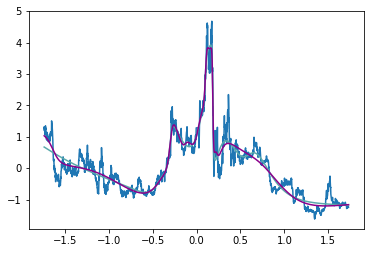

In [40]:
pricePredict3 = mlpr3.predict(dates)
plt.plot(dates, prices)
plt.plot(dates, pricePredict2, c='#5aa9ab')
plt.plot(dates, pricePredict3, c='#8B008B')
plt.show()

## maxIterator = 10000, tol = 0.1, # of hidden layer = 100

In [41]:
#Number of neurons in the input, output, and hidden layers
input4 = 1
output4 = 1
hidden4 = 100
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'),('F', hidden), ('AF', 'tanh'), ('F', output)]
#construct the model and dictate params
mlpr4 = ANNR([input], layers, batchSize = 256, maxIter = 10000, tol = 0.1, reg = 1e-4, verbose = True)

In [42]:
holdDays = 5
totalDays = len(dates)
mlpr4.fit(dates[0:(totalDays-holdDays)], prices[0:(totalDays-holdDays)])

Iter     1	      0.97527012 (Batch Size:   256)
Iter     2	      0.92557027 (Batch Size:   256)
Iter     3	      0.88643178 (Batch Size:   256)
Iter     4	      0.92918133 (Batch Size:   256)
Iter     5	      0.93775755 (Batch Size:   256)
Iter     6	      0.87777879 (Batch Size:   256)
Iter     7	      0.93652525 (Batch Size:   256)
Iter     8	      0.82155774 (Batch Size:   256)
Iter     9	      0.81927222 (Batch Size:   256)
Iter    10	      0.86129279 (Batch Size:   256)
Iter    11	      0.77552902 (Batch Size:   256)
Iter    12	      0.77233334 (Batch Size:   256)
Iter    13	      0.68082988 (Batch Size:   256)
Iter    14	      0.66069096 (Batch Size:   256)
Iter    15	      0.60623587 (Batch Size:   256)
Iter    16	      0.55269047 (Batch Size:   256)
Iter    17	      0.50144992 (Batch Size:   256)
Iter    18	      0.46450242 (Batch Size:   256)
Iter    19	      0.46053465 (Batch Size:   256)
Iter    20	      0.46335945 (Batch Size:   256)
Iter    21	      0.39334609 (Batch Size:

Iter   181	      0.31491806 (Batch Size:   256)
Iter   182	      0.29010527 (Batch Size:   256)
Iter   183	      0.30051503 (Batch Size:   256)
Iter   184	      0.27397962 (Batch Size:   256)
Iter   185	      0.28255608 (Batch Size:   256)
Iter   186	      0.28458804 (Batch Size:   256)
Iter   187	      0.28992212 (Batch Size:   256)
Iter   188	      0.29770077 (Batch Size:   256)
Iter   189	      0.28733976 (Batch Size:   256)
Iter   190	      0.30835456 (Batch Size:   256)
Iter   191	      0.27725993 (Batch Size:   256)
Iter   192	      0.26667618 (Batch Size:   256)
Iter   193	      0.30431341 (Batch Size:   256)
Iter   194	      0.28494270 (Batch Size:   256)
Iter   195	      0.28566691 (Batch Size:   256)
Iter   196	      0.26116325 (Batch Size:   256)
Iter   197	      0.28209683 (Batch Size:   256)
Iter   198	      0.27807978 (Batch Size:   256)
Iter   199	      0.28480785 (Batch Size:   256)
Iter   200	      0.28684548 (Batch Size:   256)
Iter   201	      0.28826250 (Batch Size:

Iter   353	      0.16606712 (Batch Size:   256)
Iter   354	      0.16737303 (Batch Size:   256)
Iter   355	      0.17333100 (Batch Size:   256)
Iter   356	      0.15902318 (Batch Size:   256)
Iter   357	      0.15348323 (Batch Size:   256)
Iter   358	      0.16734235 (Batch Size:   256)
Iter   359	      0.16036265 (Batch Size:   256)
Iter   360	      0.16468871 (Batch Size:   256)
Iter   361	      0.16264067 (Batch Size:   256)
Iter   362	      0.16496591 (Batch Size:   256)
Iter   363	      0.16269055 (Batch Size:   256)
Iter   364	      0.15423321 (Batch Size:   256)
Iter   365	      0.15222681 (Batch Size:   256)
Iter   366	      0.16171704 (Batch Size:   256)
Iter   367	      0.16544613 (Batch Size:   256)
Iter   368	      0.15508491 (Batch Size:   256)
Iter   369	      0.15900766 (Batch Size:   256)
Iter   370	      0.14839912 (Batch Size:   256)
Iter   371	      0.16335462 (Batch Size:   256)
Iter   372	      0.15727818 (Batch Size:   256)
Iter   373	      0.16049300 (Batch Size:

Iter   530	      0.13195286 (Batch Size:   256)
Iter   531	      0.12921357 (Batch Size:   256)
Iter   532	      0.13663248 (Batch Size:   256)
Iter   533	      0.13580789 (Batch Size:   256)
Iter   534	      0.13314179 (Batch Size:   256)
Iter   535	      0.13926459 (Batch Size:   256)
Iter   536	      0.13285380 (Batch Size:   256)
Iter   537	      0.13394624 (Batch Size:   256)
Iter   538	      0.13883074 (Batch Size:   256)
Iter   539	      0.13558056 (Batch Size:   256)
Iter   540	      0.14614602 (Batch Size:   256)
Iter   541	      0.13077622 (Batch Size:   256)
Iter   542	      0.12926497 (Batch Size:   256)
Iter   543	      0.13734841 (Batch Size:   256)
Iter   544	      0.14079210 (Batch Size:   256)
Iter   545	      0.13318978 (Batch Size:   256)
Iter   546	      0.14254727 (Batch Size:   256)
Iter   547	      0.13447134 (Batch Size:   256)
Iter   548	      0.13434816 (Batch Size:   256)
Iter   549	      0.14093649 (Batch Size:   256)
Iter   550	      0.13820210 (Batch Size:

Iter   701	      0.12627976 (Batch Size:   256)
Iter   702	      0.12670348 (Batch Size:   256)
Iter   703	      0.12809373 (Batch Size:   256)
Iter   704	      0.13195630 (Batch Size:   256)
Iter   705	      0.12887219 (Batch Size:   256)
Iter   706	      0.12680996 (Batch Size:   256)
Iter   707	      0.13215408 (Batch Size:   256)
Iter   708	      0.13356924 (Batch Size:   256)
Iter   709	      0.12923472 (Batch Size:   256)
Iter   710	      0.12773666 (Batch Size:   256)
Iter   711	      0.12640416 (Batch Size:   256)
Iter   712	      0.12354453 (Batch Size:   256)
Iter   713	      0.13426265 (Batch Size:   256)
Iter   714	      0.12980985 (Batch Size:   256)
Iter   715	      0.13135154 (Batch Size:   256)
Iter   716	      0.12769805 (Batch Size:   256)
Iter   717	      0.12916225 (Batch Size:   256)
Iter   718	      0.13129266 (Batch Size:   256)
Iter   719	      0.12866138 (Batch Size:   256)
Iter   720	      0.12712060 (Batch Size:   256)
Iter   721	      0.12922298 (Batch Size:

Iter   878	      0.12456383 (Batch Size:   256)
Iter   879	      0.12925941 (Batch Size:   256)
Iter   880	      0.12018899 (Batch Size:   256)
Iter   881	      0.12663933 (Batch Size:   256)
Iter   882	      0.11929989 (Batch Size:   256)
Iter   883	      0.12798911 (Batch Size:   256)
Iter   884	      0.12079814 (Batch Size:   256)
Iter   885	      0.12230568 (Batch Size:   256)
Iter   886	      0.11929141 (Batch Size:   256)
Iter   887	      0.12120203 (Batch Size:   256)
Iter   888	      0.11994755 (Batch Size:   256)
Iter   889	      0.12155858 (Batch Size:   256)
Iter   890	      0.12384082 (Batch Size:   256)
Iter   891	      0.12005213 (Batch Size:   256)
Iter   892	      0.11831499 (Batch Size:   256)
Iter   893	      0.11972234 (Batch Size:   256)
Iter   894	      0.12602633 (Batch Size:   256)
Iter   895	      0.12585050 (Batch Size:   256)
Iter   896	      0.11886979 (Batch Size:   256)
Iter   897	      0.11912568 (Batch Size:   256)
Iter   898	      0.12020096 (Batch Size:

Iter  1059	      0.11278292 (Batch Size:   256)
Iter  1060	      0.11544228 (Batch Size:   256)
Iter  1061	      0.11477909 (Batch Size:   256)
Iter  1062	      0.11994362 (Batch Size:   256)
Iter  1063	      0.11841378 (Batch Size:   256)
Iter  1064	      0.11762181 (Batch Size:   256)
Iter  1065	      0.11575666 (Batch Size:   256)
Iter  1066	      0.10936561 (Batch Size:   256)
Iter  1067	      0.11230063 (Batch Size:   256)
Iter  1068	      0.11362657 (Batch Size:   256)
Iter  1069	      0.11842234 (Batch Size:   256)
Iter  1070	      0.11133493 (Batch Size:   256)
Iter  1071	      0.11989399 (Batch Size:   256)
Iter  1072	      0.11403837 (Batch Size:   256)
Iter  1073	      0.11261587 (Batch Size:   256)
Iter  1074	      0.11630557 (Batch Size:   256)
Iter  1075	      0.11433633 (Batch Size:   256)
Iter  1076	      0.11459838 (Batch Size:   256)
Iter  1077	      0.11834402 (Batch Size:   256)
Iter  1078	      0.11217348 (Batch Size:   256)
Iter  1079	      0.11412060 (Batch Size:

Iter  1238	      0.10758486 (Batch Size:   256)
Iter  1239	      0.11182682 (Batch Size:   256)
Iter  1240	      0.10944103 (Batch Size:   256)
Iter  1241	      0.11420961 (Batch Size:   256)
Iter  1242	      0.11267134 (Batch Size:   256)
Iter  1243	      0.10828463 (Batch Size:   256)
Iter  1244	      0.10410986 (Batch Size:   256)
Iter  1245	      0.11243813 (Batch Size:   256)
Iter  1246	      0.11435632 (Batch Size:   256)
Iter  1247	      0.11209883 (Batch Size:   256)
Iter  1248	      0.10775613 (Batch Size:   256)
Iter  1249	      0.11191550 (Batch Size:   256)
Iter  1250	      0.11015464 (Batch Size:   256)
Iter  1251	      0.11105701 (Batch Size:   256)
Iter  1252	      0.11430900 (Batch Size:   256)
Iter  1253	      0.10657173 (Batch Size:   256)
Iter  1254	      0.10931122 (Batch Size:   256)
Iter  1255	      0.11420517 (Batch Size:   256)
Iter  1256	      0.11083596 (Batch Size:   256)
Iter  1257	      0.11247209 (Batch Size:   256)
Iter  1258	      0.11307087 (Batch Size:

Iter  1414	      0.10693394 (Batch Size:   256)
Iter  1415	      0.10416168 (Batch Size:   256)
Iter  1416	      0.10660258 (Batch Size:   256)
Iter  1417	      0.10435936 (Batch Size:   256)
Iter  1418	      0.10563047 (Batch Size:   256)
Iter  1419	      0.10667484 (Batch Size:   256)
Iter  1420	      0.10691292 (Batch Size:   256)
Iter  1421	      0.10637448 (Batch Size:   256)
Iter  1422	      0.10592495 (Batch Size:   256)
Iter  1423	      0.10503950 (Batch Size:   256)
Iter  1424	      0.09988609 (Batch Size:   256)


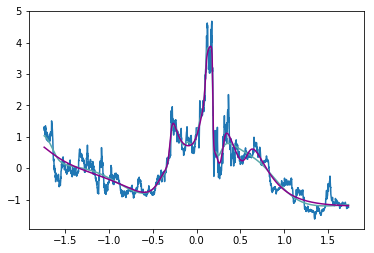

In [44]:
pricePredict4 = mlpr4.predict(dates)
plt.plot(dates, prices)
plt.plot(dates, pricePredict3, c='#5aa9ab')
plt.plot(dates, pricePredict4, c='#8B008B')
plt.show()

In [45]:
dates

array([[-1.73461949],
       [-1.7336594 ],
       [-1.73269931],
       ...,
       [ 1.72840832],
       [ 1.72936841],
       [ 1.73032849]])

In [47]:
dates[-1]-dates[-2]

array([0.00096009])

In [48]:
dates[-2]-dates[-3]

array([0.00096009])

In [70]:
for i in range(30):
    dates = np.append(dates, dates[-1]+dates[-1]-dates[-2])

In [73]:
dates = dates.reshape(-1,1)

In [74]:
dates

array([[-1.73461949],
       [-1.7336594 ],
       [-1.73269931],
       ...,
       [ 1.75721088],
       [ 1.75817097],
       [ 1.75913105]])

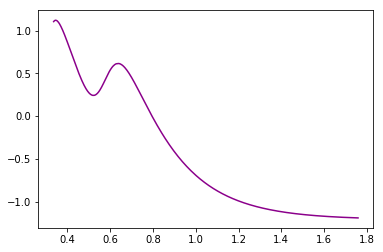

In [83]:
pricePredict4 = mlpr4.predict(dates[-1000:])
#plt.plot(dates, prices)
#plt.plot(dates, pricePredict3, c='#5aa9ab')
plt.plot(dates[-1000:], pricePredict4, c='#8B008B')
plt.show()

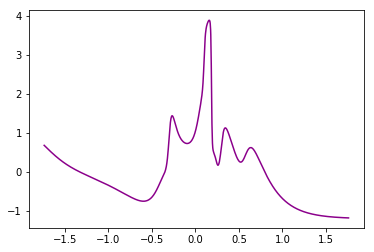

In [84]:
pricePredict4 = mlpr4.predict(dates)
#plt.plot(dates, prices)
#plt.plot(dates, pricePredict3, c='#5aa9ab')
plt.plot(dates, pricePredict4, c='#8B008B')
plt.show()

## Model 5

In [140]:
stock_data = pd.read_csv("/Users/Elizabeth.Ke.Zhang/Desktop/stock_analysis/StockDir/凤凰股份600716.ss.csv")
print(stock_data.shape)
print(stock_data.head(5))
dates = pd.to_datetime(stock_data['Date']).values.reshape(-1,1)
days = dates - dates[0]
days = days.astype('timedelta64[D]').astype(int)
stock_data['Date'] = days
stock_data.head(5)

(2403, 7)
         Date  High   Low  Open  Close     Volume  Adj Close
0  2010-01-04  9.68  9.51  9.59   9.58  3933500.0   8.945965
1  2010-01-05  9.99  9.56  9.73   9.66  6134797.0   9.020670
2  2010-01-06  9.69  9.44  9.57   9.45  6401929.0   8.824568
3  2010-01-07  9.58  9.31  9.50   9.38  4601650.0   8.759202
4  2010-01-08  9.54  9.29  9.41   9.54  4047412.0   8.908611


,Date,High,Low,Open,Close,Volume,Adj Close
0,0,9.68,9.51,9.59,9.58,3933500.0,8.945965
1,1,9.99,9.56,9.73,9.66,6134797.0,9.020670
2,2,9.69,9.44,9.57,9.45,6401929.0,8.824568
3,3,9.58,9.31,9.50,9.38,4601650.0,8.759202
4,4,9.54,9.29,9.41,9.54,4047412.0,8.908611


In [141]:
stock_data = stock_data.tail(600)
stock_data.loc[:,['Date','High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']] = scale(stock_data.loc[:,['Date','High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']])

/Users/Elizabeth.Ke.Zhang/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [142]:
stock_data.tail(10)

,Date,High,Low,Open,Close,Volume,Adj Close
1803,-1.706038,0.791175,0.810440,0.847405,0.732372,0.036453,0.603288
1804,-1.702205,0.752827,0.797279,0.717414,0.836338,-0.309649,0.706725
1805,-1.698371,0.842306,0.902568,0.834406,0.888320,0.175389,0.758444
1806,-1.694538,1.046833,0.968373,0.899401,1.057264,0.733370,0.926531
1807,-1.690705,0.931787,1.034179,1.003393,0.966294,0.195478,0.836022
1808,-1.679205,0.931787,1.047340,0.951397,1.005282,-0.152171,0.874812
1809,-1.675371,0.931787,1.060501,1.003393,0.992286,-0.143282,0.861882
1810,-1.671538,0.919004,1.007856,1.016391,0.979290,-0.273626,0.848953
1811,-1.667705,0.919004,0.928890,0.964395,0.862329,0.123357,0.732585
1812,-1.663871,0.855090,0.876245,0.847405,0.875325,0.295089,0.745514


(600, 1)


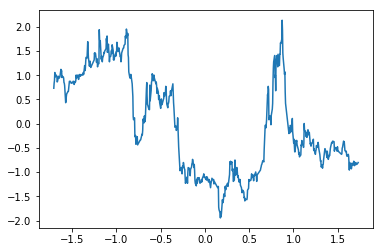

In [143]:
#gets the price and dates from the matrix
prices = stock_data['Close'].values.reshape(-1,1)
dates = stock_data['Date'].values.reshape(-1,1)
print(prices.shape)
#creates a plot of the data and then displays it
plt.plot(dates[:,0],prices[:, 0])
plt.show()

In [144]:
#Number of neurons in the input, output, and hidden layers
input5 = 1
output5 = 1
hidden5 = 100
#array of layers, 3 hidden and 1 output, along with the tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'),('F', hidden), ('AF', 'tanh'), ('F', output)]
#construct the model and dictate params
mlpr5 = ANNR([input], layers, batchSize = 256, maxIter = 20000, tol = 0.005, reg = 1e-4, verbose = True)

In [145]:
holdDays = 5
totalDays = len(dates)
mlpr5.fit(dates[:(totalDays-holdDays)], prices[:(totalDays-holdDays)])

Iter     1	      1.51676277 (Batch Size:   256)
Iter     2	      1.39169482 (Batch Size:   256)
Iter     3	      1.25459361 (Batch Size:   256)
Iter     4	      1.03129405 (Batch Size:   256)
Iter     5	      1.00552334 (Batch Size:   256)
Iter     6	      0.90929900 (Batch Size:   256)
Iter     7	      0.79216987 (Batch Size:   256)
Iter     8	      0.76790126 (Batch Size:   256)
Iter     9	      0.72073541 (Batch Size:   256)
Iter    10	      0.71384762 (Batch Size:   256)
Iter    11	      0.73107469 (Batch Size:   256)
Iter    12	      0.67179122 (Batch Size:   256)
Iter    13	      0.69155363 (Batch Size:   256)
Iter    14	      0.66448146 (Batch Size:   256)
Iter    15	      0.67274916 (Batch Size:   256)
Iter    16	      0.67913421 (Batch Size:   256)
Iter    17	      0.70047341 (Batch Size:   256)
Iter    18	      0.67743307 (Batch Size:   256)
Iter    19	      0.69795899 (Batch Size:   256)
Iter    20	      0.71547333 (Batch Size:   256)
Iter    21	      0.67211926 (Batch Size:

Iter   181	      0.33140905 (Batch Size:   256)
Iter   182	      0.35378407 (Batch Size:   256)
Iter   183	      0.29439153 (Batch Size:   256)
Iter   184	      0.31178730 (Batch Size:   256)
Iter   185	      0.36706559 (Batch Size:   256)
Iter   186	      0.32628111 (Batch Size:   256)
Iter   187	      0.32672918 (Batch Size:   256)
Iter   188	      0.31733841 (Batch Size:   256)
Iter   189	      0.35110658 (Batch Size:   256)
Iter   190	      0.36148693 (Batch Size:   256)
Iter   191	      0.34312408 (Batch Size:   256)
Iter   192	      0.36902340 (Batch Size:   256)
Iter   193	      0.33280121 (Batch Size:   256)
Iter   194	      0.35946943 (Batch Size:   256)
Iter   195	      0.31381019 (Batch Size:   256)
Iter   196	      0.31231561 (Batch Size:   256)
Iter   197	      0.33035568 (Batch Size:   256)
Iter   198	      0.31737383 (Batch Size:   256)
Iter   199	      0.35687503 (Batch Size:   256)
Iter   200	      0.30925368 (Batch Size:   256)
Iter   201	      0.34226056 (Batch Size:

Iter   362	      0.19867639 (Batch Size:   256)
Iter   363	      0.21475286 (Batch Size:   256)
Iter   364	      0.20643716 (Batch Size:   256)
Iter   365	      0.23987592 (Batch Size:   256)
Iter   366	      0.19215223 (Batch Size:   256)
Iter   367	      0.21949110 (Batch Size:   256)
Iter   368	      0.22889737 (Batch Size:   256)
Iter   369	      0.22979232 (Batch Size:   256)
Iter   370	      0.22300943 (Batch Size:   256)
Iter   371	      0.19949559 (Batch Size:   256)
Iter   372	      0.22041268 (Batch Size:   256)
Iter   373	      0.22682433 (Batch Size:   256)
Iter   374	      0.22114065 (Batch Size:   256)
Iter   375	      0.20181597 (Batch Size:   256)
Iter   376	      0.21227949 (Batch Size:   256)
Iter   377	      0.21625017 (Batch Size:   256)
Iter   378	      0.21832628 (Batch Size:   256)
Iter   379	      0.21164211 (Batch Size:   256)
Iter   380	      0.21461868 (Batch Size:   256)
Iter   381	      0.21165873 (Batch Size:   256)
Iter   382	      0.19917864 (Batch Size:

Iter   539	      0.16729772 (Batch Size:   256)
Iter   540	      0.16798013 (Batch Size:   256)
Iter   541	      0.16805028 (Batch Size:   256)
Iter   542	      0.16330179 (Batch Size:   256)
Iter   543	      0.15546747 (Batch Size:   256)
Iter   544	      0.16612618 (Batch Size:   256)
Iter   545	      0.15798652 (Batch Size:   256)
Iter   546	      0.15479964 (Batch Size:   256)
Iter   547	      0.16677938 (Batch Size:   256)
Iter   548	      0.16324386 (Batch Size:   256)
Iter   549	      0.17616390 (Batch Size:   256)
Iter   550	      0.16941297 (Batch Size:   256)
Iter   551	      0.16497336 (Batch Size:   256)
Iter   552	      0.16039582 (Batch Size:   256)
Iter   553	      0.16962702 (Batch Size:   256)
Iter   554	      0.17674521 (Batch Size:   256)
Iter   555	      0.16223735 (Batch Size:   256)
Iter   556	      0.15976644 (Batch Size:   256)
Iter   557	      0.15287513 (Batch Size:   256)
Iter   558	      0.15766516 (Batch Size:   256)
Iter   559	      0.16360736 (Batch Size:

Iter   739	      0.13571543 (Batch Size:   256)
Iter   740	      0.13775431 (Batch Size:   256)
Iter   741	      0.13754883 (Batch Size:   256)
Iter   742	      0.13814945 (Batch Size:   256)
Iter   743	      0.12830659 (Batch Size:   256)
Iter   744	      0.14646693 (Batch Size:   256)
Iter   745	      0.14128727 (Batch Size:   256)
Iter   746	      0.15002011 (Batch Size:   256)
Iter   747	      0.13279971 (Batch Size:   256)
Iter   748	      0.13229383 (Batch Size:   256)
Iter   749	      0.13746239 (Batch Size:   256)
Iter   750	      0.14299370 (Batch Size:   256)
Iter   751	      0.13237082 (Batch Size:   256)
Iter   752	      0.13985901 (Batch Size:   256)
Iter   753	      0.13541386 (Batch Size:   256)
Iter   754	      0.13278717 (Batch Size:   256)
Iter   755	      0.14237160 (Batch Size:   256)
Iter   756	      0.14122778 (Batch Size:   256)
Iter   757	      0.14380162 (Batch Size:   256)
Iter   758	      0.13800822 (Batch Size:   256)
Iter   759	      0.15669514 (Batch Size:

Iter   925	      0.12339050 (Batch Size:   256)
Iter   926	      0.11242035 (Batch Size:   256)
Iter   927	      0.12180229 (Batch Size:   256)
Iter   928	      0.11823176 (Batch Size:   256)
Iter   929	      0.12400567 (Batch Size:   256)
Iter   930	      0.10952727 (Batch Size:   256)
Iter   931	      0.13428628 (Batch Size:   256)
Iter   932	      0.11520748 (Batch Size:   256)
Iter   933	      0.13147217 (Batch Size:   256)
Iter   934	      0.12810882 (Batch Size:   256)
Iter   935	      0.12529953 (Batch Size:   256)
Iter   936	      0.11870524 (Batch Size:   256)
Iter   937	      0.11913759 (Batch Size:   256)
Iter   938	      0.11745550 (Batch Size:   256)
Iter   939	      0.12651963 (Batch Size:   256)
Iter   940	      0.12070110 (Batch Size:   256)
Iter   941	      0.13229764 (Batch Size:   256)
Iter   942	      0.12579942 (Batch Size:   256)
Iter   943	      0.12419014 (Batch Size:   256)
Iter   944	      0.11760627 (Batch Size:   256)
Iter   945	      0.11445537 (Batch Size:

Iter  1105	      0.09662528 (Batch Size:   256)
Iter  1106	      0.10078015 (Batch Size:   256)
Iter  1107	      0.10354965 (Batch Size:   256)
Iter  1108	      0.09153342 (Batch Size:   256)
Iter  1109	      0.09672473 (Batch Size:   256)
Iter  1110	      0.09846985 (Batch Size:   256)
Iter  1111	      0.10135254 (Batch Size:   256)
Iter  1112	      0.10006564 (Batch Size:   256)
Iter  1113	      0.09462323 (Batch Size:   256)
Iter  1114	      0.09755101 (Batch Size:   256)
Iter  1115	      0.08901788 (Batch Size:   256)
Iter  1116	      0.09712004 (Batch Size:   256)
Iter  1117	      0.10347004 (Batch Size:   256)
Iter  1118	      0.10072074 (Batch Size:   256)
Iter  1119	      0.09983661 (Batch Size:   256)
Iter  1120	      0.09909724 (Batch Size:   256)
Iter  1121	      0.10176982 (Batch Size:   256)
Iter  1122	      0.09054684 (Batch Size:   256)
Iter  1123	      0.09207250 (Batch Size:   256)
Iter  1124	      0.10043578 (Batch Size:   256)
Iter  1125	      0.09896286 (Batch Size:

Iter  1294	      0.08146793 (Batch Size:   256)
Iter  1295	      0.07688995 (Batch Size:   256)
Iter  1296	      0.07768345 (Batch Size:   256)
Iter  1297	      0.07892369 (Batch Size:   256)
Iter  1298	      0.08420104 (Batch Size:   256)
Iter  1299	      0.08163185 (Batch Size:   256)
Iter  1300	      0.08415249 (Batch Size:   256)
Iter  1301	      0.07752894 (Batch Size:   256)
Iter  1302	      0.07869111 (Batch Size:   256)
Iter  1303	      0.08042196 (Batch Size:   256)
Iter  1304	      0.08360195 (Batch Size:   256)
Iter  1305	      0.08249120 (Batch Size:   256)
Iter  1306	      0.07619019 (Batch Size:   256)
Iter  1307	      0.07909313 (Batch Size:   256)
Iter  1308	      0.08251606 (Batch Size:   256)
Iter  1309	      0.08088680 (Batch Size:   256)
Iter  1310	      0.08291624 (Batch Size:   256)
Iter  1311	      0.08204379 (Batch Size:   256)
Iter  1312	      0.07471415 (Batch Size:   256)
Iter  1313	      0.07367238 (Batch Size:   256)
Iter  1314	      0.07818284 (Batch Size:

Iter  1484	      0.06928554 (Batch Size:   256)
Iter  1485	      0.06816821 (Batch Size:   256)
Iter  1486	      0.07285697 (Batch Size:   256)
Iter  1487	      0.07028239 (Batch Size:   256)
Iter  1488	      0.07351897 (Batch Size:   256)
Iter  1489	      0.07373956 (Batch Size:   256)
Iter  1490	      0.07067349 (Batch Size:   256)
Iter  1491	      0.07244441 (Batch Size:   256)
Iter  1492	      0.07258256 (Batch Size:   256)
Iter  1493	      0.07259652 (Batch Size:   256)
Iter  1494	      0.07183922 (Batch Size:   256)
Iter  1495	      0.07352528 (Batch Size:   256)
Iter  1496	      0.07243998 (Batch Size:   256)
Iter  1497	      0.07497157 (Batch Size:   256)
Iter  1498	      0.06914100 (Batch Size:   256)
Iter  1499	      0.07634939 (Batch Size:   256)
Iter  1500	      0.06904891 (Batch Size:   256)
Iter  1501	      0.07114653 (Batch Size:   256)
Iter  1502	      0.06838793 (Batch Size:   256)
Iter  1503	      0.07394196 (Batch Size:   256)
Iter  1504	      0.07707135 (Batch Size:

Iter  1667	      0.06553385 (Batch Size:   256)
Iter  1668	      0.06606726 (Batch Size:   256)
Iter  1669	      0.06761131 (Batch Size:   256)
Iter  1670	      0.06780836 (Batch Size:   256)
Iter  1671	      0.06546954 (Batch Size:   256)
Iter  1672	      0.06485922 (Batch Size:   256)
Iter  1673	      0.06881080 (Batch Size:   256)
Iter  1674	      0.06631047 (Batch Size:   256)
Iter  1675	      0.06755863 (Batch Size:   256)
Iter  1676	      0.06439259 (Batch Size:   256)
Iter  1677	      0.06475762 (Batch Size:   256)
Iter  1678	      0.06244317 (Batch Size:   256)
Iter  1679	      0.06857803 (Batch Size:   256)
Iter  1680	      0.06252664 (Batch Size:   256)
Iter  1681	      0.06675940 (Batch Size:   256)
Iter  1682	      0.06325649 (Batch Size:   256)
Iter  1683	      0.06568020 (Batch Size:   256)
Iter  1684	      0.06753037 (Batch Size:   256)
Iter  1685	      0.06773907 (Batch Size:   256)
Iter  1686	      0.06486672 (Batch Size:   256)
Iter  1687	      0.06892908 (Batch Size:

Iter  1861	      0.06205603 (Batch Size:   256)
Iter  1862	      0.06160990 (Batch Size:   256)
Iter  1863	      0.06623060 (Batch Size:   256)
Iter  1864	      0.06207744 (Batch Size:   256)
Iter  1865	      0.06383222 (Batch Size:   256)
Iter  1866	      0.06224548 (Batch Size:   256)
Iter  1867	      0.05905895 (Batch Size:   256)
Iter  1868	      0.06107641 (Batch Size:   256)
Iter  1869	      0.06281349 (Batch Size:   256)
Iter  1870	      0.06230312 (Batch Size:   256)
Iter  1871	      0.06158315 (Batch Size:   256)
Iter  1872	      0.06160347 (Batch Size:   256)
Iter  1873	      0.06397502 (Batch Size:   256)
Iter  1874	      0.06274945 (Batch Size:   256)
Iter  1875	      0.06243016 (Batch Size:   256)
Iter  1876	      0.06325409 (Batch Size:   256)
Iter  1877	      0.06533401 (Batch Size:   256)
Iter  1878	      0.06279247 (Batch Size:   256)
Iter  1879	      0.06328728 (Batch Size:   256)
Iter  1880	      0.06419278 (Batch Size:   256)
Iter  1881	      0.06458495 (Batch Size:

Iter  2036	      0.06215380 (Batch Size:   256)
Iter  2037	      0.05765224 (Batch Size:   256)
Iter  2038	      0.05753643 (Batch Size:   256)
Iter  2039	      0.06210464 (Batch Size:   256)
Iter  2040	      0.06086672 (Batch Size:   256)
Iter  2041	      0.05944697 (Batch Size:   256)
Iter  2042	      0.06016256 (Batch Size:   256)
Iter  2043	      0.06246675 (Batch Size:   256)
Iter  2044	      0.05947634 (Batch Size:   256)
Iter  2045	      0.05840371 (Batch Size:   256)
Iter  2046	      0.05989540 (Batch Size:   256)
Iter  2047	      0.06311868 (Batch Size:   256)
Iter  2048	      0.06220905 (Batch Size:   256)
Iter  2049	      0.06210659 (Batch Size:   256)
Iter  2050	      0.05854026 (Batch Size:   256)
Iter  2051	      0.06235864 (Batch Size:   256)
Iter  2052	      0.06261861 (Batch Size:   256)
Iter  2053	      0.06558547 (Batch Size:   256)
Iter  2054	      0.06080575 (Batch Size:   256)
Iter  2055	      0.06166770 (Batch Size:   256)
Iter  2056	      0.05946283 (Batch Size:

Iter  2228	      0.05643210 (Batch Size:   256)
Iter  2229	      0.05662490 (Batch Size:   256)
Iter  2230	      0.05991259 (Batch Size:   256)
Iter  2231	      0.05813196 (Batch Size:   256)
Iter  2232	      0.05743731 (Batch Size:   256)
Iter  2233	      0.05950035 (Batch Size:   256)
Iter  2234	      0.06065871 (Batch Size:   256)
Iter  2235	      0.06232811 (Batch Size:   256)
Iter  2236	      0.05962006 (Batch Size:   256)
Iter  2237	      0.05842197 (Batch Size:   256)
Iter  2238	      0.05814145 (Batch Size:   256)
Iter  2239	      0.05862444 (Batch Size:   256)
Iter  2240	      0.05912794 (Batch Size:   256)
Iter  2241	      0.06097804 (Batch Size:   256)
Iter  2242	      0.05710091 (Batch Size:   256)
Iter  2243	      0.05868905 (Batch Size:   256)
Iter  2244	      0.05863570 (Batch Size:   256)
Iter  2245	      0.06169122 (Batch Size:   256)
Iter  2246	      0.05761965 (Batch Size:   256)
Iter  2247	      0.05795476 (Batch Size:   256)
Iter  2248	      0.05934867 (Batch Size:

Iter  2415	      0.05776421 (Batch Size:   256)
Iter  2416	      0.05846759 (Batch Size:   256)
Iter  2417	      0.05761465 (Batch Size:   256)
Iter  2418	      0.05335598 (Batch Size:   256)
Iter  2419	      0.05728846 (Batch Size:   256)
Iter  2420	      0.06105077 (Batch Size:   256)
Iter  2421	      0.05804150 (Batch Size:   256)
Iter  2422	      0.05867844 (Batch Size:   256)
Iter  2423	      0.05657453 (Batch Size:   256)
Iter  2424	      0.05694799 (Batch Size:   256)
Iter  2425	      0.05839733 (Batch Size:   256)
Iter  2426	      0.05787698 (Batch Size:   256)
Iter  2427	      0.05917772 (Batch Size:   256)
Iter  2428	      0.05730720 (Batch Size:   256)
Iter  2429	      0.06000984 (Batch Size:   256)
Iter  2430	      0.05881214 (Batch Size:   256)
Iter  2431	      0.05644365 (Batch Size:   256)
Iter  2432	      0.05733154 (Batch Size:   256)
Iter  2433	      0.05997169 (Batch Size:   256)
Iter  2434	      0.05732119 (Batch Size:   256)
Iter  2435	      0.05561000 (Batch Size:

Iter  2600	      0.05694555 (Batch Size:   256)
Iter  2601	      0.05746483 (Batch Size:   256)
Iter  2602	      0.05540006 (Batch Size:   256)
Iter  2603	      0.05644278 (Batch Size:   256)
Iter  2604	      0.05858400 (Batch Size:   256)
Iter  2605	      0.05592136 (Batch Size:   256)
Iter  2606	      0.05679670 (Batch Size:   256)
Iter  2607	      0.05723643 (Batch Size:   256)
Iter  2608	      0.05765149 (Batch Size:   256)
Iter  2609	      0.05454525 (Batch Size:   256)
Iter  2610	      0.05851795 (Batch Size:   256)
Iter  2611	      0.05749929 (Batch Size:   256)
Iter  2612	      0.05820848 (Batch Size:   256)
Iter  2613	      0.05761210 (Batch Size:   256)
Iter  2614	      0.05668904 (Batch Size:   256)
Iter  2615	      0.05770137 (Batch Size:   256)
Iter  2616	      0.05594785 (Batch Size:   256)
Iter  2617	      0.05693071 (Batch Size:   256)
Iter  2618	      0.05356457 (Batch Size:   256)
Iter  2619	      0.05505177 (Batch Size:   256)
Iter  2620	      0.05875977 (Batch Size:

Iter  2789	      0.05503259 (Batch Size:   256)
Iter  2790	      0.05779845 (Batch Size:   256)
Iter  2791	      0.05431380 (Batch Size:   256)
Iter  2792	      0.05459327 (Batch Size:   256)
Iter  2793	      0.05503795 (Batch Size:   256)
Iter  2794	      0.05502881 (Batch Size:   256)
Iter  2795	      0.05434348 (Batch Size:   256)
Iter  2796	      0.05609300 (Batch Size:   256)
Iter  2797	      0.05809063 (Batch Size:   256)
Iter  2798	      0.05600972 (Batch Size:   256)
Iter  2799	      0.05678817 (Batch Size:   256)
Iter  2800	      0.05701601 (Batch Size:   256)
Iter  2801	      0.05831727 (Batch Size:   256)
Iter  2802	      0.05429034 (Batch Size:   256)
Iter  2803	      0.05747884 (Batch Size:   256)
Iter  2804	      0.05487789 (Batch Size:   256)
Iter  2805	      0.05471183 (Batch Size:   256)
Iter  2806	      0.05666308 (Batch Size:   256)
Iter  2807	      0.05583192 (Batch Size:   256)
Iter  2808	      0.05396985 (Batch Size:   256)
Iter  2809	      0.05559900 (Batch Size:

Iter  2967	      0.05598053 (Batch Size:   256)
Iter  2968	      0.05707021 (Batch Size:   256)
Iter  2969	      0.05703867 (Batch Size:   256)
Iter  2970	      0.05506235 (Batch Size:   256)
Iter  2971	      0.05449951 (Batch Size:   256)
Iter  2972	      0.05608206 (Batch Size:   256)
Iter  2973	      0.05546089 (Batch Size:   256)
Iter  2974	      0.05441588 (Batch Size:   256)
Iter  2975	      0.05583517 (Batch Size:   256)
Iter  2976	      0.05884494 (Batch Size:   256)
Iter  2977	      0.05544586 (Batch Size:   256)
Iter  2978	      0.05815844 (Batch Size:   256)
Iter  2979	      0.05638507 (Batch Size:   256)
Iter  2980	      0.05486196 (Batch Size:   256)
Iter  2981	      0.05420253 (Batch Size:   256)
Iter  2982	      0.05613430 (Batch Size:   256)
Iter  2983	      0.05608263 (Batch Size:   256)
Iter  2984	      0.05210695 (Batch Size:   256)
Iter  2985	      0.05505482 (Batch Size:   256)
Iter  2986	      0.05533150 (Batch Size:   256)
Iter  2987	      0.05817572 (Batch Size:

Iter  3155	      0.05440284 (Batch Size:   256)
Iter  3156	      0.05535507 (Batch Size:   256)
Iter  3157	      0.05134043 (Batch Size:   256)
Iter  3158	      0.05471094 (Batch Size:   256)
Iter  3159	      0.05192055 (Batch Size:   256)
Iter  3160	      0.05645226 (Batch Size:   256)
Iter  3161	      0.05220495 (Batch Size:   256)
Iter  3162	      0.05294418 (Batch Size:   256)
Iter  3163	      0.05324419 (Batch Size:   256)
Iter  3164	      0.05308828 (Batch Size:   256)
Iter  3165	      0.05354281 (Batch Size:   256)
Iter  3166	      0.05771762 (Batch Size:   256)
Iter  3167	      0.05409636 (Batch Size:   256)
Iter  3168	      0.05554962 (Batch Size:   256)
Iter  3169	      0.05650718 (Batch Size:   256)
Iter  3170	      0.05487234 (Batch Size:   256)
Iter  3171	      0.05425054 (Batch Size:   256)
Iter  3172	      0.05462963 (Batch Size:   256)
Iter  3173	      0.05332226 (Batch Size:   256)
Iter  3174	      0.05438857 (Batch Size:   256)
Iter  3175	      0.05497156 (Batch Size:

Iter  3333	      0.04996697 (Batch Size:   256)
Iter  3334	      0.05201244 (Batch Size:   256)
Iter  3335	      0.05481708 (Batch Size:   256)
Iter  3336	      0.05526911 (Batch Size:   256)
Iter  3337	      0.05268196 (Batch Size:   256)
Iter  3338	      0.05281011 (Batch Size:   256)
Iter  3339	      0.05303085 (Batch Size:   256)
Iter  3340	      0.05290231 (Batch Size:   256)
Iter  3341	      0.05135100 (Batch Size:   256)
Iter  3342	      0.05588939 (Batch Size:   256)
Iter  3343	      0.05502545 (Batch Size:   256)
Iter  3344	      0.05225044 (Batch Size:   256)
Iter  3345	      0.05266907 (Batch Size:   256)
Iter  3346	      0.05135353 (Batch Size:   256)
Iter  3347	      0.05498839 (Batch Size:   256)
Iter  3348	      0.05185602 (Batch Size:   256)
Iter  3349	      0.05444766 (Batch Size:   256)
Iter  3350	      0.05344069 (Batch Size:   256)
Iter  3351	      0.05099206 (Batch Size:   256)
Iter  3352	      0.05281034 (Batch Size:   256)
Iter  3353	      0.05384552 (Batch Size:

Iter  3527	      0.05106953 (Batch Size:   256)
Iter  3528	      0.05245769 (Batch Size:   256)
Iter  3529	      0.05488734 (Batch Size:   256)
Iter  3530	      0.05333437 (Batch Size:   256)
Iter  3531	      0.05433613 (Batch Size:   256)
Iter  3532	      0.05207210 (Batch Size:   256)
Iter  3533	      0.05107106 (Batch Size:   256)
Iter  3534	      0.05381089 (Batch Size:   256)
Iter  3535	      0.05023101 (Batch Size:   256)
Iter  3536	      0.05030652 (Batch Size:   256)
Iter  3537	      0.05311580 (Batch Size:   256)
Iter  3538	      0.05169922 (Batch Size:   256)
Iter  3539	      0.05146972 (Batch Size:   256)
Iter  3540	      0.05197674 (Batch Size:   256)
Iter  3541	      0.05206808 (Batch Size:   256)
Iter  3542	      0.05208252 (Batch Size:   256)
Iter  3543	      0.05148760 (Batch Size:   256)
Iter  3544	      0.05074052 (Batch Size:   256)
Iter  3545	      0.05144107 (Batch Size:   256)
Iter  3546	      0.05337594 (Batch Size:   256)
Iter  3547	      0.05285944 (Batch Size:

Iter  3722	      0.05129720 (Batch Size:   256)
Iter  3723	      0.05052080 (Batch Size:   256)
Iter  3724	      0.05006316 (Batch Size:   256)
Iter  3725	      0.05090668 (Batch Size:   256)
Iter  3726	      0.05052032 (Batch Size:   256)
Iter  3727	      0.04910204 (Batch Size:   256)
Iter  3728	      0.05213325 (Batch Size:   256)
Iter  3729	      0.04994286 (Batch Size:   256)
Iter  3730	      0.04851782 (Batch Size:   256)
Iter  3731	      0.05128498 (Batch Size:   256)
Iter  3732	      0.04935813 (Batch Size:   256)
Iter  3733	      0.05107319 (Batch Size:   256)
Iter  3734	      0.05037448 (Batch Size:   256)
Iter  3735	      0.05034805 (Batch Size:   256)
Iter  3736	      0.05211218 (Batch Size:   256)
Iter  3737	      0.05090609 (Batch Size:   256)
Iter  3738	      0.05160755 (Batch Size:   256)
Iter  3739	      0.05093087 (Batch Size:   256)
Iter  3740	      0.05094363 (Batch Size:   256)
Iter  3741	      0.05037859 (Batch Size:   256)
Iter  3742	      0.05147386 (Batch Size:

Iter  3916	      0.04865879 (Batch Size:   256)
Iter  3917	      0.04541014 (Batch Size:   256)
Iter  3918	      0.05023805 (Batch Size:   256)
Iter  3919	      0.04933863 (Batch Size:   256)
Iter  3920	      0.04727824 (Batch Size:   256)
Iter  3921	      0.05060040 (Batch Size:   256)
Iter  3922	      0.05051978 (Batch Size:   256)
Iter  3923	      0.05114669 (Batch Size:   256)
Iter  3924	      0.04881162 (Batch Size:   256)
Iter  3925	      0.05103628 (Batch Size:   256)
Iter  3926	      0.04669579 (Batch Size:   256)
Iter  3927	      0.05097187 (Batch Size:   256)
Iter  3928	      0.04862338 (Batch Size:   256)
Iter  3929	      0.04727787 (Batch Size:   256)
Iter  3930	      0.04932325 (Batch Size:   256)
Iter  3931	      0.05114736 (Batch Size:   256)
Iter  3932	      0.05150342 (Batch Size:   256)
Iter  3933	      0.04724218 (Batch Size:   256)
Iter  3934	      0.05263961 (Batch Size:   256)
Iter  3935	      0.04900438 (Batch Size:   256)
Iter  3936	      0.05019428 (Batch Size:

Iter  4098	      0.04908356 (Batch Size:   256)
Iter  4099	      0.04866997 (Batch Size:   256)
Iter  4100	      0.04893655 (Batch Size:   256)
Iter  4101	      0.04865627 (Batch Size:   256)
Iter  4102	      0.04612317 (Batch Size:   256)
Iter  4103	      0.04910678 (Batch Size:   256)
Iter  4104	      0.04778152 (Batch Size:   256)
Iter  4105	      0.04823804 (Batch Size:   256)
Iter  4106	      0.05019902 (Batch Size:   256)
Iter  4107	      0.04846394 (Batch Size:   256)
Iter  4108	      0.04829095 (Batch Size:   256)
Iter  4109	      0.04930022 (Batch Size:   256)
Iter  4110	      0.04769096 (Batch Size:   256)
Iter  4111	      0.04781555 (Batch Size:   256)
Iter  4112	      0.04834051 (Batch Size:   256)
Iter  4113	      0.04875927 (Batch Size:   256)
Iter  4114	      0.05066319 (Batch Size:   256)
Iter  4115	      0.04724783 (Batch Size:   256)
Iter  4116	      0.05130923 (Batch Size:   256)
Iter  4117	      0.04828038 (Batch Size:   256)
Iter  4118	      0.04703178 (Batch Size:

Iter  4282	      0.04842445 (Batch Size:   256)
Iter  4283	      0.04733100 (Batch Size:   256)
Iter  4284	      0.04835734 (Batch Size:   256)
Iter  4285	      0.04799948 (Batch Size:   256)
Iter  4286	      0.04678586 (Batch Size:   256)
Iter  4287	      0.04724584 (Batch Size:   256)
Iter  4288	      0.04861926 (Batch Size:   256)
Iter  4289	      0.05059540 (Batch Size:   256)
Iter  4290	      0.04888835 (Batch Size:   256)
Iter  4291	      0.04771144 (Batch Size:   256)
Iter  4292	      0.04538450 (Batch Size:   256)
Iter  4293	      0.04971124 (Batch Size:   256)
Iter  4294	      0.04634322 (Batch Size:   256)
Iter  4295	      0.04894167 (Batch Size:   256)
Iter  4296	      0.04843107 (Batch Size:   256)
Iter  4297	      0.04733034 (Batch Size:   256)
Iter  4298	      0.04583423 (Batch Size:   256)
Iter  4299	      0.04821392 (Batch Size:   256)
Iter  4300	      0.04842409 (Batch Size:   256)
Iter  4301	      0.04781857 (Batch Size:   256)
Iter  4302	      0.04669432 (Batch Size:

Iter  4480	      0.04675099 (Batch Size:   256)
Iter  4481	      0.04904700 (Batch Size:   256)
Iter  4482	      0.04678638 (Batch Size:   256)
Iter  4483	      0.04594777 (Batch Size:   256)
Iter  4484	      0.04896671 (Batch Size:   256)
Iter  4485	      0.04749475 (Batch Size:   256)
Iter  4486	      0.04624444 (Batch Size:   256)
Iter  4487	      0.04821819 (Batch Size:   256)
Iter  4488	      0.04646472 (Batch Size:   256)
Iter  4489	      0.04924104 (Batch Size:   256)
Iter  4490	      0.04873265 (Batch Size:   256)
Iter  4491	      0.04860516 (Batch Size:   256)
Iter  4492	      0.04660162 (Batch Size:   256)
Iter  4493	      0.04550385 (Batch Size:   256)
Iter  4494	      0.04706469 (Batch Size:   256)
Iter  4495	      0.04506426 (Batch Size:   256)
Iter  4496	      0.04695084 (Batch Size:   256)
Iter  4497	      0.04575699 (Batch Size:   256)
Iter  4498	      0.04626080 (Batch Size:   256)
Iter  4499	      0.04628398 (Batch Size:   256)
Iter  4500	      0.04675080 (Batch Size:

Iter  4656	      0.04607922 (Batch Size:   256)
Iter  4657	      0.04694036 (Batch Size:   256)
Iter  4658	      0.04698154 (Batch Size:   256)
Iter  4659	      0.05001583 (Batch Size:   256)
Iter  4660	      0.04773179 (Batch Size:   256)
Iter  4661	      0.04704547 (Batch Size:   256)
Iter  4662	      0.04710298 (Batch Size:   256)
Iter  4663	      0.04659700 (Batch Size:   256)
Iter  4664	      0.04687746 (Batch Size:   256)
Iter  4665	      0.04701649 (Batch Size:   256)
Iter  4666	      0.04711422 (Batch Size:   256)
Iter  4667	      0.04592120 (Batch Size:   256)
Iter  4668	      0.04728709 (Batch Size:   256)
Iter  4669	      0.04763109 (Batch Size:   256)
Iter  4670	      0.04717745 (Batch Size:   256)
Iter  4671	      0.04765518 (Batch Size:   256)
Iter  4672	      0.04580222 (Batch Size:   256)
Iter  4673	      0.04853334 (Batch Size:   256)
Iter  4674	      0.04666562 (Batch Size:   256)
Iter  4675	      0.04785589 (Batch Size:   256)
Iter  4676	      0.04721362 (Batch Size:

Iter  4832	      0.04638366 (Batch Size:   256)
Iter  4833	      0.04644920 (Batch Size:   256)
Iter  4834	      0.04644457 (Batch Size:   256)
Iter  4835	      0.04462328 (Batch Size:   256)
Iter  4836	      0.04672378 (Batch Size:   256)
Iter  4837	      0.04790826 (Batch Size:   256)
Iter  4838	      0.04530258 (Batch Size:   256)
Iter  4839	      0.04749580 (Batch Size:   256)
Iter  4840	      0.04576976 (Batch Size:   256)
Iter  4841	      0.04586822 (Batch Size:   256)
Iter  4842	      0.04689725 (Batch Size:   256)
Iter  4843	      0.04818809 (Batch Size:   256)
Iter  4844	      0.04804153 (Batch Size:   256)
Iter  4845	      0.04693127 (Batch Size:   256)
Iter  4846	      0.04587776 (Batch Size:   256)
Iter  4847	      0.04696147 (Batch Size:   256)
Iter  4848	      0.04789592 (Batch Size:   256)
Iter  4849	      0.04669610 (Batch Size:   256)
Iter  4850	      0.04628283 (Batch Size:   256)
Iter  4851	      0.04783860 (Batch Size:   256)
Iter  4852	      0.04703310 (Batch Size:

Iter  5023	      0.04560423 (Batch Size:   256)
Iter  5024	      0.04619819 (Batch Size:   256)
Iter  5025	      0.04525154 (Batch Size:   256)
Iter  5026	      0.04672008 (Batch Size:   256)
Iter  5027	      0.04617661 (Batch Size:   256)
Iter  5028	      0.04619376 (Batch Size:   256)
Iter  5029	      0.04271239 (Batch Size:   256)
Iter  5030	      0.04628754 (Batch Size:   256)
Iter  5031	      0.04439979 (Batch Size:   256)
Iter  5032	      0.04581335 (Batch Size:   256)
Iter  5033	      0.04643025 (Batch Size:   256)
Iter  5034	      0.04457792 (Batch Size:   256)
Iter  5035	      0.04607498 (Batch Size:   256)
Iter  5036	      0.04257853 (Batch Size:   256)
Iter  5037	      0.04610313 (Batch Size:   256)
Iter  5038	      0.04459933 (Batch Size:   256)
Iter  5039	      0.04359844 (Batch Size:   256)
Iter  5040	      0.04793710 (Batch Size:   256)
Iter  5041	      0.04558365 (Batch Size:   256)
Iter  5042	      0.04531317 (Batch Size:   256)
Iter  5043	      0.04658271 (Batch Size:

Iter  5202	      0.04426915 (Batch Size:   256)
Iter  5203	      0.04639335 (Batch Size:   256)
Iter  5204	      0.04453220 (Batch Size:   256)
Iter  5205	      0.04641661 (Batch Size:   256)
Iter  5206	      0.04312346 (Batch Size:   256)
Iter  5207	      0.04459956 (Batch Size:   256)
Iter  5208	      0.04466293 (Batch Size:   256)
Iter  5209	      0.04476887 (Batch Size:   256)
Iter  5210	      0.04657182 (Batch Size:   256)
Iter  5211	      0.04538824 (Batch Size:   256)
Iter  5212	      0.04500480 (Batch Size:   256)
Iter  5213	      0.04461229 (Batch Size:   256)
Iter  5214	      0.04644523 (Batch Size:   256)
Iter  5215	      0.04403899 (Batch Size:   256)
Iter  5216	      0.04309584 (Batch Size:   256)
Iter  5217	      0.04379325 (Batch Size:   256)
Iter  5218	      0.04427550 (Batch Size:   256)
Iter  5219	      0.04639596 (Batch Size:   256)
Iter  5220	      0.04479884 (Batch Size:   256)
Iter  5221	      0.04441391 (Batch Size:   256)
Iter  5222	      0.04210980 (Batch Size:

Iter  5389	      0.04397758 (Batch Size:   256)
Iter  5390	      0.04503869 (Batch Size:   256)
Iter  5391	      0.04449744 (Batch Size:   256)
Iter  5392	      0.04318211 (Batch Size:   256)
Iter  5393	      0.04500208 (Batch Size:   256)
Iter  5394	      0.04516122 (Batch Size:   256)
Iter  5395	      0.04434831 (Batch Size:   256)
Iter  5396	      0.04503982 (Batch Size:   256)
Iter  5397	      0.04417174 (Batch Size:   256)
Iter  5398	      0.04489148 (Batch Size:   256)
Iter  5399	      0.04335908 (Batch Size:   256)
Iter  5400	      0.04634617 (Batch Size:   256)
Iter  5401	      0.04753776 (Batch Size:   256)
Iter  5402	      0.04453906 (Batch Size:   256)
Iter  5403	      0.04480749 (Batch Size:   256)
Iter  5404	      0.04502870 (Batch Size:   256)
Iter  5405	      0.04831774 (Batch Size:   256)
Iter  5406	      0.04575197 (Batch Size:   256)
Iter  5407	      0.04298369 (Batch Size:   256)
Iter  5408	      0.04578383 (Batch Size:   256)
Iter  5409	      0.04574600 (Batch Size:

Iter  5571	      0.04595411 (Batch Size:   256)
Iter  5572	      0.04492828 (Batch Size:   256)
Iter  5573	      0.04403133 (Batch Size:   256)
Iter  5574	      0.04448561 (Batch Size:   256)
Iter  5575	      0.04433684 (Batch Size:   256)
Iter  5576	      0.04388529 (Batch Size:   256)
Iter  5577	      0.04435197 (Batch Size:   256)
Iter  5578	      0.04327581 (Batch Size:   256)
Iter  5579	      0.04562350 (Batch Size:   256)
Iter  5580	      0.04400202 (Batch Size:   256)
Iter  5581	      0.04491475 (Batch Size:   256)
Iter  5582	      0.04544893 (Batch Size:   256)
Iter  5583	      0.04389302 (Batch Size:   256)
Iter  5584	      0.04466821 (Batch Size:   256)
Iter  5585	      0.04398054 (Batch Size:   256)
Iter  5586	      0.04425088 (Batch Size:   256)
Iter  5587	      0.04530919 (Batch Size:   256)
Iter  5588	      0.04540240 (Batch Size:   256)
Iter  5589	      0.04369608 (Batch Size:   256)
Iter  5590	      0.04454189 (Batch Size:   256)
Iter  5591	      0.04259731 (Batch Size:

Iter  5753	      0.04532570 (Batch Size:   256)
Iter  5754	      0.04510265 (Batch Size:   256)
Iter  5755	      0.04292738 (Batch Size:   256)
Iter  5756	      0.04404908 (Batch Size:   256)
Iter  5757	      0.04353709 (Batch Size:   256)
Iter  5758	      0.04329211 (Batch Size:   256)
Iter  5759	      0.04456962 (Batch Size:   256)
Iter  5760	      0.04319582 (Batch Size:   256)
Iter  5761	      0.04518286 (Batch Size:   256)
Iter  5762	      0.04318507 (Batch Size:   256)
Iter  5763	      0.04432094 (Batch Size:   256)
Iter  5764	      0.04410880 (Batch Size:   256)
Iter  5765	      0.04231752 (Batch Size:   256)
Iter  5766	      0.04384307 (Batch Size:   256)
Iter  5767	      0.04234976 (Batch Size:   256)
Iter  5768	      0.04417426 (Batch Size:   256)
Iter  5769	      0.04351857 (Batch Size:   256)
Iter  5770	      0.04650910 (Batch Size:   256)
Iter  5771	      0.04733808 (Batch Size:   256)
Iter  5772	      0.04479021 (Batch Size:   256)
Iter  5773	      0.04529796 (Batch Size:

Iter  5932	      0.04353148 (Batch Size:   256)
Iter  5933	      0.04310612 (Batch Size:   256)
Iter  5934	      0.04495905 (Batch Size:   256)
Iter  5935	      0.04476190 (Batch Size:   256)
Iter  5936	      0.04403176 (Batch Size:   256)
Iter  5937	      0.04393395 (Batch Size:   256)
Iter  5938	      0.04514652 (Batch Size:   256)
Iter  5939	      0.04292874 (Batch Size:   256)
Iter  5940	      0.04290576 (Batch Size:   256)
Iter  5941	      0.04492854 (Batch Size:   256)
Iter  5942	      0.04101284 (Batch Size:   256)
Iter  5943	      0.04314620 (Batch Size:   256)
Iter  5944	      0.04350964 (Batch Size:   256)
Iter  5945	      0.04400956 (Batch Size:   256)
Iter  5946	      0.04576854 (Batch Size:   256)
Iter  5947	      0.04672690 (Batch Size:   256)
Iter  5948	      0.04242374 (Batch Size:   256)
Iter  5949	      0.04422414 (Batch Size:   256)
Iter  5950	      0.04351391 (Batch Size:   256)
Iter  5951	      0.04360335 (Batch Size:   256)
Iter  5952	      0.04334807 (Batch Size:

Iter  6105	      0.04356404 (Batch Size:   256)
Iter  6106	      0.04403451 (Batch Size:   256)
Iter  6107	      0.04419547 (Batch Size:   256)
Iter  6108	      0.04432309 (Batch Size:   256)
Iter  6109	      0.04479611 (Batch Size:   256)
Iter  6110	      0.04458182 (Batch Size:   256)
Iter  6111	      0.04032159 (Batch Size:   256)
Iter  6112	      0.04422340 (Batch Size:   256)
Iter  6113	      0.04340554 (Batch Size:   256)
Iter  6114	      0.04490750 (Batch Size:   256)
Iter  6115	      0.04316534 (Batch Size:   256)
Iter  6116	      0.04382241 (Batch Size:   256)
Iter  6117	      0.04328801 (Batch Size:   256)
Iter  6118	      0.04227345 (Batch Size:   256)
Iter  6119	      0.04230550 (Batch Size:   256)
Iter  6120	      0.04355922 (Batch Size:   256)
Iter  6121	      0.04477211 (Batch Size:   256)
Iter  6122	      0.04171567 (Batch Size:   256)
Iter  6123	      0.04464020 (Batch Size:   256)
Iter  6124	      0.04636393 (Batch Size:   256)
Iter  6125	      0.04281492 (Batch Size:

Iter  6294	      0.04541838 (Batch Size:   256)
Iter  6295	      0.04169994 (Batch Size:   256)
Iter  6296	      0.04121500 (Batch Size:   256)
Iter  6297	      0.04252029 (Batch Size:   256)
Iter  6298	      0.04165919 (Batch Size:   256)
Iter  6299	      0.04484571 (Batch Size:   256)
Iter  6300	      0.04369848 (Batch Size:   256)
Iter  6301	      0.04434798 (Batch Size:   256)
Iter  6302	      0.04163980 (Batch Size:   256)
Iter  6303	      0.04167238 (Batch Size:   256)
Iter  6304	      0.04453257 (Batch Size:   256)
Iter  6305	      0.04280918 (Batch Size:   256)
Iter  6306	      0.04310393 (Batch Size:   256)
Iter  6307	      0.04389887 (Batch Size:   256)
Iter  6308	      0.04315731 (Batch Size:   256)
Iter  6309	      0.04095365 (Batch Size:   256)
Iter  6310	      0.04245264 (Batch Size:   256)
Iter  6311	      0.04613499 (Batch Size:   256)
Iter  6312	      0.04397131 (Batch Size:   256)
Iter  6313	      0.04306482 (Batch Size:   256)
Iter  6314	      0.04439091 (Batch Size:

Iter  6467	      0.04331457 (Batch Size:   256)
Iter  6468	      0.04258076 (Batch Size:   256)
Iter  6469	      0.04398747 (Batch Size:   256)
Iter  6470	      0.04298825 (Batch Size:   256)
Iter  6471	      0.04391119 (Batch Size:   256)
Iter  6472	      0.04471910 (Batch Size:   256)
Iter  6473	      0.04337172 (Batch Size:   256)
Iter  6474	      0.04379463 (Batch Size:   256)
Iter  6475	      0.04501548 (Batch Size:   256)
Iter  6476	      0.04147672 (Batch Size:   256)
Iter  6477	      0.04448550 (Batch Size:   256)
Iter  6478	      0.04277979 (Batch Size:   256)
Iter  6479	      0.04384688 (Batch Size:   256)
Iter  6480	      0.04367620 (Batch Size:   256)
Iter  6481	      0.04334713 (Batch Size:   256)
Iter  6482	      0.04198972 (Batch Size:   256)
Iter  6483	      0.04410986 (Batch Size:   256)
Iter  6484	      0.04333290 (Batch Size:   256)
Iter  6485	      0.04277858 (Batch Size:   256)
Iter  6486	      0.04324614 (Batch Size:   256)
Iter  6487	      0.04220352 (Batch Size:

Iter  6659	      0.04313541 (Batch Size:   256)
Iter  6660	      0.04378262 (Batch Size:   256)
Iter  6661	      0.04189908 (Batch Size:   256)
Iter  6662	      0.04218382 (Batch Size:   256)
Iter  6663	      0.04391156 (Batch Size:   256)
Iter  6664	      0.04308815 (Batch Size:   256)
Iter  6665	      0.04308737 (Batch Size:   256)
Iter  6666	      0.04276026 (Batch Size:   256)
Iter  6667	      0.04521734 (Batch Size:   256)
Iter  6668	      0.04457672 (Batch Size:   256)
Iter  6669	      0.04128103 (Batch Size:   256)
Iter  6670	      0.04056770 (Batch Size:   256)
Iter  6671	      0.04640294 (Batch Size:   256)
Iter  6672	      0.04466708 (Batch Size:   256)
Iter  6673	      0.04274598 (Batch Size:   256)
Iter  6674	      0.04405383 (Batch Size:   256)
Iter  6675	      0.04357641 (Batch Size:   256)
Iter  6676	      0.04261890 (Batch Size:   256)
Iter  6677	      0.04266972 (Batch Size:   256)
Iter  6678	      0.04246173 (Batch Size:   256)
Iter  6679	      0.04510823 (Batch Size:

Iter  6853	      0.04459158 (Batch Size:   256)
Iter  6854	      0.04379128 (Batch Size:   256)
Iter  6855	      0.04068667 (Batch Size:   256)
Iter  6856	      0.04445698 (Batch Size:   256)
Iter  6857	      0.04147994 (Batch Size:   256)
Iter  6858	      0.04186004 (Batch Size:   256)
Iter  6859	      0.04229937 (Batch Size:   256)
Iter  6860	      0.04303578 (Batch Size:   256)
Iter  6861	      0.04419348 (Batch Size:   256)
Iter  6862	      0.04109943 (Batch Size:   256)
Iter  6863	      0.04426338 (Batch Size:   256)
Iter  6864	      0.04192114 (Batch Size:   256)
Iter  6865	      0.04372599 (Batch Size:   256)
Iter  6866	      0.04321095 (Batch Size:   256)
Iter  6867	      0.04163275 (Batch Size:   256)
Iter  6868	      0.04366435 (Batch Size:   256)
Iter  6869	      0.04388995 (Batch Size:   256)
Iter  6870	      0.04241391 (Batch Size:   256)
Iter  6871	      0.04150723 (Batch Size:   256)
Iter  6872	      0.04329462 (Batch Size:   256)
Iter  6873	      0.04284669 (Batch Size:

Iter  7046	      0.04155656 (Batch Size:   256)
Iter  7047	      0.04249628 (Batch Size:   256)
Iter  7048	      0.04297733 (Batch Size:   256)
Iter  7049	      0.04213626 (Batch Size:   256)
Iter  7050	      0.04211692 (Batch Size:   256)
Iter  7051	      0.04298878 (Batch Size:   256)
Iter  7052	      0.04179885 (Batch Size:   256)
Iter  7053	      0.04233824 (Batch Size:   256)
Iter  7054	      0.04172440 (Batch Size:   256)
Iter  7055	      0.04390863 (Batch Size:   256)
Iter  7056	      0.04177980 (Batch Size:   256)
Iter  7057	      0.04143599 (Batch Size:   256)
Iter  7058	      0.04118411 (Batch Size:   256)
Iter  7059	      0.04321069 (Batch Size:   256)
Iter  7060	      0.04338808 (Batch Size:   256)
Iter  7061	      0.04296101 (Batch Size:   256)
Iter  7062	      0.04263159 (Batch Size:   256)
Iter  7063	      0.04413002 (Batch Size:   256)
Iter  7064	      0.04367697 (Batch Size:   256)
Iter  7065	      0.04403351 (Batch Size:   256)
Iter  7066	      0.03981224 (Batch Size:

Iter  7240	      0.04198822 (Batch Size:   256)
Iter  7241	      0.04145780 (Batch Size:   256)
Iter  7242	      0.04172379 (Batch Size:   256)
Iter  7243	      0.04301849 (Batch Size:   256)
Iter  7244	      0.04141754 (Batch Size:   256)
Iter  7245	      0.04239880 (Batch Size:   256)
Iter  7246	      0.04332882 (Batch Size:   256)
Iter  7247	      0.04232533 (Batch Size:   256)
Iter  7248	      0.04389667 (Batch Size:   256)
Iter  7249	      0.04283331 (Batch Size:   256)
Iter  7250	      0.04241954 (Batch Size:   256)
Iter  7251	      0.04104048 (Batch Size:   256)
Iter  7252	      0.04264696 (Batch Size:   256)
Iter  7253	      0.04224441 (Batch Size:   256)
Iter  7254	      0.04231701 (Batch Size:   256)
Iter  7255	      0.04245772 (Batch Size:   256)
Iter  7256	      0.04164269 (Batch Size:   256)
Iter  7257	      0.04050821 (Batch Size:   256)
Iter  7258	      0.04308169 (Batch Size:   256)
Iter  7259	      0.04118141 (Batch Size:   256)
Iter  7260	      0.04231698 (Batch Size:

Iter  7417	      0.04229411 (Batch Size:   256)
Iter  7418	      0.04133619 (Batch Size:   256)
Iter  7419	      0.04351717 (Batch Size:   256)
Iter  7420	      0.04231347 (Batch Size:   256)
Iter  7421	      0.04115781 (Batch Size:   256)
Iter  7422	      0.04226045 (Batch Size:   256)
Iter  7423	      0.04029212 (Batch Size:   256)
Iter  7424	      0.04293110 (Batch Size:   256)
Iter  7425	      0.04244686 (Batch Size:   256)
Iter  7426	      0.04190305 (Batch Size:   256)
Iter  7427	      0.04007199 (Batch Size:   256)
Iter  7428	      0.04247742 (Batch Size:   256)
Iter  7429	      0.04173830 (Batch Size:   256)
Iter  7430	      0.04051197 (Batch Size:   256)
Iter  7431	      0.04228612 (Batch Size:   256)
Iter  7432	      0.04277397 (Batch Size:   256)
Iter  7433	      0.03966511 (Batch Size:   256)
Iter  7434	      0.04276537 (Batch Size:   256)
Iter  7435	      0.04165478 (Batch Size:   256)
Iter  7436	      0.04175334 (Batch Size:   256)
Iter  7437	      0.04194661 (Batch Size:

Iter  7605	      0.04205597 (Batch Size:   256)
Iter  7606	      0.04068336 (Batch Size:   256)
Iter  7607	      0.04167076 (Batch Size:   256)
Iter  7608	      0.04197586 (Batch Size:   256)
Iter  7609	      0.04323874 (Batch Size:   256)
Iter  7610	      0.04061953 (Batch Size:   256)
Iter  7611	      0.03935274 (Batch Size:   256)
Iter  7612	      0.04182568 (Batch Size:   256)
Iter  7613	      0.04250931 (Batch Size:   256)
Iter  7614	      0.04194972 (Batch Size:   256)
Iter  7615	      0.03976086 (Batch Size:   256)
Iter  7616	      0.04144902 (Batch Size:   256)
Iter  7617	      0.04261388 (Batch Size:   256)
Iter  7618	      0.04176183 (Batch Size:   256)
Iter  7619	      0.04327711 (Batch Size:   256)
Iter  7620	      0.04169882 (Batch Size:   256)
Iter  7621	      0.04117151 (Batch Size:   256)
Iter  7622	      0.04105246 (Batch Size:   256)
Iter  7623	      0.04480326 (Batch Size:   256)
Iter  7624	      0.04172122 (Batch Size:   256)
Iter  7625	      0.04020611 (Batch Size:

Iter  7778	      0.04355932 (Batch Size:   256)
Iter  7779	      0.04106569 (Batch Size:   256)
Iter  7780	      0.04103101 (Batch Size:   256)
Iter  7781	      0.03877945 (Batch Size:   256)
Iter  7782	      0.04291241 (Batch Size:   256)
Iter  7783	      0.04077704 (Batch Size:   256)
Iter  7784	      0.04271177 (Batch Size:   256)
Iter  7785	      0.04191611 (Batch Size:   256)
Iter  7786	      0.04045838 (Batch Size:   256)
Iter  7787	      0.04492568 (Batch Size:   256)
Iter  7788	      0.04308656 (Batch Size:   256)
Iter  7789	      0.04051306 (Batch Size:   256)
Iter  7790	      0.04120058 (Batch Size:   256)
Iter  7791	      0.04222595 (Batch Size:   256)
Iter  7792	      0.04096652 (Batch Size:   256)
Iter  7793	      0.04209283 (Batch Size:   256)
Iter  7794	      0.04018243 (Batch Size:   256)
Iter  7795	      0.04151761 (Batch Size:   256)
Iter  7796	      0.04201571 (Batch Size:   256)
Iter  7797	      0.04277124 (Batch Size:   256)
Iter  7798	      0.04309290 (Batch Size:

Iter  7964	      0.04282067 (Batch Size:   256)
Iter  7965	      0.04198529 (Batch Size:   256)
Iter  7966	      0.04053108 (Batch Size:   256)
Iter  7967	      0.03979347 (Batch Size:   256)
Iter  7968	      0.04106335 (Batch Size:   256)
Iter  7969	      0.04140352 (Batch Size:   256)
Iter  7970	      0.04195342 (Batch Size:   256)
Iter  7971	      0.04008694 (Batch Size:   256)
Iter  7972	      0.04124949 (Batch Size:   256)
Iter  7973	      0.04066523 (Batch Size:   256)
Iter  7974	      0.04001239 (Batch Size:   256)
Iter  7975	      0.03946088 (Batch Size:   256)
Iter  7976	      0.04355556 (Batch Size:   256)
Iter  7977	      0.04281767 (Batch Size:   256)
Iter  7978	      0.04125104 (Batch Size:   256)
Iter  7979	      0.04144243 (Batch Size:   256)
Iter  7980	      0.04137790 (Batch Size:   256)
Iter  7981	      0.04216011 (Batch Size:   256)
Iter  7982	      0.04034295 (Batch Size:   256)
Iter  7983	      0.04020477 (Batch Size:   256)
Iter  7984	      0.04031036 (Batch Size:

Iter  8150	      0.04217239 (Batch Size:   256)
Iter  8151	      0.04112851 (Batch Size:   256)
Iter  8152	      0.04073127 (Batch Size:   256)
Iter  8153	      0.03991615 (Batch Size:   256)
Iter  8154	      0.04099588 (Batch Size:   256)
Iter  8155	      0.04001459 (Batch Size:   256)
Iter  8156	      0.04159968 (Batch Size:   256)
Iter  8157	      0.04076212 (Batch Size:   256)
Iter  8158	      0.04205098 (Batch Size:   256)
Iter  8159	      0.04165780 (Batch Size:   256)
Iter  8160	      0.04065123 (Batch Size:   256)
Iter  8161	      0.04214184 (Batch Size:   256)
Iter  8162	      0.04003067 (Batch Size:   256)
Iter  8163	      0.04064571 (Batch Size:   256)
Iter  8164	      0.04121818 (Batch Size:   256)
Iter  8165	      0.04020737 (Batch Size:   256)
Iter  8166	      0.04079431 (Batch Size:   256)
Iter  8167	      0.04054354 (Batch Size:   256)
Iter  8168	      0.03971127 (Batch Size:   256)
Iter  8169	      0.04218502 (Batch Size:   256)
Iter  8170	      0.03917874 (Batch Size:

Iter  8343	      0.04281007 (Batch Size:   256)
Iter  8344	      0.04055848 (Batch Size:   256)
Iter  8345	      0.04248511 (Batch Size:   256)
Iter  8346	      0.04158350 (Batch Size:   256)
Iter  8347	      0.03993419 (Batch Size:   256)
Iter  8348	      0.04248358 (Batch Size:   256)
Iter  8349	      0.04066038 (Batch Size:   256)
Iter  8350	      0.03948414 (Batch Size:   256)
Iter  8351	      0.03977652 (Batch Size:   256)
Iter  8352	      0.04241694 (Batch Size:   256)
Iter  8353	      0.03819823 (Batch Size:   256)
Iter  8354	      0.04123895 (Batch Size:   256)
Iter  8355	      0.04138467 (Batch Size:   256)
Iter  8356	      0.04054692 (Batch Size:   256)
Iter  8357	      0.03922259 (Batch Size:   256)
Iter  8358	      0.03919493 (Batch Size:   256)
Iter  8359	      0.04099862 (Batch Size:   256)
Iter  8360	      0.04039289 (Batch Size:   256)
Iter  8361	      0.03991249 (Batch Size:   256)
Iter  8362	      0.04059349 (Batch Size:   256)
Iter  8363	      0.03909617 (Batch Size:

Iter  8536	      0.04099808 (Batch Size:   256)
Iter  8537	      0.03904656 (Batch Size:   256)
Iter  8538	      0.04120455 (Batch Size:   256)
Iter  8539	      0.04236299 (Batch Size:   256)
Iter  8540	      0.03902387 (Batch Size:   256)
Iter  8541	      0.04321185 (Batch Size:   256)
Iter  8542	      0.04003457 (Batch Size:   256)
Iter  8543	      0.03978123 (Batch Size:   256)
Iter  8544	      0.04264914 (Batch Size:   256)
Iter  8545	      0.03920166 (Batch Size:   256)
Iter  8546	      0.04257059 (Batch Size:   256)
Iter  8547	      0.03964603 (Batch Size:   256)
Iter  8548	      0.04055756 (Batch Size:   256)
Iter  8549	      0.04100501 (Batch Size:   256)
Iter  8550	      0.04126668 (Batch Size:   256)
Iter  8551	      0.04153697 (Batch Size:   256)
Iter  8552	      0.04118357 (Batch Size:   256)
Iter  8553	      0.04136474 (Batch Size:   256)
Iter  8554	      0.04143754 (Batch Size:   256)
Iter  8555	      0.03931379 (Batch Size:   256)
Iter  8556	      0.04154635 (Batch Size:

Iter  8726	      0.04248833 (Batch Size:   256)
Iter  8727	      0.03990201 (Batch Size:   256)
Iter  8728	      0.04155582 (Batch Size:   256)
Iter  8729	      0.04130690 (Batch Size:   256)
Iter  8730	      0.04100027 (Batch Size:   256)
Iter  8731	      0.04229703 (Batch Size:   256)
Iter  8732	      0.04106941 (Batch Size:   256)
Iter  8733	      0.03940636 (Batch Size:   256)
Iter  8734	      0.04208276 (Batch Size:   256)
Iter  8735	      0.04199512 (Batch Size:   256)
Iter  8736	      0.04092559 (Batch Size:   256)
Iter  8737	      0.04099666 (Batch Size:   256)
Iter  8738	      0.03977468 (Batch Size:   256)
Iter  8739	      0.03921665 (Batch Size:   256)
Iter  8740	      0.03947442 (Batch Size:   256)
Iter  8741	      0.04165747 (Batch Size:   256)
Iter  8742	      0.03906233 (Batch Size:   256)
Iter  8743	      0.04007173 (Batch Size:   256)
Iter  8744	      0.04035983 (Batch Size:   256)
Iter  8745	      0.04309466 (Batch Size:   256)
Iter  8746	      0.04174821 (Batch Size:

Iter  8916	      0.03887333 (Batch Size:   256)
Iter  8917	      0.04112595 (Batch Size:   256)
Iter  8918	      0.03939234 (Batch Size:   256)
Iter  8919	      0.03943752 (Batch Size:   256)
Iter  8920	      0.03999092 (Batch Size:   256)
Iter  8921	      0.03967336 (Batch Size:   256)
Iter  8922	      0.03772089 (Batch Size:   256)
Iter  8923	      0.04161912 (Batch Size:   256)
Iter  8924	      0.04064663 (Batch Size:   256)
Iter  8925	      0.03957604 (Batch Size:   256)
Iter  8926	      0.03952843 (Batch Size:   256)
Iter  8927	      0.03979693 (Batch Size:   256)
Iter  8928	      0.04022188 (Batch Size:   256)
Iter  8929	      0.04035283 (Batch Size:   256)
Iter  8930	      0.04034216 (Batch Size:   256)
Iter  8931	      0.04032267 (Batch Size:   256)
Iter  8932	      0.04139048 (Batch Size:   256)
Iter  8933	      0.03936483 (Batch Size:   256)
Iter  8934	      0.03918773 (Batch Size:   256)
Iter  8935	      0.04096240 (Batch Size:   256)
Iter  8936	      0.03899453 (Batch Size:

Iter  9101	      0.03963816 (Batch Size:   256)
Iter  9102	      0.04004522 (Batch Size:   256)
Iter  9103	      0.04231066 (Batch Size:   256)
Iter  9104	      0.03858404 (Batch Size:   256)
Iter  9105	      0.04073571 (Batch Size:   256)
Iter  9106	      0.04148120 (Batch Size:   256)
Iter  9107	      0.04014779 (Batch Size:   256)
Iter  9108	      0.03864778 (Batch Size:   256)
Iter  9109	      0.03940212 (Batch Size:   256)
Iter  9110	      0.03975606 (Batch Size:   256)
Iter  9111	      0.04030911 (Batch Size:   256)
Iter  9112	      0.03963362 (Batch Size:   256)
Iter  9113	      0.04048516 (Batch Size:   256)
Iter  9114	      0.04148018 (Batch Size:   256)
Iter  9115	      0.03922903 (Batch Size:   256)
Iter  9116	      0.04363918 (Batch Size:   256)
Iter  9117	      0.03944698 (Batch Size:   256)
Iter  9118	      0.03970631 (Batch Size:   256)
Iter  9119	      0.04073030 (Batch Size:   256)
Iter  9120	      0.03985659 (Batch Size:   256)
Iter  9121	      0.03987133 (Batch Size:

Iter  9286	      0.04086331 (Batch Size:   256)
Iter  9287	      0.04052124 (Batch Size:   256)
Iter  9288	      0.04070063 (Batch Size:   256)
Iter  9289	      0.03944330 (Batch Size:   256)
Iter  9290	      0.03753758 (Batch Size:   256)
Iter  9291	      0.04130758 (Batch Size:   256)
Iter  9292	      0.03848436 (Batch Size:   256)
Iter  9293	      0.03984136 (Batch Size:   256)
Iter  9294	      0.04064210 (Batch Size:   256)
Iter  9295	      0.04170185 (Batch Size:   256)
Iter  9296	      0.03885227 (Batch Size:   256)
Iter  9297	      0.03989550 (Batch Size:   256)
Iter  9298	      0.04022149 (Batch Size:   256)
Iter  9299	      0.04055260 (Batch Size:   256)
Iter  9300	      0.03992751 (Batch Size:   256)
Iter  9301	      0.03884957 (Batch Size:   256)
Iter  9302	      0.04130121 (Batch Size:   256)
Iter  9303	      0.03827620 (Batch Size:   256)
Iter  9304	      0.03937809 (Batch Size:   256)
Iter  9305	      0.04006460 (Batch Size:   256)
Iter  9306	      0.04049230 (Batch Size:

Iter  9477	      0.04045038 (Batch Size:   256)
Iter  9478	      0.04219820 (Batch Size:   256)
Iter  9479	      0.03857893 (Batch Size:   256)
Iter  9480	      0.04098671 (Batch Size:   256)
Iter  9481	      0.04080319 (Batch Size:   256)
Iter  9482	      0.04096817 (Batch Size:   256)
Iter  9483	      0.03968726 (Batch Size:   256)
Iter  9484	      0.03803418 (Batch Size:   256)
Iter  9485	      0.04092338 (Batch Size:   256)
Iter  9486	      0.04269417 (Batch Size:   256)
Iter  9487	      0.03928796 (Batch Size:   256)
Iter  9488	      0.03900780 (Batch Size:   256)
Iter  9489	      0.03876255 (Batch Size:   256)
Iter  9490	      0.03934530 (Batch Size:   256)
Iter  9491	      0.03931279 (Batch Size:   256)
Iter  9492	      0.03814380 (Batch Size:   256)
Iter  9493	      0.03713872 (Batch Size:   256)
Iter  9494	      0.04004342 (Batch Size:   256)
Iter  9495	      0.03918388 (Batch Size:   256)
Iter  9496	      0.04038734 (Batch Size:   256)
Iter  9497	      0.03897435 (Batch Size:

Iter  9668	      0.03795656 (Batch Size:   256)
Iter  9669	      0.03738879 (Batch Size:   256)
Iter  9670	      0.03969669 (Batch Size:   256)
Iter  9671	      0.04026196 (Batch Size:   256)
Iter  9672	      0.03930576 (Batch Size:   256)
Iter  9673	      0.03783617 (Batch Size:   256)
Iter  9674	      0.03838307 (Batch Size:   256)
Iter  9675	      0.03928391 (Batch Size:   256)
Iter  9676	      0.04077018 (Batch Size:   256)
Iter  9677	      0.03841660 (Batch Size:   256)
Iter  9678	      0.04043398 (Batch Size:   256)
Iter  9679	      0.04120395 (Batch Size:   256)
Iter  9680	      0.03852116 (Batch Size:   256)
Iter  9681	      0.03982725 (Batch Size:   256)
Iter  9682	      0.03887574 (Batch Size:   256)
Iter  9683	      0.03803070 (Batch Size:   256)
Iter  9684	      0.04176834 (Batch Size:   256)
Iter  9685	      0.04074602 (Batch Size:   256)
Iter  9686	      0.03858970 (Batch Size:   256)
Iter  9687	      0.04092426 (Batch Size:   256)
Iter  9688	      0.03931007 (Batch Size:

Iter  9863	      0.03959814 (Batch Size:   256)
Iter  9864	      0.03904114 (Batch Size:   256)
Iter  9865	      0.03811695 (Batch Size:   256)
Iter  9866	      0.04026562 (Batch Size:   256)
Iter  9867	      0.04000520 (Batch Size:   256)
Iter  9868	      0.03686905 (Batch Size:   256)
Iter  9869	      0.03946907 (Batch Size:   256)
Iter  9870	      0.03996658 (Batch Size:   256)
Iter  9871	      0.03992234 (Batch Size:   256)
Iter  9872	      0.04088244 (Batch Size:   256)
Iter  9873	      0.03966887 (Batch Size:   256)
Iter  9874	      0.04039187 (Batch Size:   256)
Iter  9875	      0.03894848 (Batch Size:   256)
Iter  9876	      0.03918291 (Batch Size:   256)
Iter  9877	      0.04073629 (Batch Size:   256)
Iter  9878	      0.04003850 (Batch Size:   256)
Iter  9879	      0.03843021 (Batch Size:   256)
Iter  9880	      0.03976421 (Batch Size:   256)
Iter  9881	      0.03817958 (Batch Size:   256)
Iter  9882	      0.04151581 (Batch Size:   256)
Iter  9883	      0.03953766 (Batch Size:

Iter 10055	      0.04049041 (Batch Size:   256)
Iter 10056	      0.03883092 (Batch Size:   256)
Iter 10057	      0.03986462 (Batch Size:   256)
Iter 10058	      0.03862327 (Batch Size:   256)
Iter 10059	      0.04211050 (Batch Size:   256)
Iter 10060	      0.03924001 (Batch Size:   256)
Iter 10061	      0.04191052 (Batch Size:   256)
Iter 10062	      0.03933406 (Batch Size:   256)
Iter 10063	      0.03953606 (Batch Size:   256)
Iter 10064	      0.03964525 (Batch Size:   256)
Iter 10065	      0.03951394 (Batch Size:   256)
Iter 10066	      0.03924668 (Batch Size:   256)
Iter 10067	      0.03952616 (Batch Size:   256)
Iter 10068	      0.03616926 (Batch Size:   256)
Iter 10069	      0.03824671 (Batch Size:   256)
Iter 10070	      0.03832623 (Batch Size:   256)
Iter 10071	      0.04142844 (Batch Size:   256)
Iter 10072	      0.04066288 (Batch Size:   256)
Iter 10073	      0.03874696 (Batch Size:   256)
Iter 10074	      0.03929623 (Batch Size:   256)
Iter 10075	      0.03844957 (Batch Size:

Iter 10238	      0.03825142 (Batch Size:   256)
Iter 10239	      0.04173147 (Batch Size:   256)
Iter 10240	      0.03909546 (Batch Size:   256)
Iter 10241	      0.03999791 (Batch Size:   256)
Iter 10242	      0.03957841 (Batch Size:   256)
Iter 10243	      0.04017370 (Batch Size:   256)
Iter 10244	      0.04103320 (Batch Size:   256)
Iter 10245	      0.03987635 (Batch Size:   256)
Iter 10246	      0.03986756 (Batch Size:   256)
Iter 10247	      0.03926020 (Batch Size:   256)
Iter 10248	      0.04032590 (Batch Size:   256)
Iter 10249	      0.03740118 (Batch Size:   256)
Iter 10250	      0.03802235 (Batch Size:   256)
Iter 10251	      0.04128470 (Batch Size:   256)
Iter 10252	      0.04289249 (Batch Size:   256)
Iter 10253	      0.04016044 (Batch Size:   256)
Iter 10254	      0.04136631 (Batch Size:   256)
Iter 10255	      0.04000574 (Batch Size:   256)
Iter 10256	      0.03914087 (Batch Size:   256)
Iter 10257	      0.04108671 (Batch Size:   256)
Iter 10258	      0.04010508 (Batch Size:

Iter 10432	      0.03860234 (Batch Size:   256)
Iter 10433	      0.03960730 (Batch Size:   256)
Iter 10434	      0.03967908 (Batch Size:   256)
Iter 10435	      0.03808289 (Batch Size:   256)
Iter 10436	      0.03969206 (Batch Size:   256)
Iter 10437	      0.03867585 (Batch Size:   256)
Iter 10438	      0.04232565 (Batch Size:   256)
Iter 10439	      0.04024931 (Batch Size:   256)
Iter 10440	      0.04095448 (Batch Size:   256)
Iter 10441	      0.03948447 (Batch Size:   256)
Iter 10442	      0.04038784 (Batch Size:   256)
Iter 10443	      0.03832662 (Batch Size:   256)
Iter 10444	      0.03921340 (Batch Size:   256)
Iter 10445	      0.03866477 (Batch Size:   256)
Iter 10446	      0.03918243 (Batch Size:   256)
Iter 10447	      0.03771106 (Batch Size:   256)
Iter 10448	      0.03898695 (Batch Size:   256)
Iter 10449	      0.04090736 (Batch Size:   256)
Iter 10450	      0.03935861 (Batch Size:   256)
Iter 10451	      0.04063026 (Batch Size:   256)
Iter 10452	      0.04065046 (Batch Size:

Iter 10619	      0.03949628 (Batch Size:   256)
Iter 10620	      0.04092951 (Batch Size:   256)
Iter 10621	      0.03776853 (Batch Size:   256)
Iter 10622	      0.04055971 (Batch Size:   256)
Iter 10623	      0.03911138 (Batch Size:   256)
Iter 10624	      0.03946732 (Batch Size:   256)
Iter 10625	      0.04002389 (Batch Size:   256)
Iter 10626	      0.03877267 (Batch Size:   256)
Iter 10627	      0.03954791 (Batch Size:   256)
Iter 10628	      0.03926426 (Batch Size:   256)
Iter 10629	      0.03831088 (Batch Size:   256)
Iter 10630	      0.03784102 (Batch Size:   256)
Iter 10631	      0.03918969 (Batch Size:   256)
Iter 10632	      0.03919703 (Batch Size:   256)
Iter 10633	      0.03833426 (Batch Size:   256)
Iter 10634	      0.03854317 (Batch Size:   256)
Iter 10635	      0.03834366 (Batch Size:   256)
Iter 10636	      0.03946851 (Batch Size:   256)
Iter 10637	      0.03836422 (Batch Size:   256)
Iter 10638	      0.03878866 (Batch Size:   256)
Iter 10639	      0.03998897 (Batch Size:

Iter 10813	      0.03939296 (Batch Size:   256)
Iter 10814	      0.03840358 (Batch Size:   256)
Iter 10815	      0.03830505 (Batch Size:   256)
Iter 10816	      0.03779953 (Batch Size:   256)
Iter 10817	      0.03786926 (Batch Size:   256)
Iter 10818	      0.03911988 (Batch Size:   256)
Iter 10819	      0.03914331 (Batch Size:   256)
Iter 10820	      0.03847379 (Batch Size:   256)
Iter 10821	      0.03735139 (Batch Size:   256)
Iter 10822	      0.03926882 (Batch Size:   256)
Iter 10823	      0.03775613 (Batch Size:   256)
Iter 10824	      0.03832285 (Batch Size:   256)
Iter 10825	      0.03938475 (Batch Size:   256)
Iter 10826	      0.03882840 (Batch Size:   256)
Iter 10827	      0.03941114 (Batch Size:   256)
Iter 10828	      0.03999912 (Batch Size:   256)
Iter 10829	      0.03852353 (Batch Size:   256)
Iter 10830	      0.03601648 (Batch Size:   256)
Iter 10831	      0.03877603 (Batch Size:   256)
Iter 10832	      0.03768473 (Batch Size:   256)
Iter 10833	      0.03904286 (Batch Size:

Iter 11002	      0.03932721 (Batch Size:   256)
Iter 11003	      0.03921454 (Batch Size:   256)
Iter 11004	      0.03882534 (Batch Size:   256)
Iter 11005	      0.03975852 (Batch Size:   256)
Iter 11006	      0.03860021 (Batch Size:   256)
Iter 11007	      0.03799138 (Batch Size:   256)
Iter 11008	      0.03981721 (Batch Size:   256)
Iter 11009	      0.03923937 (Batch Size:   256)
Iter 11010	      0.04016452 (Batch Size:   256)
Iter 11011	      0.03791202 (Batch Size:   256)
Iter 11012	      0.04035375 (Batch Size:   256)
Iter 11013	      0.03928440 (Batch Size:   256)
Iter 11014	      0.03759792 (Batch Size:   256)
Iter 11015	      0.03649580 (Batch Size:   256)
Iter 11016	      0.03930087 (Batch Size:   256)
Iter 11017	      0.03819090 (Batch Size:   256)
Iter 11018	      0.04014852 (Batch Size:   256)
Iter 11019	      0.03812808 (Batch Size:   256)
Iter 11020	      0.03856694 (Batch Size:   256)
Iter 11021	      0.03902105 (Batch Size:   256)
Iter 11022	      0.03740614 (Batch Size:

Iter 11193	      0.04062526 (Batch Size:   256)
Iter 11194	      0.03852330 (Batch Size:   256)
Iter 11195	      0.04069683 (Batch Size:   256)
Iter 11196	      0.03999272 (Batch Size:   256)
Iter 11197	      0.03844361 (Batch Size:   256)
Iter 11198	      0.03891491 (Batch Size:   256)
Iter 11199	      0.03885370 (Batch Size:   256)
Iter 11200	      0.03981999 (Batch Size:   256)
Iter 11201	      0.03935489 (Batch Size:   256)
Iter 11202	      0.03840551 (Batch Size:   256)
Iter 11203	      0.03766528 (Batch Size:   256)
Iter 11204	      0.03851490 (Batch Size:   256)
Iter 11205	      0.03866507 (Batch Size:   256)
Iter 11206	      0.03777147 (Batch Size:   256)
Iter 11207	      0.03919297 (Batch Size:   256)
Iter 11208	      0.04050051 (Batch Size:   256)
Iter 11209	      0.03870704 (Batch Size:   256)
Iter 11210	      0.03699647 (Batch Size:   256)
Iter 11211	      0.03960976 (Batch Size:   256)
Iter 11212	      0.03701655 (Batch Size:   256)
Iter 11213	      0.04114517 (Batch Size:

Iter 11389	      0.03710353 (Batch Size:   256)
Iter 11390	      0.03807074 (Batch Size:   256)
Iter 11391	      0.03977136 (Batch Size:   256)
Iter 11392	      0.04047217 (Batch Size:   256)
Iter 11393	      0.03944333 (Batch Size:   256)
Iter 11394	      0.03751710 (Batch Size:   256)
Iter 11395	      0.03864316 (Batch Size:   256)
Iter 11396	      0.03945871 (Batch Size:   256)
Iter 11397	      0.03864189 (Batch Size:   256)
Iter 11398	      0.03795180 (Batch Size:   256)
Iter 11399	      0.03816532 (Batch Size:   256)
Iter 11400	      0.03799345 (Batch Size:   256)
Iter 11401	      0.03799247 (Batch Size:   256)
Iter 11402	      0.03748570 (Batch Size:   256)
Iter 11403	      0.03931059 (Batch Size:   256)
Iter 11404	      0.03937128 (Batch Size:   256)
Iter 11405	      0.03746849 (Batch Size:   256)
Iter 11406	      0.03996414 (Batch Size:   256)
Iter 11407	      0.03772650 (Batch Size:   256)
Iter 11408	      0.03679421 (Batch Size:   256)
Iter 11409	      0.03894567 (Batch Size:

Iter 11582	      0.03900329 (Batch Size:   256)
Iter 11583	      0.03756330 (Batch Size:   256)
Iter 11584	      0.04043677 (Batch Size:   256)
Iter 11585	      0.04046023 (Batch Size:   256)
Iter 11586	      0.03903358 (Batch Size:   256)
Iter 11587	      0.03908378 (Batch Size:   256)
Iter 11588	      0.03957573 (Batch Size:   256)
Iter 11589	      0.03902470 (Batch Size:   256)
Iter 11590	      0.03680042 (Batch Size:   256)
Iter 11591	      0.03889272 (Batch Size:   256)
Iter 11592	      0.03982276 (Batch Size:   256)
Iter 11593	      0.03866143 (Batch Size:   256)
Iter 11594	      0.03851263 (Batch Size:   256)
Iter 11595	      0.03933546 (Batch Size:   256)
Iter 11596	      0.03638263 (Batch Size:   256)
Iter 11597	      0.03627371 (Batch Size:   256)
Iter 11598	      0.03786776 (Batch Size:   256)
Iter 11599	      0.03966695 (Batch Size:   256)
Iter 11600	      0.04075842 (Batch Size:   256)
Iter 11601	      0.03841147 (Batch Size:   256)
Iter 11602	      0.03907854 (Batch Size:

Iter 11776	      0.03901245 (Batch Size:   256)
Iter 11777	      0.03746843 (Batch Size:   256)
Iter 11778	      0.03904119 (Batch Size:   256)
Iter 11779	      0.04073060 (Batch Size:   256)
Iter 11780	      0.03732822 (Batch Size:   256)
Iter 11781	      0.03619045 (Batch Size:   256)
Iter 11782	      0.03782874 (Batch Size:   256)
Iter 11783	      0.03797555 (Batch Size:   256)
Iter 11784	      0.03954351 (Batch Size:   256)
Iter 11785	      0.03706734 (Batch Size:   256)
Iter 11786	      0.03905989 (Batch Size:   256)
Iter 11787	      0.03894566 (Batch Size:   256)
Iter 11788	      0.03891514 (Batch Size:   256)
Iter 11789	      0.03590341 (Batch Size:   256)
Iter 11790	      0.03918652 (Batch Size:   256)
Iter 11791	      0.03639290 (Batch Size:   256)
Iter 11792	      0.04046821 (Batch Size:   256)
Iter 11793	      0.03903579 (Batch Size:   256)
Iter 11794	      0.03787757 (Batch Size:   256)
Iter 11795	      0.03943293 (Batch Size:   256)
Iter 11796	      0.03679133 (Batch Size:

Iter 11966	      0.03758833 (Batch Size:   256)
Iter 11967	      0.03851566 (Batch Size:   256)
Iter 11968	      0.03956930 (Batch Size:   256)
Iter 11969	      0.04020450 (Batch Size:   256)
Iter 11970	      0.03783586 (Batch Size:   256)
Iter 11971	      0.03867245 (Batch Size:   256)
Iter 11972	      0.03793874 (Batch Size:   256)
Iter 11973	      0.03828238 (Batch Size:   256)
Iter 11974	      0.03802583 (Batch Size:   256)
Iter 11975	      0.03704509 (Batch Size:   256)
Iter 11976	      0.03876721 (Batch Size:   256)
Iter 11977	      0.03796641 (Batch Size:   256)
Iter 11978	      0.03879785 (Batch Size:   256)
Iter 11979	      0.03693904 (Batch Size:   256)
Iter 11980	      0.03804861 (Batch Size:   256)
Iter 11981	      0.03735998 (Batch Size:   256)
Iter 11982	      0.03995463 (Batch Size:   256)
Iter 11983	      0.04051276 (Batch Size:   256)
Iter 11984	      0.03717549 (Batch Size:   256)
Iter 11985	      0.03982474 (Batch Size:   256)
Iter 11986	      0.03861992 (Batch Size:

Iter 12155	      0.03782339 (Batch Size:   256)
Iter 12156	      0.03754778 (Batch Size:   256)
Iter 12157	      0.03733153 (Batch Size:   256)
Iter 12158	      0.03854836 (Batch Size:   256)
Iter 12159	      0.03812492 (Batch Size:   256)
Iter 12160	      0.03853924 (Batch Size:   256)
Iter 12161	      0.03921830 (Batch Size:   256)
Iter 12162	      0.03921703 (Batch Size:   256)
Iter 12163	      0.03865191 (Batch Size:   256)
Iter 12164	      0.03702607 (Batch Size:   256)
Iter 12165	      0.03751166 (Batch Size:   256)
Iter 12166	      0.03869816 (Batch Size:   256)
Iter 12167	      0.03888685 (Batch Size:   256)
Iter 12168	      0.03690095 (Batch Size:   256)
Iter 12169	      0.03838899 (Batch Size:   256)
Iter 12170	      0.03794092 (Batch Size:   256)
Iter 12171	      0.03656640 (Batch Size:   256)
Iter 12172	      0.04020122 (Batch Size:   256)
Iter 12173	      0.03741971 (Batch Size:   256)
Iter 12174	      0.03624807 (Batch Size:   256)
Iter 12175	      0.03651503 (Batch Size:

Iter 12335	      0.03662719 (Batch Size:   256)
Iter 12336	      0.03874294 (Batch Size:   256)
Iter 12337	      0.03943548 (Batch Size:   256)
Iter 12338	      0.03729926 (Batch Size:   256)
Iter 12339	      0.03731911 (Batch Size:   256)
Iter 12340	      0.03861309 (Batch Size:   256)
Iter 12341	      0.03661327 (Batch Size:   256)
Iter 12342	      0.03812594 (Batch Size:   256)
Iter 12343	      0.03668103 (Batch Size:   256)
Iter 12344	      0.03744265 (Batch Size:   256)
Iter 12345	      0.03819131 (Batch Size:   256)
Iter 12346	      0.03677128 (Batch Size:   256)
Iter 12347	      0.03752694 (Batch Size:   256)
Iter 12348	      0.03856020 (Batch Size:   256)
Iter 12349	      0.03557287 (Batch Size:   256)
Iter 12350	      0.03950090 (Batch Size:   256)
Iter 12351	      0.03842722 (Batch Size:   256)
Iter 12352	      0.03792282 (Batch Size:   256)
Iter 12353	      0.03766434 (Batch Size:   256)
Iter 12354	      0.03806174 (Batch Size:   256)
Iter 12355	      0.03929333 (Batch Size:

Iter 12525	      0.03652853 (Batch Size:   256)
Iter 12526	      0.04022642 (Batch Size:   256)
Iter 12527	      0.03670779 (Batch Size:   256)
Iter 12528	      0.03714034 (Batch Size:   256)
Iter 12529	      0.03881727 (Batch Size:   256)
Iter 12530	      0.03768125 (Batch Size:   256)
Iter 12531	      0.03705849 (Batch Size:   256)
Iter 12532	      0.03689969 (Batch Size:   256)
Iter 12533	      0.03729206 (Batch Size:   256)
Iter 12534	      0.03827910 (Batch Size:   256)
Iter 12535	      0.03839359 (Batch Size:   256)
Iter 12536	      0.03790833 (Batch Size:   256)
Iter 12537	      0.03836466 (Batch Size:   256)
Iter 12538	      0.03943305 (Batch Size:   256)
Iter 12539	      0.03811403 (Batch Size:   256)
Iter 12540	      0.03718597 (Batch Size:   256)
Iter 12541	      0.03566947 (Batch Size:   256)
Iter 12542	      0.03669579 (Batch Size:   256)
Iter 12543	      0.03647634 (Batch Size:   256)
Iter 12544	      0.03856615 (Batch Size:   256)
Iter 12545	      0.03564478 (Batch Size:

Iter 12717	      0.03827750 (Batch Size:   256)
Iter 12718	      0.03607408 (Batch Size:   256)
Iter 12719	      0.03735146 (Batch Size:   256)
Iter 12720	      0.03699095 (Batch Size:   256)
Iter 12721	      0.03700297 (Batch Size:   256)
Iter 12722	      0.03891823 (Batch Size:   256)
Iter 12723	      0.03577432 (Batch Size:   256)
Iter 12724	      0.03804025 (Batch Size:   256)
Iter 12725	      0.03501318 (Batch Size:   256)
Iter 12726	      0.03681298 (Batch Size:   256)
Iter 12727	      0.03630475 (Batch Size:   256)
Iter 12728	      0.03728185 (Batch Size:   256)
Iter 12729	      0.03607425 (Batch Size:   256)
Iter 12730	      0.03794373 (Batch Size:   256)
Iter 12731	      0.03809422 (Batch Size:   256)
Iter 12732	      0.03811676 (Batch Size:   256)
Iter 12733	      0.03712299 (Batch Size:   256)
Iter 12734	      0.03821438 (Batch Size:   256)
Iter 12735	      0.03754345 (Batch Size:   256)
Iter 12736	      0.03726024 (Batch Size:   256)
Iter 12737	      0.03656963 (Batch Size:

Iter 12913	      0.03808756 (Batch Size:   256)
Iter 12914	      0.03743348 (Batch Size:   256)
Iter 12915	      0.03619818 (Batch Size:   256)
Iter 12916	      0.03747587 (Batch Size:   256)
Iter 12917	      0.03782878 (Batch Size:   256)
Iter 12918	      0.03629827 (Batch Size:   256)
Iter 12919	      0.03885121 (Batch Size:   256)
Iter 12920	      0.03697372 (Batch Size:   256)
Iter 12921	      0.03733716 (Batch Size:   256)
Iter 12922	      0.03797257 (Batch Size:   256)
Iter 12923	      0.03612759 (Batch Size:   256)
Iter 12924	      0.03826011 (Batch Size:   256)
Iter 12925	      0.03716146 (Batch Size:   256)
Iter 12926	      0.03473689 (Batch Size:   256)
Iter 12927	      0.03862738 (Batch Size:   256)
Iter 12928	      0.03659711 (Batch Size:   256)
Iter 12929	      0.03482007 (Batch Size:   256)
Iter 12930	      0.03813571 (Batch Size:   256)
Iter 12931	      0.03758084 (Batch Size:   256)
Iter 12932	      0.03664491 (Batch Size:   256)
Iter 12933	      0.03712494 (Batch Size:

Iter 13104	      0.03669351 (Batch Size:   256)
Iter 13105	      0.03800064 (Batch Size:   256)
Iter 13106	      0.03772074 (Batch Size:   256)
Iter 13107	      0.03855715 (Batch Size:   256)
Iter 13108	      0.03627860 (Batch Size:   256)
Iter 13109	      0.03638738 (Batch Size:   256)
Iter 13110	      0.03831773 (Batch Size:   256)
Iter 13111	      0.03630977 (Batch Size:   256)
Iter 13112	      0.03684922 (Batch Size:   256)
Iter 13113	      0.03668678 (Batch Size:   256)
Iter 13114	      0.03571881 (Batch Size:   256)
Iter 13115	      0.03693275 (Batch Size:   256)
Iter 13116	      0.03656490 (Batch Size:   256)
Iter 13117	      0.03666729 (Batch Size:   256)
Iter 13118	      0.03711336 (Batch Size:   256)
Iter 13119	      0.03612228 (Batch Size:   256)
Iter 13120	      0.03829531 (Batch Size:   256)
Iter 13121	      0.03707947 (Batch Size:   256)
Iter 13122	      0.03596141 (Batch Size:   256)
Iter 13123	      0.03690767 (Batch Size:   256)
Iter 13124	      0.03821434 (Batch Size:

Iter 13291	      0.03718364 (Batch Size:   256)
Iter 13292	      0.03621632 (Batch Size:   256)
Iter 13293	      0.03767671 (Batch Size:   256)
Iter 13294	      0.03623655 (Batch Size:   256)
Iter 13295	      0.03832628 (Batch Size:   256)
Iter 13296	      0.03753167 (Batch Size:   256)
Iter 13297	      0.03796895 (Batch Size:   256)
Iter 13298	      0.03824608 (Batch Size:   256)
Iter 13299	      0.03641529 (Batch Size:   256)
Iter 13300	      0.03620047 (Batch Size:   256)
Iter 13301	      0.03717443 (Batch Size:   256)
Iter 13302	      0.03669295 (Batch Size:   256)
Iter 13303	      0.03802680 (Batch Size:   256)
Iter 13304	      0.03788277 (Batch Size:   256)
Iter 13305	      0.03828888 (Batch Size:   256)
Iter 13306	      0.03796687 (Batch Size:   256)
Iter 13307	      0.03721902 (Batch Size:   256)
Iter 13308	      0.03928473 (Batch Size:   256)
Iter 13309	      0.03656150 (Batch Size:   256)
Iter 13310	      0.03699055 (Batch Size:   256)
Iter 13311	      0.03742545 (Batch Size:

Iter 13484	      0.03647098 (Batch Size:   256)
Iter 13485	      0.03699415 (Batch Size:   256)
Iter 13486	      0.03686960 (Batch Size:   256)
Iter 13487	      0.03887484 (Batch Size:   256)
Iter 13488	      0.03718803 (Batch Size:   256)
Iter 13489	      0.03654940 (Batch Size:   256)
Iter 13490	      0.03550585 (Batch Size:   256)
Iter 13491	      0.03661969 (Batch Size:   256)
Iter 13492	      0.03648159 (Batch Size:   256)
Iter 13493	      0.03584059 (Batch Size:   256)
Iter 13494	      0.03746520 (Batch Size:   256)
Iter 13495	      0.03850564 (Batch Size:   256)
Iter 13496	      0.03725124 (Batch Size:   256)
Iter 13497	      0.03743749 (Batch Size:   256)
Iter 13498	      0.03758697 (Batch Size:   256)
Iter 13499	      0.03702833 (Batch Size:   256)
Iter 13500	      0.03732195 (Batch Size:   256)
Iter 13501	      0.03829506 (Batch Size:   256)
Iter 13502	      0.03695252 (Batch Size:   256)
Iter 13503	      0.03730364 (Batch Size:   256)
Iter 13504	      0.03842528 (Batch Size:

Iter 13675	      0.03762284 (Batch Size:   256)
Iter 13676	      0.03759575 (Batch Size:   256)
Iter 13677	      0.03623720 (Batch Size:   256)
Iter 13678	      0.03677181 (Batch Size:   256)
Iter 13679	      0.03731594 (Batch Size:   256)
Iter 13680	      0.03740194 (Batch Size:   256)
Iter 13681	      0.03675950 (Batch Size:   256)
Iter 13682	      0.03691901 (Batch Size:   256)
Iter 13683	      0.03670192 (Batch Size:   256)
Iter 13684	      0.03599358 (Batch Size:   256)
Iter 13685	      0.03765704 (Batch Size:   256)
Iter 13686	      0.03576049 (Batch Size:   256)
Iter 13687	      0.03579749 (Batch Size:   256)
Iter 13688	      0.03816451 (Batch Size:   256)
Iter 13689	      0.03617934 (Batch Size:   256)
Iter 13690	      0.03727278 (Batch Size:   256)
Iter 13691	      0.03674968 (Batch Size:   256)
Iter 13692	      0.03850989 (Batch Size:   256)
Iter 13693	      0.03771229 (Batch Size:   256)
Iter 13694	      0.03587401 (Batch Size:   256)
Iter 13695	      0.03686130 (Batch Size:

Iter 13859	      0.03601952 (Batch Size:   256)
Iter 13860	      0.03748899 (Batch Size:   256)
Iter 13861	      0.03689479 (Batch Size:   256)
Iter 13862	      0.03486374 (Batch Size:   256)
Iter 13863	      0.03872472 (Batch Size:   256)
Iter 13864	      0.03583996 (Batch Size:   256)
Iter 13865	      0.03677634 (Batch Size:   256)
Iter 13866	      0.03858139 (Batch Size:   256)
Iter 13867	      0.03669762 (Batch Size:   256)
Iter 13868	      0.03619020 (Batch Size:   256)
Iter 13869	      0.03653304 (Batch Size:   256)
Iter 13870	      0.03758352 (Batch Size:   256)
Iter 13871	      0.03746938 (Batch Size:   256)
Iter 13872	      0.03687096 (Batch Size:   256)
Iter 13873	      0.03828243 (Batch Size:   256)
Iter 13874	      0.03874540 (Batch Size:   256)
Iter 13875	      0.03719043 (Batch Size:   256)
Iter 13876	      0.03612815 (Batch Size:   256)
Iter 13877	      0.03603836 (Batch Size:   256)
Iter 13878	      0.03660348 (Batch Size:   256)
Iter 13879	      0.03764910 (Batch Size:

Iter 14051	      0.03762492 (Batch Size:   256)
Iter 14052	      0.03623539 (Batch Size:   256)
Iter 14053	      0.03669111 (Batch Size:   256)
Iter 14054	      0.03546851 (Batch Size:   256)
Iter 14055	      0.03764270 (Batch Size:   256)
Iter 14056	      0.03593514 (Batch Size:   256)
Iter 14057	      0.03909925 (Batch Size:   256)
Iter 14058	      0.03520642 (Batch Size:   256)
Iter 14059	      0.03795310 (Batch Size:   256)
Iter 14060	      0.03652509 (Batch Size:   256)
Iter 14061	      0.03748359 (Batch Size:   256)
Iter 14062	      0.03528312 (Batch Size:   256)
Iter 14063	      0.03842399 (Batch Size:   256)
Iter 14064	      0.03750113 (Batch Size:   256)
Iter 14065	      0.03642388 (Batch Size:   256)
Iter 14066	      0.03651265 (Batch Size:   256)
Iter 14067	      0.03625320 (Batch Size:   256)
Iter 14068	      0.03793951 (Batch Size:   256)
Iter 14069	      0.03854713 (Batch Size:   256)
Iter 14070	      0.03864500 (Batch Size:   256)
Iter 14071	      0.03694375 (Batch Size:

Iter 14232	      0.03684104 (Batch Size:   256)
Iter 14233	      0.03798537 (Batch Size:   256)
Iter 14234	      0.03751832 (Batch Size:   256)
Iter 14235	      0.03637333 (Batch Size:   256)
Iter 14236	      0.03509061 (Batch Size:   256)
Iter 14237	      0.03716269 (Batch Size:   256)
Iter 14238	      0.03597613 (Batch Size:   256)
Iter 14239	      0.03631583 (Batch Size:   256)
Iter 14240	      0.03566415 (Batch Size:   256)
Iter 14241	      0.03768007 (Batch Size:   256)
Iter 14242	      0.03629917 (Batch Size:   256)
Iter 14243	      0.03704229 (Batch Size:   256)
Iter 14244	      0.03732514 (Batch Size:   256)
Iter 14245	      0.03559947 (Batch Size:   256)
Iter 14246	      0.03548400 (Batch Size:   256)
Iter 14247	      0.03551111 (Batch Size:   256)
Iter 14248	      0.03665801 (Batch Size:   256)
Iter 14249	      0.03668088 (Batch Size:   256)
Iter 14250	      0.03811955 (Batch Size:   256)
Iter 14251	      0.03754016 (Batch Size:   256)
Iter 14252	      0.03572091 (Batch Size:

Iter 14424	      0.03566236 (Batch Size:   256)
Iter 14425	      0.03657467 (Batch Size:   256)
Iter 14426	      0.03747440 (Batch Size:   256)
Iter 14427	      0.03596646 (Batch Size:   256)
Iter 14428	      0.03680679 (Batch Size:   256)
Iter 14429	      0.03591692 (Batch Size:   256)
Iter 14430	      0.03624494 (Batch Size:   256)
Iter 14431	      0.03539126 (Batch Size:   256)
Iter 14432	      0.03723056 (Batch Size:   256)
Iter 14433	      0.03558568 (Batch Size:   256)
Iter 14434	      0.03645285 (Batch Size:   256)
Iter 14435	      0.03669729 (Batch Size:   256)
Iter 14436	      0.03669689 (Batch Size:   256)
Iter 14437	      0.03838401 (Batch Size:   256)
Iter 14438	      0.03673473 (Batch Size:   256)
Iter 14439	      0.03564396 (Batch Size:   256)
Iter 14440	      0.03612786 (Batch Size:   256)
Iter 14441	      0.03682662 (Batch Size:   256)
Iter 14442	      0.03613163 (Batch Size:   256)
Iter 14443	      0.03751233 (Batch Size:   256)
Iter 14444	      0.03641614 (Batch Size:

Iter 14617	      0.03435893 (Batch Size:   256)
Iter 14618	      0.03882546 (Batch Size:   256)
Iter 14619	      0.03586556 (Batch Size:   256)
Iter 14620	      0.03514667 (Batch Size:   256)
Iter 14621	      0.03799824 (Batch Size:   256)
Iter 14622	      0.03599893 (Batch Size:   256)
Iter 14623	      0.03560514 (Batch Size:   256)
Iter 14624	      0.03659439 (Batch Size:   256)
Iter 14625	      0.03636345 (Batch Size:   256)
Iter 14626	      0.03659815 (Batch Size:   256)
Iter 14627	      0.03574763 (Batch Size:   256)
Iter 14628	      0.03728341 (Batch Size:   256)
Iter 14629	      0.03470049 (Batch Size:   256)
Iter 14630	      0.03684656 (Batch Size:   256)
Iter 14631	      0.03659451 (Batch Size:   256)
Iter 14632	      0.03698290 (Batch Size:   256)
Iter 14633	      0.03604428 (Batch Size:   256)
Iter 14634	      0.03668989 (Batch Size:   256)
Iter 14635	      0.03450049 (Batch Size:   256)
Iter 14636	      0.03625281 (Batch Size:   256)
Iter 14637	      0.03480604 (Batch Size:

Iter 14812	      0.03683764 (Batch Size:   256)
Iter 14813	      0.03517359 (Batch Size:   256)
Iter 14814	      0.03611922 (Batch Size:   256)
Iter 14815	      0.03740454 (Batch Size:   256)
Iter 14816	      0.03706330 (Batch Size:   256)
Iter 14817	      0.03602513 (Batch Size:   256)
Iter 14818	      0.03622262 (Batch Size:   256)
Iter 14819	      0.03556228 (Batch Size:   256)
Iter 14820	      0.03571162 (Batch Size:   256)
Iter 14821	      0.03671182 (Batch Size:   256)
Iter 14822	      0.03589628 (Batch Size:   256)
Iter 14823	      0.03734666 (Batch Size:   256)
Iter 14824	      0.03657237 (Batch Size:   256)
Iter 14825	      0.03548996 (Batch Size:   256)
Iter 14826	      0.03469493 (Batch Size:   256)
Iter 14827	      0.03466895 (Batch Size:   256)
Iter 14828	      0.03608464 (Batch Size:   256)
Iter 14829	      0.03761959 (Batch Size:   256)
Iter 14830	      0.03611477 (Batch Size:   256)
Iter 14831	      0.03489927 (Batch Size:   256)
Iter 14832	      0.03613341 (Batch Size:

Iter 15006	      0.03571573 (Batch Size:   256)
Iter 15007	      0.03573231 (Batch Size:   256)
Iter 15008	      0.03557200 (Batch Size:   256)
Iter 15009	      0.03593358 (Batch Size:   256)
Iter 15010	      0.03616268 (Batch Size:   256)
Iter 15011	      0.03731657 (Batch Size:   256)
Iter 15012	      0.03605189 (Batch Size:   256)
Iter 15013	      0.03702659 (Batch Size:   256)
Iter 15014	      0.03493739 (Batch Size:   256)
Iter 15015	      0.03524639 (Batch Size:   256)
Iter 15016	      0.03561532 (Batch Size:   256)
Iter 15017	      0.03776998 (Batch Size:   256)
Iter 15018	      0.03666459 (Batch Size:   256)
Iter 15019	      0.03550551 (Batch Size:   256)
Iter 15020	      0.03511022 (Batch Size:   256)
Iter 15021	      0.03575076 (Batch Size:   256)
Iter 15022	      0.03736008 (Batch Size:   256)
Iter 15023	      0.03941818 (Batch Size:   256)
Iter 15024	      0.03500380 (Batch Size:   256)
Iter 15025	      0.03710206 (Batch Size:   256)
Iter 15026	      0.03498652 (Batch Size:

Iter 15187	      0.03756204 (Batch Size:   256)
Iter 15188	      0.03715338 (Batch Size:   256)
Iter 15189	      0.03513861 (Batch Size:   256)
Iter 15190	      0.03598249 (Batch Size:   256)
Iter 15191	      0.03445074 (Batch Size:   256)
Iter 15192	      0.03837086 (Batch Size:   256)
Iter 15193	      0.03699923 (Batch Size:   256)
Iter 15194	      0.03737645 (Batch Size:   256)
Iter 15195	      0.03431098 (Batch Size:   256)
Iter 15196	      0.03433631 (Batch Size:   256)
Iter 15197	      0.03569461 (Batch Size:   256)
Iter 15198	      0.03492571 (Batch Size:   256)
Iter 15199	      0.03477734 (Batch Size:   256)
Iter 15200	      0.03534809 (Batch Size:   256)
Iter 15201	      0.03570124 (Batch Size:   256)
Iter 15202	      0.03713110 (Batch Size:   256)
Iter 15203	      0.03440067 (Batch Size:   256)
Iter 15204	      0.03613898 (Batch Size:   256)
Iter 15205	      0.03792312 (Batch Size:   256)
Iter 15206	      0.03575106 (Batch Size:   256)
Iter 15207	      0.03646629 (Batch Size:

Iter 15363	      0.03498651 (Batch Size:   256)
Iter 15364	      0.03540477 (Batch Size:   256)
Iter 15365	      0.03525548 (Batch Size:   256)
Iter 15366	      0.03614223 (Batch Size:   256)
Iter 15367	      0.03544893 (Batch Size:   256)
Iter 15368	      0.03742442 (Batch Size:   256)
Iter 15369	      0.03309304 (Batch Size:   256)
Iter 15370	      0.03432099 (Batch Size:   256)
Iter 15371	      0.03383665 (Batch Size:   256)
Iter 15372	      0.03485982 (Batch Size:   256)
Iter 15373	      0.03327917 (Batch Size:   256)
Iter 15374	      0.03744929 (Batch Size:   256)
Iter 15375	      0.03601586 (Batch Size:   256)
Iter 15376	      0.03599733 (Batch Size:   256)
Iter 15377	      0.03749618 (Batch Size:   256)
Iter 15378	      0.03622813 (Batch Size:   256)
Iter 15379	      0.03687955 (Batch Size:   256)
Iter 15380	      0.03450816 (Batch Size:   256)
Iter 15381	      0.03643427 (Batch Size:   256)
Iter 15382	      0.03511019 (Batch Size:   256)
Iter 15383	      0.03356884 (Batch Size:

Iter 15542	      0.03477224 (Batch Size:   256)
Iter 15543	      0.03439668 (Batch Size:   256)
Iter 15544	      0.03824499 (Batch Size:   256)
Iter 15545	      0.03579414 (Batch Size:   256)
Iter 15546	      0.03623398 (Batch Size:   256)
Iter 15547	      0.03519075 (Batch Size:   256)
Iter 15548	      0.03472307 (Batch Size:   256)
Iter 15549	      0.03531730 (Batch Size:   256)
Iter 15550	      0.03549993 (Batch Size:   256)
Iter 15551	      0.03504168 (Batch Size:   256)
Iter 15552	      0.03455893 (Batch Size:   256)
Iter 15553	      0.03519374 (Batch Size:   256)
Iter 15554	      0.03585159 (Batch Size:   256)
Iter 15555	      0.03521541 (Batch Size:   256)
Iter 15556	      0.03723052 (Batch Size:   256)
Iter 15557	      0.03482135 (Batch Size:   256)
Iter 15558	      0.03586434 (Batch Size:   256)
Iter 15559	      0.03616881 (Batch Size:   256)
Iter 15560	      0.03681551 (Batch Size:   256)
Iter 15561	      0.03616562 (Batch Size:   256)
Iter 15562	      0.03481202 (Batch Size:

Iter 15718	      0.03549577 (Batch Size:   256)
Iter 15719	      0.03664865 (Batch Size:   256)
Iter 15720	      0.03505006 (Batch Size:   256)
Iter 15721	      0.03503978 (Batch Size:   256)
Iter 15722	      0.03698488 (Batch Size:   256)
Iter 15723	      0.03628802 (Batch Size:   256)
Iter 15724	      0.03646612 (Batch Size:   256)
Iter 15725	      0.03537417 (Batch Size:   256)
Iter 15726	      0.03453124 (Batch Size:   256)
Iter 15727	      0.03444392 (Batch Size:   256)
Iter 15728	      0.03388771 (Batch Size:   256)
Iter 15729	      0.03615891 (Batch Size:   256)
Iter 15730	      0.03573190 (Batch Size:   256)
Iter 15731	      0.03599922 (Batch Size:   256)
Iter 15732	      0.03540437 (Batch Size:   256)
Iter 15733	      0.03521065 (Batch Size:   256)
Iter 15734	      0.03555602 (Batch Size:   256)
Iter 15735	      0.03636827 (Batch Size:   256)
Iter 15736	      0.03501076 (Batch Size:   256)
Iter 15737	      0.03686343 (Batch Size:   256)
Iter 15738	      0.03437938 (Batch Size:

Iter 15913	      0.03498339 (Batch Size:   256)
Iter 15914	      0.03567821 (Batch Size:   256)
Iter 15915	      0.03576756 (Batch Size:   256)
Iter 15916	      0.03546667 (Batch Size:   256)
Iter 15917	      0.03514287 (Batch Size:   256)
Iter 15918	      0.03565901 (Batch Size:   256)
Iter 15919	      0.03495301 (Batch Size:   256)
Iter 15920	      0.03518509 (Batch Size:   256)
Iter 15921	      0.03656093 (Batch Size:   256)
Iter 15922	      0.03582734 (Batch Size:   256)
Iter 15923	      0.03555797 (Batch Size:   256)
Iter 15924	      0.03668836 (Batch Size:   256)
Iter 15925	      0.03528140 (Batch Size:   256)
Iter 15926	      0.03623713 (Batch Size:   256)
Iter 15927	      0.03600442 (Batch Size:   256)
Iter 15928	      0.03568540 (Batch Size:   256)
Iter 15929	      0.03547972 (Batch Size:   256)
Iter 15930	      0.03423609 (Batch Size:   256)
Iter 15931	      0.03463594 (Batch Size:   256)
Iter 15932	      0.03639543 (Batch Size:   256)
Iter 15933	      0.03609902 (Batch Size:

Iter 16108	      0.03638063 (Batch Size:   256)
Iter 16109	      0.03583151 (Batch Size:   256)
Iter 16110	      0.03575295 (Batch Size:   256)
Iter 16111	      0.03612685 (Batch Size:   256)
Iter 16112	      0.03373425 (Batch Size:   256)
Iter 16113	      0.03593008 (Batch Size:   256)
Iter 16114	      0.03688772 (Batch Size:   256)
Iter 16115	      0.03671654 (Batch Size:   256)
Iter 16116	      0.03567721 (Batch Size:   256)
Iter 16117	      0.03519696 (Batch Size:   256)
Iter 16118	      0.03567408 (Batch Size:   256)
Iter 16119	      0.03672097 (Batch Size:   256)
Iter 16120	      0.03541737 (Batch Size:   256)
Iter 16121	      0.03547502 (Batch Size:   256)
Iter 16122	      0.03497867 (Batch Size:   256)
Iter 16123	      0.03701949 (Batch Size:   256)
Iter 16124	      0.03401532 (Batch Size:   256)
Iter 16125	      0.03383440 (Batch Size:   256)
Iter 16126	      0.03660070 (Batch Size:   256)
Iter 16127	      0.03546376 (Batch Size:   256)
Iter 16128	      0.03426736 (Batch Size:

Iter 16281	      0.03528642 (Batch Size:   256)
Iter 16282	      0.03566286 (Batch Size:   256)
Iter 16283	      0.03598681 (Batch Size:   256)
Iter 16284	      0.03450549 (Batch Size:   256)
Iter 16285	      0.03510489 (Batch Size:   256)
Iter 16286	      0.03560575 (Batch Size:   256)
Iter 16287	      0.03543660 (Batch Size:   256)
Iter 16288	      0.03699391 (Batch Size:   256)
Iter 16289	      0.03564330 (Batch Size:   256)
Iter 16290	      0.03536700 (Batch Size:   256)
Iter 16291	      0.03589305 (Batch Size:   256)
Iter 16292	      0.03519341 (Batch Size:   256)
Iter 16293	      0.03303166 (Batch Size:   256)
Iter 16294	      0.03672932 (Batch Size:   256)
Iter 16295	      0.03516513 (Batch Size:   256)
Iter 16296	      0.03679206 (Batch Size:   256)
Iter 16297	      0.03688690 (Batch Size:   256)
Iter 16298	      0.03449306 (Batch Size:   256)
Iter 16299	      0.03476722 (Batch Size:   256)
Iter 16300	      0.03729976 (Batch Size:   256)
Iter 16301	      0.03376355 (Batch Size:

Iter 16468	      0.03507195 (Batch Size:   256)
Iter 16469	      0.03531796 (Batch Size:   256)
Iter 16470	      0.03583167 (Batch Size:   256)
Iter 16471	      0.03463548 (Batch Size:   256)
Iter 16472	      0.03531569 (Batch Size:   256)
Iter 16473	      0.03678308 (Batch Size:   256)
Iter 16474	      0.03373217 (Batch Size:   256)
Iter 16475	      0.03544809 (Batch Size:   256)
Iter 16476	      0.03474998 (Batch Size:   256)
Iter 16477	      0.03532511 (Batch Size:   256)
Iter 16478	      0.03559210 (Batch Size:   256)
Iter 16479	      0.03716667 (Batch Size:   256)
Iter 16480	      0.03596149 (Batch Size:   256)
Iter 16481	      0.03657127 (Batch Size:   256)
Iter 16482	      0.03470054 (Batch Size:   256)
Iter 16483	      0.03460213 (Batch Size:   256)
Iter 16484	      0.03569547 (Batch Size:   256)
Iter 16485	      0.03455184 (Batch Size:   256)
Iter 16486	      0.03460622 (Batch Size:   256)
Iter 16487	      0.03592459 (Batch Size:   256)
Iter 16488	      0.03564476 (Batch Size:

Iter 16658	      0.03619042 (Batch Size:   256)
Iter 16659	      0.03406131 (Batch Size:   256)
Iter 16660	      0.03467172 (Batch Size:   256)
Iter 16661	      0.03353028 (Batch Size:   256)
Iter 16662	      0.03519464 (Batch Size:   256)
Iter 16663	      0.03458206 (Batch Size:   256)
Iter 16664	      0.03697047 (Batch Size:   256)
Iter 16665	      0.03569166 (Batch Size:   256)
Iter 16666	      0.03772500 (Batch Size:   256)
Iter 16667	      0.03489929 (Batch Size:   256)
Iter 16668	      0.03533647 (Batch Size:   256)
Iter 16669	      0.03624224 (Batch Size:   256)
Iter 16670	      0.03692924 (Batch Size:   256)
Iter 16671	      0.03757549 (Batch Size:   256)
Iter 16672	      0.03451647 (Batch Size:   256)
Iter 16673	      0.03417124 (Batch Size:   256)
Iter 16674	      0.03593382 (Batch Size:   256)
Iter 16675	      0.03707133 (Batch Size:   256)
Iter 16676	      0.03710758 (Batch Size:   256)
Iter 16677	      0.03511023 (Batch Size:   256)
Iter 16678	      0.03576217 (Batch Size:

Iter 16845	      0.03616078 (Batch Size:   256)
Iter 16846	      0.03535341 (Batch Size:   256)
Iter 16847	      0.03824803 (Batch Size:   256)
Iter 16848	      0.03469731 (Batch Size:   256)
Iter 16849	      0.03490279 (Batch Size:   256)
Iter 16850	      0.03548382 (Batch Size:   256)
Iter 16851	      0.03582200 (Batch Size:   256)
Iter 16852	      0.03634003 (Batch Size:   256)
Iter 16853	      0.03641643 (Batch Size:   256)
Iter 16854	      0.03528187 (Batch Size:   256)
Iter 16855	      0.03463826 (Batch Size:   256)
Iter 16856	      0.03572800 (Batch Size:   256)
Iter 16857	      0.03615831 (Batch Size:   256)
Iter 16858	      0.03708924 (Batch Size:   256)
Iter 16859	      0.03725995 (Batch Size:   256)
Iter 16860	      0.03421643 (Batch Size:   256)
Iter 16861	      0.03564862 (Batch Size:   256)
Iter 16862	      0.03223758 (Batch Size:   256)
Iter 16863	      0.03429655 (Batch Size:   256)
Iter 16864	      0.03542467 (Batch Size:   256)
Iter 16865	      0.03462333 (Batch Size:

Iter 17029	      0.03587819 (Batch Size:   256)
Iter 17030	      0.03443769 (Batch Size:   256)
Iter 17031	      0.03517726 (Batch Size:   256)
Iter 17032	      0.03701178 (Batch Size:   256)
Iter 17033	      0.03533091 (Batch Size:   256)
Iter 17034	      0.03544367 (Batch Size:   256)
Iter 17035	      0.03583573 (Batch Size:   256)
Iter 17036	      0.03529275 (Batch Size:   256)
Iter 17037	      0.03461402 (Batch Size:   256)
Iter 17038	      0.03480820 (Batch Size:   256)
Iter 17039	      0.03401584 (Batch Size:   256)
Iter 17040	      0.03526459 (Batch Size:   256)
Iter 17041	      0.03535482 (Batch Size:   256)
Iter 17042	      0.03468795 (Batch Size:   256)
Iter 17043	      0.03529507 (Batch Size:   256)
Iter 17044	      0.03504718 (Batch Size:   256)
Iter 17045	      0.03338205 (Batch Size:   256)
Iter 17046	      0.03584189 (Batch Size:   256)
Iter 17047	      0.03459153 (Batch Size:   256)
Iter 17048	      0.03686802 (Batch Size:   256)
Iter 17049	      0.03591183 (Batch Size:

Iter 17222	      0.03582633 (Batch Size:   256)
Iter 17223	      0.03443314 (Batch Size:   256)
Iter 17224	      0.03558989 (Batch Size:   256)
Iter 17225	      0.03616750 (Batch Size:   256)
Iter 17226	      0.03393509 (Batch Size:   256)
Iter 17227	      0.03680725 (Batch Size:   256)
Iter 17228	      0.03476867 (Batch Size:   256)
Iter 17229	      0.03569012 (Batch Size:   256)
Iter 17230	      0.03551338 (Batch Size:   256)
Iter 17231	      0.03463227 (Batch Size:   256)
Iter 17232	      0.03748893 (Batch Size:   256)
Iter 17233	      0.03648722 (Batch Size:   256)
Iter 17234	      0.03553801 (Batch Size:   256)
Iter 17235	      0.03483826 (Batch Size:   256)
Iter 17236	      0.03560077 (Batch Size:   256)
Iter 17237	      0.03392194 (Batch Size:   256)
Iter 17238	      0.03430579 (Batch Size:   256)
Iter 17239	      0.03330420 (Batch Size:   256)
Iter 17240	      0.03603817 (Batch Size:   256)
Iter 17241	      0.03258200 (Batch Size:   256)
Iter 17242	      0.03465317 (Batch Size:

Iter 17408	      0.03625558 (Batch Size:   256)
Iter 17409	      0.03403025 (Batch Size:   256)
Iter 17410	      0.03465405 (Batch Size:   256)
Iter 17411	      0.03553679 (Batch Size:   256)
Iter 17412	      0.03432967 (Batch Size:   256)
Iter 17413	      0.03444433 (Batch Size:   256)
Iter 17414	      0.03384865 (Batch Size:   256)
Iter 17415	      0.03382664 (Batch Size:   256)
Iter 17416	      0.03558019 (Batch Size:   256)
Iter 17417	      0.03421632 (Batch Size:   256)
Iter 17418	      0.03585689 (Batch Size:   256)
Iter 17419	      0.03561507 (Batch Size:   256)
Iter 17420	      0.03360478 (Batch Size:   256)
Iter 17421	      0.03336907 (Batch Size:   256)
Iter 17422	      0.03394100 (Batch Size:   256)
Iter 17423	      0.03666267 (Batch Size:   256)
Iter 17424	      0.03320356 (Batch Size:   256)
Iter 17425	      0.03745042 (Batch Size:   256)
Iter 17426	      0.03507549 (Batch Size:   256)
Iter 17427	      0.03573577 (Batch Size:   256)
Iter 17428	      0.03473249 (Batch Size:

Iter 17596	      0.03660516 (Batch Size:   256)
Iter 17597	      0.03464876 (Batch Size:   256)
Iter 17598	      0.03658162 (Batch Size:   256)
Iter 17599	      0.03490767 (Batch Size:   256)
Iter 17600	      0.03411929 (Batch Size:   256)
Iter 17601	      0.03359121 (Batch Size:   256)
Iter 17602	      0.03495888 (Batch Size:   256)
Iter 17603	      0.03612449 (Batch Size:   256)
Iter 17604	      0.03494044 (Batch Size:   256)
Iter 17605	      0.03456669 (Batch Size:   256)
Iter 17606	      0.03509806 (Batch Size:   256)
Iter 17607	      0.03497258 (Batch Size:   256)
Iter 17608	      0.03444976 (Batch Size:   256)
Iter 17609	      0.03358001 (Batch Size:   256)
Iter 17610	      0.03564757 (Batch Size:   256)
Iter 17611	      0.03446498 (Batch Size:   256)
Iter 17612	      0.03457912 (Batch Size:   256)
Iter 17613	      0.03459838 (Batch Size:   256)
Iter 17614	      0.03597247 (Batch Size:   256)
Iter 17615	      0.03355497 (Batch Size:   256)
Iter 17616	      0.03390305 (Batch Size:

Iter 17784	      0.03547150 (Batch Size:   256)
Iter 17785	      0.03661922 (Batch Size:   256)
Iter 17786	      0.03623195 (Batch Size:   256)
Iter 17787	      0.03286142 (Batch Size:   256)
Iter 17788	      0.03411074 (Batch Size:   256)
Iter 17789	      0.03489518 (Batch Size:   256)
Iter 17790	      0.03324328 (Batch Size:   256)
Iter 17791	      0.03593857 (Batch Size:   256)
Iter 17792	      0.03544847 (Batch Size:   256)
Iter 17793	      0.03377830 (Batch Size:   256)
Iter 17794	      0.03747120 (Batch Size:   256)
Iter 17795	      0.03603549 (Batch Size:   256)
Iter 17796	      0.03448073 (Batch Size:   256)
Iter 17797	      0.03631817 (Batch Size:   256)
Iter 17798	      0.03529195 (Batch Size:   256)
Iter 17799	      0.03434129 (Batch Size:   256)
Iter 17800	      0.03375774 (Batch Size:   256)
Iter 17801	      0.03513735 (Batch Size:   256)
Iter 17802	      0.03441866 (Batch Size:   256)
Iter 17803	      0.03549735 (Batch Size:   256)
Iter 17804	      0.03536412 (Batch Size:

Iter 17975	      0.03478069 (Batch Size:   256)
Iter 17976	      0.03626682 (Batch Size:   256)
Iter 17977	      0.03646949 (Batch Size:   256)
Iter 17978	      0.03509012 (Batch Size:   256)
Iter 17979	      0.03477287 (Batch Size:   256)
Iter 17980	      0.03562403 (Batch Size:   256)
Iter 17981	      0.03536487 (Batch Size:   256)
Iter 17982	      0.03432026 (Batch Size:   256)
Iter 17983	      0.03593101 (Batch Size:   256)
Iter 17984	      0.03503355 (Batch Size:   256)
Iter 17985	      0.03519388 (Batch Size:   256)
Iter 17986	      0.03685519 (Batch Size:   256)
Iter 17987	      0.03413817 (Batch Size:   256)
Iter 17988	      0.03709506 (Batch Size:   256)
Iter 17989	      0.03386829 (Batch Size:   256)
Iter 17990	      0.03453546 (Batch Size:   256)
Iter 17991	      0.03427638 (Batch Size:   256)
Iter 17992	      0.03515875 (Batch Size:   256)
Iter 17993	      0.03443158 (Batch Size:   256)
Iter 17994	      0.03353553 (Batch Size:   256)
Iter 17995	      0.03577365 (Batch Size:

Iter 18165	      0.03641906 (Batch Size:   256)
Iter 18166	      0.03590719 (Batch Size:   256)
Iter 18167	      0.03668761 (Batch Size:   256)
Iter 18168	      0.03591556 (Batch Size:   256)
Iter 18169	      0.03470817 (Batch Size:   256)
Iter 18170	      0.03512760 (Batch Size:   256)
Iter 18171	      0.03603173 (Batch Size:   256)
Iter 18172	      0.03498989 (Batch Size:   256)
Iter 18173	      0.03489549 (Batch Size:   256)
Iter 18174	      0.03588885 (Batch Size:   256)
Iter 18175	      0.03568605 (Batch Size:   256)
Iter 18176	      0.03297526 (Batch Size:   256)
Iter 18177	      0.03501146 (Batch Size:   256)
Iter 18178	      0.03459523 (Batch Size:   256)
Iter 18179	      0.03415059 (Batch Size:   256)
Iter 18180	      0.03571531 (Batch Size:   256)
Iter 18181	      0.03546979 (Batch Size:   256)
Iter 18182	      0.03421305 (Batch Size:   256)
Iter 18183	      0.03536116 (Batch Size:   256)
Iter 18184	      0.03324970 (Batch Size:   256)
Iter 18185	      0.03290019 (Batch Size:

Iter 18355	      0.03442074 (Batch Size:   256)
Iter 18356	      0.03537378 (Batch Size:   256)
Iter 18357	      0.03333761 (Batch Size:   256)
Iter 18358	      0.03674624 (Batch Size:   256)
Iter 18359	      0.03552578 (Batch Size:   256)
Iter 18360	      0.03470093 (Batch Size:   256)
Iter 18361	      0.03676483 (Batch Size:   256)
Iter 18362	      0.03492478 (Batch Size:   256)
Iter 18363	      0.03619966 (Batch Size:   256)
Iter 18364	      0.03454402 (Batch Size:   256)
Iter 18365	      0.03625777 (Batch Size:   256)
Iter 18366	      0.03457375 (Batch Size:   256)
Iter 18367	      0.03496094 (Batch Size:   256)
Iter 18368	      0.03546077 (Batch Size:   256)
Iter 18369	      0.03363487 (Batch Size:   256)
Iter 18370	      0.03505373 (Batch Size:   256)
Iter 18371	      0.03431880 (Batch Size:   256)
Iter 18372	      0.03531320 (Batch Size:   256)
Iter 18373	      0.03781659 (Batch Size:   256)
Iter 18374	      0.03473685 (Batch Size:   256)
Iter 18375	      0.03429895 (Batch Size:

Iter 18542	      0.03586484 (Batch Size:   256)
Iter 18543	      0.03655393 (Batch Size:   256)
Iter 18544	      0.03560122 (Batch Size:   256)
Iter 18545	      0.03394135 (Batch Size:   256)
Iter 18546	      0.03249660 (Batch Size:   256)
Iter 18547	      0.03468223 (Batch Size:   256)
Iter 18548	      0.03371305 (Batch Size:   256)
Iter 18549	      0.03345745 (Batch Size:   256)
Iter 18550	      0.03340736 (Batch Size:   256)
Iter 18551	      0.03380412 (Batch Size:   256)
Iter 18552	      0.03438963 (Batch Size:   256)
Iter 18553	      0.03338989 (Batch Size:   256)
Iter 18554	      0.03630673 (Batch Size:   256)
Iter 18555	      0.03479817 (Batch Size:   256)
Iter 18556	      0.03534831 (Batch Size:   256)
Iter 18557	      0.03609369 (Batch Size:   256)
Iter 18558	      0.03469366 (Batch Size:   256)
Iter 18559	      0.03371327 (Batch Size:   256)
Iter 18560	      0.03589531 (Batch Size:   256)
Iter 18561	      0.03460695 (Batch Size:   256)
Iter 18562	      0.03449702 (Batch Size:

Iter 18731	      0.03272701 (Batch Size:   256)
Iter 18732	      0.03469078 (Batch Size:   256)
Iter 18733	      0.03430714 (Batch Size:   256)
Iter 18734	      0.03406191 (Batch Size:   256)
Iter 18735	      0.03540544 (Batch Size:   256)
Iter 18736	      0.03383364 (Batch Size:   256)
Iter 18737	      0.03401966 (Batch Size:   256)
Iter 18738	      0.03297666 (Batch Size:   256)
Iter 18739	      0.03491965 (Batch Size:   256)
Iter 18740	      0.03569257 (Batch Size:   256)
Iter 18741	      0.03349587 (Batch Size:   256)
Iter 18742	      0.03319371 (Batch Size:   256)
Iter 18743	      0.03315835 (Batch Size:   256)
Iter 18744	      0.03403282 (Batch Size:   256)
Iter 18745	      0.03388491 (Batch Size:   256)
Iter 18746	      0.03249913 (Batch Size:   256)
Iter 18747	      0.03589057 (Batch Size:   256)
Iter 18748	      0.03263807 (Batch Size:   256)
Iter 18749	      0.03532329 (Batch Size:   256)
Iter 18750	      0.03404406 (Batch Size:   256)
Iter 18751	      0.03342879 (Batch Size:

Iter 18924	      0.03468746 (Batch Size:   256)
Iter 18925	      0.03307694 (Batch Size:   256)
Iter 18926	      0.03542615 (Batch Size:   256)
Iter 18927	      0.03582739 (Batch Size:   256)
Iter 18928	      0.03485377 (Batch Size:   256)
Iter 18929	      0.03782761 (Batch Size:   256)
Iter 18930	      0.03552577 (Batch Size:   256)
Iter 18931	      0.03293718 (Batch Size:   256)
Iter 18932	      0.03509806 (Batch Size:   256)
Iter 18933	      0.03389629 (Batch Size:   256)
Iter 18934	      0.03410591 (Batch Size:   256)
Iter 18935	      0.03576462 (Batch Size:   256)
Iter 18936	      0.03632080 (Batch Size:   256)
Iter 18937	      0.03204491 (Batch Size:   256)
Iter 18938	      0.03230747 (Batch Size:   256)
Iter 18939	      0.03266535 (Batch Size:   256)
Iter 18940	      0.03597542 (Batch Size:   256)
Iter 18941	      0.03503251 (Batch Size:   256)
Iter 18942	      0.03510162 (Batch Size:   256)
Iter 18943	      0.03385124 (Batch Size:   256)
Iter 18944	      0.03421000 (Batch Size:

Iter 19118	      0.03242071 (Batch Size:   256)
Iter 19119	      0.03478021 (Batch Size:   256)
Iter 19120	      0.03267210 (Batch Size:   256)
Iter 19121	      0.03267979 (Batch Size:   256)
Iter 19122	      0.03334110 (Batch Size:   256)
Iter 19123	      0.03209529 (Batch Size:   256)
Iter 19124	      0.03352113 (Batch Size:   256)
Iter 19125	      0.03394077 (Batch Size:   256)
Iter 19126	      0.03458308 (Batch Size:   256)
Iter 19127	      0.03519941 (Batch Size:   256)
Iter 19128	      0.03491698 (Batch Size:   256)
Iter 19129	      0.03547198 (Batch Size:   256)
Iter 19130	      0.03427875 (Batch Size:   256)
Iter 19131	      0.03426129 (Batch Size:   256)
Iter 19132	      0.03379828 (Batch Size:   256)
Iter 19133	      0.03325519 (Batch Size:   256)
Iter 19134	      0.03224029 (Batch Size:   256)
Iter 19135	      0.03559938 (Batch Size:   256)
Iter 19136	      0.03357944 (Batch Size:   256)
Iter 19137	      0.03480881 (Batch Size:   256)
Iter 19138	      0.03588332 (Batch Size:

Iter 19308	      0.03450297 (Batch Size:   256)
Iter 19309	      0.03375967 (Batch Size:   256)
Iter 19310	      0.03436167 (Batch Size:   256)
Iter 19311	      0.03433404 (Batch Size:   256)
Iter 19312	      0.03336079 (Batch Size:   256)
Iter 19313	      0.03372784 (Batch Size:   256)
Iter 19314	      0.03371132 (Batch Size:   256)
Iter 19315	      0.03357664 (Batch Size:   256)
Iter 19316	      0.03579379 (Batch Size:   256)
Iter 19317	      0.03475795 (Batch Size:   256)
Iter 19318	      0.03465727 (Batch Size:   256)
Iter 19319	      0.03503735 (Batch Size:   256)
Iter 19320	      0.03529430 (Batch Size:   256)
Iter 19321	      0.03476604 (Batch Size:   256)
Iter 19322	      0.03297706 (Batch Size:   256)
Iter 19323	      0.03423210 (Batch Size:   256)
Iter 19324	      0.03324425 (Batch Size:   256)
Iter 19325	      0.03438734 (Batch Size:   256)
Iter 19326	      0.03542124 (Batch Size:   256)
Iter 19327	      0.03538914 (Batch Size:   256)
Iter 19328	      0.03483727 (Batch Size:

Iter 19502	      0.03483237 (Batch Size:   256)
Iter 19503	      0.03486162 (Batch Size:   256)
Iter 19504	      0.03319791 (Batch Size:   256)
Iter 19505	      0.03405979 (Batch Size:   256)
Iter 19506	      0.03316331 (Batch Size:   256)
Iter 19507	      0.03389352 (Batch Size:   256)
Iter 19508	      0.03475104 (Batch Size:   256)
Iter 19509	      0.03422114 (Batch Size:   256)
Iter 19510	      0.03489825 (Batch Size:   256)
Iter 19511	      0.03486125 (Batch Size:   256)
Iter 19512	      0.03414794 (Batch Size:   256)
Iter 19513	      0.03440839 (Batch Size:   256)
Iter 19514	      0.03444579 (Batch Size:   256)
Iter 19515	      0.03425559 (Batch Size:   256)
Iter 19516	      0.03553436 (Batch Size:   256)
Iter 19517	      0.03467243 (Batch Size:   256)
Iter 19518	      0.03468824 (Batch Size:   256)
Iter 19519	      0.03392222 (Batch Size:   256)
Iter 19520	      0.03391460 (Batch Size:   256)
Iter 19521	      0.03445438 (Batch Size:   256)
Iter 19522	      0.03493681 (Batch Size:

Iter 19690	      0.03327797 (Batch Size:   256)
Iter 19691	      0.03582645 (Batch Size:   256)
Iter 19692	      0.03531845 (Batch Size:   256)
Iter 19693	      0.03447478 (Batch Size:   256)
Iter 19694	      0.03458835 (Batch Size:   256)
Iter 19695	      0.03596964 (Batch Size:   256)
Iter 19696	      0.03618222 (Batch Size:   256)
Iter 19697	      0.03311256 (Batch Size:   256)
Iter 19698	      0.03465466 (Batch Size:   256)
Iter 19699	      0.03422058 (Batch Size:   256)
Iter 19700	      0.03516556 (Batch Size:   256)
Iter 19701	      0.03310329 (Batch Size:   256)
Iter 19702	      0.03395489 (Batch Size:   256)
Iter 19703	      0.03559634 (Batch Size:   256)
Iter 19704	      0.03439533 (Batch Size:   256)
Iter 19705	      0.03365841 (Batch Size:   256)
Iter 19706	      0.03676036 (Batch Size:   256)
Iter 19707	      0.03526401 (Batch Size:   256)
Iter 19708	      0.03349208 (Batch Size:   256)
Iter 19709	      0.03224373 (Batch Size:   256)
Iter 19710	      0.03501109 (Batch Size:

Iter 19884	      0.03313469 (Batch Size:   256)
Iter 19885	      0.03417905 (Batch Size:   256)
Iter 19886	      0.03266101 (Batch Size:   256)
Iter 19887	      0.03452043 (Batch Size:   256)
Iter 19888	      0.03457297 (Batch Size:   256)
Iter 19889	      0.03506572 (Batch Size:   256)
Iter 19890	      0.03381815 (Batch Size:   256)
Iter 19891	      0.03567921 (Batch Size:   256)
Iter 19892	      0.03343500 (Batch Size:   256)
Iter 19893	      0.03304011 (Batch Size:   256)
Iter 19894	      0.03422825 (Batch Size:   256)
Iter 19895	      0.03349747 (Batch Size:   256)
Iter 19896	      0.03212021 (Batch Size:   256)
Iter 19897	      0.03408833 (Batch Size:   256)
Iter 19898	      0.03191813 (Batch Size:   256)
Iter 19899	      0.03475686 (Batch Size:   256)
Iter 19900	      0.03401652 (Batch Size:   256)
Iter 19901	      0.03413756 (Batch Size:   256)
Iter 19902	      0.03287286 (Batch Size:   256)
Iter 19903	      0.03197380 (Batch Size:   256)
Iter 19904	      0.03101609 (Batch Size:

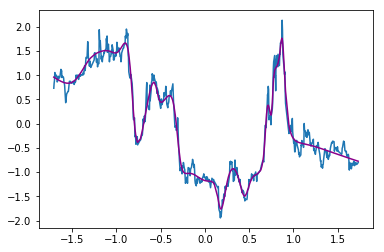

In [146]:
pricePredict5 = mlpr5.predict(dates)
plt.plot(dates, prices)
#plt.plot(dates, pricePredict3[1800:], c='#5aa9ab')
plt.plot(dates, pricePredict5, c='#8B008B')
plt.show()